# 0. Index


1. <a href='#1.-Overview'>Overview</a>
    1. <a href='#Business-Problem'>Business Problem</a>
    2. <a href='#Dataset'>Dataset</a>
    
2. <a href='#2.-Setup'>Setup</a>

3. <a href='#3.-Importing-Data-From-Yahoo-Finance-API'>Importing-Data-From-Yahoo-Finance-API</a>

     1. <a href='#Visulized-the-Performance-of-the-Cryptocurrencies'>Visulized-the-Performance-of-the-Cryptocurrencies</a>
     2. <a href='#THE-PERCENTAGE-CHANGE-PLOT'>THE-PERCENTAGE-CHANGE-PLOT</a>
     3. <a href='#Cointegration-Test'>Cointegration-Test</a>
     4. <a href='#Defining-Cirrelation'>Defining-Cirrelation</a>
    
4. <a href='#Importing-Data-From-Binance-API'>Importing-Data-From-Binance-API</a>
    1. <a href='#Authentication'>Authentication</a>
    2. <a href='#Get-Tickers-From-Binance-API'>Get-Tickers-From-Binance-API</a>
    3. <a href='#Get-Historical-Data'>Get-historical-Data</a>
    4. <a href='#Export-df-to-csv'>Export-df-to-csv</a>
    
5. <a href='#5.-Visualizations'>Visualizations</a>
     1. <a href='#Open-and-Close-Graph'>Open-and-Close-Graph</a>
     2. <a href='#Closing-Price-Plot'>Closing-Price-Plot</a
     3. <a href='#Volume-Plot'>Volume-Plot</a>
     4. <a href='#Moving-AVG'>Moving-AVG</a>

5. <a href='#STATISTICAL-ANALYSIS-&-FORECASTINGS'>STATISTICAL-ANALYSIS-&-FORECASTINGS</a>
    6. <a href='#6.-Forecasting-by-LSTM'>Forecasting-by-LSTM</a 
        1. <a href='#Forecasting-of-Close-Values-by-LSTM'>Forecasting-of-Close-Values-by-LSTM</a>
        2. <a href='#Forecasting-of-Volume-Plot-by-LSTM'>Forecasting-of-Volume-Plot-by-LSTM-</a>
         
        3. <a href='#11.-Decomposition-of-Close-Prices'>Decomposition-of-Close-Prices</a>
        
        4. <a href='#13.-Returns'>Returns</a>
        5. <a href='#16.-Exploratory-Data-Analysis'>Exploratory-Data-Analysis</a>
        6. <a href='#19.-returns/log_returns-Decomposition'>returns/log_returns-Decomposition</a>
        7. <a href='#20.-Returns/Log-Returns-Stationarity-Checking'>Returns/Log-Returns-Stationarity-Checking</a>
        8. <a href='#21.-Train-Validation-Test-Splits'>Train-Validation-Test-Splits</a>
9. <a href='#Modeling'>Modeling</a>
    1. <a href='#22.-Fitting-of-ARIMA-Model'>Fitting-of-ARIMA-Model</a>
        1. <a href='#Data-Preprocessing'>Data-Preprocessing</a>
        2. <a href='#1.-Feature-Normalization'>Feature-Normalization</a>
        3. <a href='#2.-Train-Validation-Test-Visualization'>Train-Validation-Test-Visualization</a>
 
    2. <a href='#Baseline-Models'>Baseline-Models</a>
        1. <a href='#1.-Mean-Baseline'>Mean-Baseline</a>
        2. <a href='#2.-Random-Walk-Naive-Forecasting'>Random-Walk-Naive-Forecasting</a>
        
    3. <a href='#GARCH-Models'>GARCH-Models</a>
        1. <a href='#1.-Basic-GARCH'>Basic-GARCH</a>
            1. <a href='#Analytical-based-Forecasting'>Analytical-based-Forecasting</a>
        2. <a href='#2.-GARCH-Model-with-Asymmetric-Shocks-Responses'>GARCH-Model-with-Asymmetric-Shocks-Responses</a>
        3. <a href='#3.-TARCH'>TARCH</a>
           1. <a href='#Simulation-based-Forecasting-for-TARCH(1,1)'>Simulation-based-Forecasting-for-TARCH(1,1)</a>
           2. <a href='#Bootstrap-based-Forecasting-for-TARCH(1,1)'>Bootstrap-based-Forecasting-for-TARCH(1,1)</a>
           3. <a href='#Hyperparameter-Tuning-for-TARCH'>Hyperparameter-Tuning-for-TARCH</a>
           4. <a href='#Final-GARCH-Model-TARCH(p,q,o)'>Final-GARCH-Model-TARCH(p,q,o)</a>
           
10. <a href='#Neural-Networks'>Neural-Networks</a>
     1. <a href='#Univariate-Long-Short-Term-Memory(LSTM)'>Univariate-Long-Short-Term-Memory(LSTM)</a>
     
11. <a href='#Summary'>Summary</a>
12. <a href='#References'>References</a>




# 1. Overview
0. <a href='#0.-Index'>Back-to-top</a>

Since Bitcoin's first appearance in 2009, it has changed the world's financial landscape substantially. The decentralized cryptocurrency has established itself as an asset class recognized by many asset managers, large investment banks and hedge funds. As the speed of mainstream adoption continues to soar, it is also leading investors to explore new ventures, such as crypto options and futures.

Bitcoin has been historically known to be more volatile than regulated stocks and commodities. Its most recent surge in late December 2020, early January 2021 has brought about a lot of questions and uncertainties about the future financial landscape. At the point of writing this report (end of August 2021), Bitcoin is traded at slightly below USD 50,000, which is no small feat considering it entered 2020 at around USD 7,200.

The purpose of this project is to take a sneak peek into the future by forecasting the next 7 days' average daily Realized Volatility (RV) of BTC-USD using 2 different approaches - the traditional econometric approach to volatility prediction of financial time series GARCH and state-of-the-art LSTM Neural Networks.






# Business Problem
0. <a href='#0.-Index'>Back-to-top</a>

Volatility attempts to measure magnitude of price movements that a financial instrument experiences over a certain period of time. The more dramatic the price swings are in that instrument, the higher the level of volatility, and vice versa.

Volatility is generally accepted as the best measure of market risk and volatility forecasting is used in many different applications across the industry. Realized Volatility Forecasting models are typically utilized in risk management, market making, portfolio optimization, and option trading. Specifically, according to Sinclair (2020), a number of trading strategies evolve around identifying situations where this volatility mismatch occurs:

 
in which Vega is the measurement of an option's price sensitivity to changes in the volatility of the underlying asset, and  is volatility. As Implied Volatility (IV) could be derived from Option Prices using models such as the Black Scholes Model, forecasting Realized Volatility would give us the key to the second part of the equation.

Although the forecasting and modeling of volatility has been the focus of many empirical studies and theoretical investigations in academia, forecasting volatility accurately remains a crucial challenge for scholars. On top of that, since crypto option trading is relatively new, there has not been as much research done on this Bitcoin volatility forecasting. In addition, crytocurrencies carry certain nuances that differ themselves from traditional regulated stocks and commodities, which would also need to be accounted for.

# Dataset
0. <a href='#0.-Index'>Back-to-top</a>

The historical dataset of any cryptocurrency Open/Close/High/Low prices were obtained using the yahoo finance and then Binance API . we can generate this API keys only if we have investment in blockchain or we mine some cryptocurrencies, very easy to set up, but yet still contains a wide range of data and offerings.

I will be downloading ANY CRYPTO's prices using ticker ANY CRYPTO at any interval such as 15-minutes, Hourly, 1-day interval weekly, monthly.
API | Binance Support:    https://www.binance.com/en-IN/support/faq/c-6
Binance API Documentation: https://binancedocs.github.io/apidocs/spot/en/#change-log
For the base currency: Bitcoin We use the data for the duration 1 JAN 2017 to Current day
repeat same for the common Cryptocurrencies
according to NATHAN REIFF in his article "The 10 Most Important Cryptocurrencies Other Than Bitcoin", Updated Jan 8, 2020(source: https://www.investopedia.com/tech/most-important-cryptocurrencies-other-than-bitcoin/) the top three are . Ethereum (ETH), . Ripple (XRP) and . Litecoin (LTC). for the sake of a more robust overview, we will be considering the top ten Cryptocurrencies as at 8 October 2019 noted by Yahoo Finance : Source: https://finance.yahoo.com/news/top-10-cryptocurrencies-market-capitalisation-160046487.html
1. Bitcoin (BTC)
2. Ethereum (ETH)
3. XRP (XRP)
4. Bitcoin Cash (BCH)
5. Tether (USDT)
6. Litecoin (LTC)
7. EOS (EOS)
8. Binance Coin (BNB)
9. Bitcoin SV (BSV) the BSV has no unique ticker in ( and claims to be the original version of what Bitcoin was meant to be ; Source: https://bitcoinsv.com/en/learn)
10. Stellar (XLM)
these Eight (save Bitcoin SV (BSV)) would be examined to get the best pair for our base currency(Bitcoin)

# 2. Setup
0. <a href='#0.-Index'>Back-to-top</a>

In [1]:
#import packages
import pandas as pd
import numpy as np
import glob,os
import matplotlib.dates as mdates
from pandas import Series

import time  
import datetime 
from datetime import date
from time import mktime
from datetime import datetime
from dateutil.parser import parse

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.metrics import mean_squared_error



#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#to set seed
np.random.seed(0) # for reproducibility

from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.tsa.stattools as ts 
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#importing required libraries for Forecasting 
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

from pmdarima.arima import auto_arima


#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#for cointegration test 
from statsmodels.tsa.stattools import coint

import scipy


#read the file
import pandas_datareader as pdr
from datetime import datetime
import statsmodels.regression.linear_model as rg
import arch.unitroot as at

import os
from statsmodels.tsa.stattools import adfuller  

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import backend as K
from decimal import Decimal


from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


import warnings
warnings.simplefilter('ignore')


!pip install python-binance pandas mplfinance 
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager

from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import backend as K
from decimal import Decimal

# 3. Importing-Data-From-Yahoo-Finance-API
0. <a href='#0.-Index'>Back-to-top</a>

In [2]:


assets = ['BTC-USD','ETH-USD','XRP-USD','BCH-USD','USDT-USD','LTC-USD','EOS-USD','BNB-USD','XLM-USD']

BTC = pdr.get_data_yahoo(symbols='BTC-USD', start=datetime(2017, 1, 1))
ETH = pdr.get_data_yahoo(symbols='ETH-USD', start=datetime(2017, 1, 1))
XRP = pdr.get_data_yahoo(symbols='XRP-USD', start=datetime(2017, 1, 1))
BCH = pdr.get_data_yahoo(symbols='BCH-USD', start=datetime(2017, 1, 1))
USDT = pdr.get_data_yahoo(symbols='USDT-USD', start=datetime(2017, 1, 1))
LTC = pdr.get_data_yahoo(symbols='LTC-USD', start=datetime(2017, 1, 1))
EOS = pdr.get_data_yahoo(symbols='EOS-USD', start=datetime(2017, 1, 1))
BNB = pdr.get_data_yahoo(symbols='BNB-USD', start=datetime(2017, 1, 1))
XLM = pdr.get_data_yahoo(symbols='XLM-USD', start=datetime(2017, 1, 1))

data= pd.concat([BTC['Adj Close'],ETH['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,XRP['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,BCH['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,USDT['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,LTC['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,EOS['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,BNB['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,XLM['Adj Close']], ignore_index=True,axis=1)


data.columns = [ 'BTC_ADJ','ETH_ADJ','XRP_ADJ','BCH_ADJ','USDT_ADJ','LTC_ADJ','EOS_ADJ','BNB_ADJ','XLM_ADJ']


data           # Concatenating the adjusted Close for the nine Crypto-currencies


BTC_ADJ      ETH_ADJ   XRP_ADJ     BCH_ADJ  USDT_ADJ  \
Date                                                                    
2016-12-31    963.742981          NaN       NaN         NaN       NaN   
2017-01-01    998.325012          NaN       NaN         NaN       NaN   
2017-01-02   1021.750000          NaN       NaN         NaN       NaN   
2017-01-03   1043.839966          NaN       NaN         NaN       NaN   
2017-01-04   1154.729980          NaN       NaN         NaN       NaN   
...                  ...          ...       ...         ...       ...   
2022-04-19  41502.750000  3104.106445  0.775063  340.395203  1.000343   
2022-04-20  41374.378906  3077.745850  0.752178  330.724213  1.000202   
2022-04-21  40527.363281  2987.480713  0.733178  315.880707  1.000157   
2022-04-22  39740.320312  2964.835693  0.719194  320.967468  1.000234   
2022-04-23  39619.011719  2963.915039  0.711436  318.227600  1.000231   

               LTC_ADJ   EOS_ADJ     BNB_ADJ   XLM_ADJ  
Date                                                    
2016-12-31    4.325290       NaN         NaN       NaN  
2017-01-01    4.511590       NaN         NaN       NaN  
2017-01-02    4.648940       NaN         NaN       NaN  
2017-01-03    4.626200       NaN         NaN       NaN  
2017-01-04    4.837850       NaN         NaN       NaN  
...                ...       ...         ...       ...  
2022-04-19  113.812088  2.647060  422.387054  0.204034  
2022-04-20  111.979691  2.764834  418.354248  0.200422  
2022-04-21  106.997986  2.509423  405.021454  0.196462  
2022-04-22  105.600624  2.460423  406.987518  0.195614  
2022-04-23  106.924423  2.444988  405.215210  0.193695  

[1940 rows x 9 columns]

In [3]:
data.dropna()

BTC_ADJ      ETH_ADJ   XRP_ADJ      BCH_ADJ  USDT_ADJ  \
Date                                                                     
2017-11-09   7143.580078   320.884003  0.217488   654.302979  1.008180   
2017-11-10   6618.140137   299.252991  0.206483  1007.419983  1.006010   
2017-11-11   6357.600098   314.681000  0.210430  1340.449951  1.008990   
2017-11-12   5950.069824   307.907990  0.197339  1388.859985  1.012470   
2017-11-13   6559.490234   316.716003  0.203442  1353.989990  1.009350   
...                  ...          ...       ...          ...       ...   
2022-04-19  41502.750000  3104.106445  0.775063   340.395203  1.000343   
2022-04-20  41374.378906  3077.745850  0.752178   330.724213  1.000202   
2022-04-21  40527.363281  2987.480713  0.733178   315.880707  1.000157   
2022-04-22  39740.320312  2964.835693  0.719194   320.967468  1.000234   
2022-04-23  39619.011719  2963.915039  0.711436   318.227600  1.000231   

               LTC_ADJ   EOS_ADJ     BNB_ADJ   XLM_ADJ  
Date                                                    
2017-11-09   64.269699  1.180800    1.990770  0.039946  
2017-11-10   59.260101  1.030650    1.796840  0.033073  
2017-11-11   62.303299  1.164980    1.670470  0.033053  
2017-11-12   59.005402  1.093970    1.519690  0.028182  
2017-11-13   61.396500  1.178880    1.686620  0.030656  
...                ...       ...         ...       ...  
2022-04-19  113.812088  2.647060  422.387054  0.204034  
2022-04-20  111.979691  2.764834  418.354248  0.200422  
2022-04-21  106.997986  2.509423  405.021454  0.196462  
2022-04-22  105.600624  2.460423  406.987518  0.195614  
2022-04-23  106.924423  2.444988  405.215210  0.193695  

[1627 rows x 9 columns]

# Visulized the Performance of the Cryptocurrencies
0. <a href='#0.-Index'>Back-to-top</a>

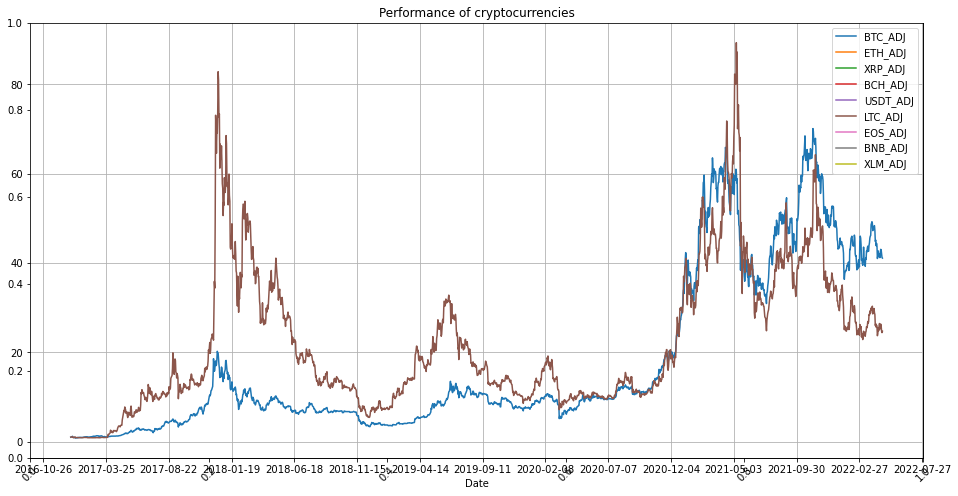

CONCLUSION: we observed that some of the currencies tend to out perform others within the reviewed period. Then we introduce the percentage change to our data so as to scale them


In [4]:
# Normalize prices by first value
norm_prices = data.divide(data.iloc[0])

Norm_assets = ['BTC_ADJ','ETH_ADJ','XRP_ADJ','BCH_ADJ','USDT_ADJ','LTC_ADJ','EOS_ADJ','BNB_ADJ','XLM_ADJ']

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.plot(norm_prices)
plt.title('Performance of cryptocurrencies')
plt.legend(Norm_assets)
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.grid(True)

plt.show()
print('CONCLUSION: we observed that some of the currencies tend to out perform others within the reviewed period. Then we introduce the percentage change to our data so as to scale them')

In [5]:
# Normalizing the datafrme  
data=pd.DataFrame(data)

def normalize_series(data):
    #take tail to drop head NA
    return data.pct_change(1).dropna()
dt=normalize_series(data)

#remove first row with NAs
dt=dt.tail(len(dt)-1)
dt.columns = [ 'BTC_RET','ETH_RET','XRP_RET','BCH_RET','USDT_RET','LTC_RET','EOS_RET','BNB_RET','XLM_RET']
dt['BTC_RET'].head()

Date
2017-11-11   -0.039368
2017-11-12   -0.064101
2017-11-13    0.102422
2017-11-14    0.011626
2017-11-15    0.102444
Freq: D, Name: BTC_RET, dtype: float64

In [6]:
# Normalizing and setting up cumulative returns in a  datafrme 
def normalize_and_accumulate_series(data):
    #take tail to drop head NA
    return data.pct_change(1).cumsum().dropna()
dtc =normalize_and_accumulate_series(data)


#remove first row with NAs
dtc=dtc.tail(len(dtc)-1)
dtc.columns = [ 'BTC_C.RET','ETH_C.RET','XRP_C.RET','BCH_C.RET','USDT_C.RET','LTC_C.RET','EOS_C.RET','BNB_C.RET','XLM_C.RET']
dtc['BTC_C.RET'].head()

Date
2017-11-11    2.208481
2017-11-12    2.144380
2017-11-13    2.246802
2017-11-14    2.258428
2017-11-15    2.360872
Freq: D, Name: BTC_C.RET, dtype: float64

# THE PERCENTAGE CHANGE PLOT
0. <a href='#0.-Index'>Back-to-top</a>

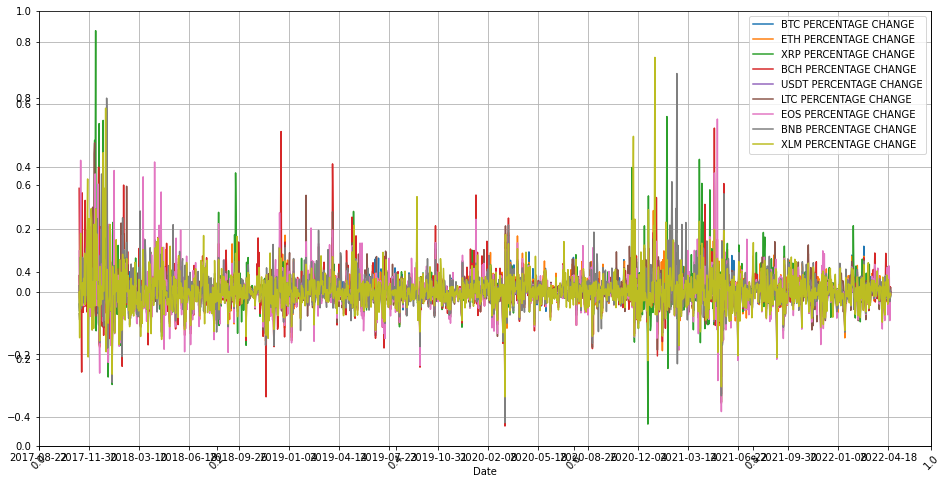

In [7]:
plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.plot(dt['BTC_RET'],label='BTC PERCENTAGE CHANGE')
plt.plot(dt['ETH_RET'],label='ETH PERCENTAGE CHANGE')
plt.plot(dt['XRP_RET'],label='XRP PERCENTAGE CHANGE')
plt.plot(dt['BCH_RET'],label='BCH PERCENTAGE CHANGE')
plt.plot(dt['USDT_RET'],label='USDT PERCENTAGE CHANGE')
plt.plot(dt['LTC_RET'],label='LTC PERCENTAGE CHANGE')
plt.plot(dt['EOS_RET'],label='EOS PERCENTAGE CHANGE')
plt.plot(dt['BNB_RET'],label='BNB PERCENTAGE CHANGE')
plt.plot(dt['XLM_RET'],label='XLM PERCENTAGE CHANGE')
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.grid(True)
plt.legend(loc='best')
plt.show()


# THE CUMMULATIVE RETURNS PLOT
0. <a href='#0.-Index'>Back-to-top</a>

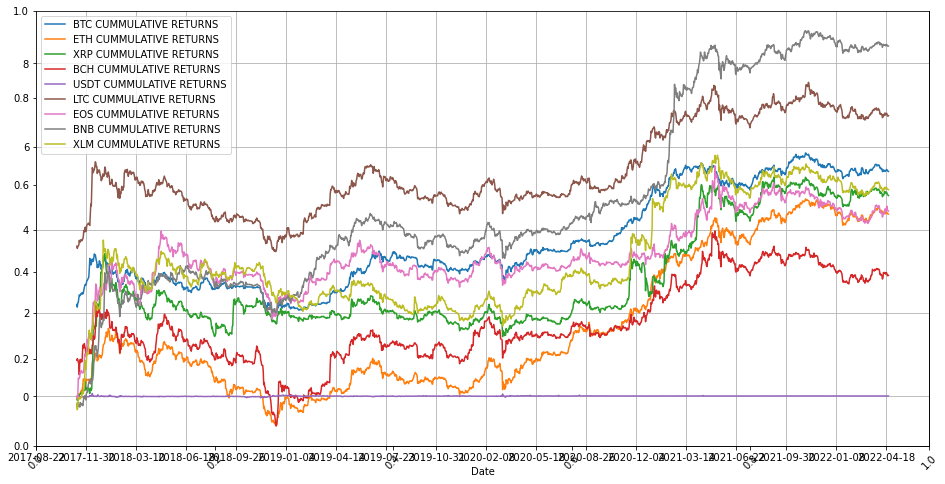

In [8]:
plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.plot(dtc['BTC_C.RET'],label='BTC CUMMULATIVE RETURNS')
plt.plot(dtc['ETH_C.RET'],label='ETH CUMMULATIVE RETURNS')
plt.plot(dtc['XRP_C.RET'],label='XRP CUMMULATIVE RETURNS')
plt.plot(dtc['BCH_C.RET'],label='BCH CUMMULATIVE RETURNS')
plt.plot(dtc['USDT_C.RET'],label='USDT CUMMULATIVE RETURNS')
plt.plot(dtc['LTC_C.RET'],label='LTC CUMMULATIVE RETURNS')
plt.plot(dtc['EOS_C.RET'],label='EOS CUMMULATIVE RETURNS')
plt.plot(dtc['BNB_C.RET'],label='BNB CUMMULATIVE RETURNS')
plt.plot(dtc['XLM_C.RET'],label='XLM CUMMULATIVE RETURNS')
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.grid(True)
plt.legend(loc='best')
plt.show()


Two major criteria that would determine the desired pair are the correlation value and Cointegration. The pair with the highest correlation, is the desired pair. High positive correlation indicates that the returns of both currencies are trending in same direction. Additionally, the cointegration of the same pair should be significantly low. A value lower than 0.05 is desired

First we attempted to get the p-value of all possible pair in our selected (9- Crypto currency Universe)

# Cointegration Test
0. <a href='#0.-Index'>Back-to-top</a>

Cointegration is a statistical method used to test the correlation between two or more non-stationary time series in the long-run or for a specified time period. The method helps in identifying long-run parameters or equilibrium for two or more sets of variables.

In [9]:
# obtaining the P-value for every possible pair within our selected (9- Crypto currency Universe)

for a1 in dt.columns:
    for a2 in dt.columns:
        if a1 != a2:
            test_result = ts.coint(dt[a1], dt[a2])
            print(a1 + ' and ' + a2 + ': p-value = ' + str(test_result[1]))

BTC_RET and ETH_RET: p-value = 3.667721349411855e-10
BTC_RET and XRP_RET: p-value = 3.659376233074767e-19
BTC_RET and BCH_RET: p-value = 8.080939275156347e-21
BTC_RET and USDT_RET: p-value = 0.0
BTC_RET and LTC_RET: p-value = 1.1132089310064223e-20
BTC_RET and EOS_RET: p-value = 1.5497808761168947e-19
BTC_RET and BNB_RET: p-value = 1.2834464800251645e-24
BTC_RET and XLM_RET: p-value = 4.443683508752516e-22
ETH_RET and BTC_RET: p-value = 6.525535727256716e-10
ETH_RET and XRP_RET: p-value = 6.697933758030852e-24
ETH_RET and BCH_RET: p-value = 9.879252549378582e-13
ETH_RET and USDT_RET: p-value = 5.365013424131507e-21
ETH_RET and LTC_RET: p-value = 1.3367147527664205e-19
ETH_RET and EOS_RET: p-value = 6.768844147499258e-27
ETH_RET and BNB_RET: p-value = 2.1723983290206928e-18
ETH_RET and XLM_RET: p-value = 2.452659982256133e-26
XRP_RET and BTC_RET: p-value = 1.1032288501268931e-12
XRP_RET and ETH_RET: p-value = 3.77445942472617e-11
XRP_RET and BCH_RET: p-value = 7.917043612336785e-09
XRP_

From the results obtained we saw some very low Cointegration for our Desired Bitcoin Pair.

BTC_RET and ETH_RET: p-value = 0.0

BTC_RET and XRP_RET: p-value = 2.470976042943848e-29

BTC_RET and BCH_RET: p-value = 1.9958557257613114e-24

BTC_RET and USDT_RET: p-value = 1.8460483551336274e-23

BTC_RET and LTC_RET: p-value = 7.855462705098844e-28

BTC_RET and EOS_RET: p-value = 1.0541411510509593e-22

BTC_RET and BNB_RET: p-value = 0.0

BTC/ETH_RET Pair and the BTC/BNB Pair tend to give the lowest P-Values, however since the desired P-value is anything less than 0.05, all of the pairs would be considered to have passed the Cointegration test. Hence we decided to do the correlation test.

Correlation is the degree to which the pair tend to move together.

# Defining Correlation
0. <a href='#0.-Index'>Back-to-top</a>

In [10]:
# Defining Correlation 

def corr(data1,data2):
    #data1 and data2 should be in np arrays#
    mean1=data1.mean()
    mean2=data2.mean()
    std1= data1.std()
    std2= data2.std()
    corr =((data1*data2).mean()-mean1*mean2)/(std1*std2)
    return corr

In [11]:
# Implimenting Correlation on pair 1 

stock_name_1 ='BTC_RET'
stock_name_2='ETH_RET'
score,pvalue,_=coint(dt[stock_name_1],dt[stock_name_2])
correlation = corr(dt[stock_name_1],dt[stock_name_2])
print('correlation between %s and %s is %f'%(stock_name_1, stock_name_2,correlation))
print('Cointegration between %s and %s is %f'%(stock_name_1,stock_name_2,pvalue))

correlation between BTC_RET and ETH_RET is 0.757302
Cointegration between BTC_RET and ETH_RET is 0.000000


In [12]:
# Implimenting Correlation on pair 2 

stock_name_1 ='BTC_RET'
stock_name_2='XRP_RET'
score,pvalue,_=coint(dt[stock_name_1],dt[stock_name_2])
correlation = corr(dt[stock_name_1],dt[stock_name_2])
print('correlation between %s and %s is %f'%(stock_name_1, stock_name_2,correlation))
print('Cointegration between %s and %s is %f'%(stock_name_1,stock_name_2,pvalue))

correlation between BTC_RET and XRP_RET is 0.495078
Cointegration between BTC_RET and XRP_RET is 0.000000


In [13]:
# Implimenting Correlation on pair 3 

stock_name_1 ='BTC_RET'
stock_name_2='BCH_RET'
score,pvalue,_=coint(dt[stock_name_1],dt[stock_name_2])
correlation = corr(dt[stock_name_1],dt[stock_name_2])
print('correlation between %s and %s is %f'%(stock_name_1, stock_name_2,correlation))
print('Cointegration between %s and %s is %f'%(stock_name_1,stock_name_2,pvalue))

correlation between BTC_RET and BCH_RET is 0.652882
Cointegration between BTC_RET and BCH_RET is 0.000000


In [14]:
# Implimenting Correlation on pair 4 

stock_name_1 ='BTC_RET'
stock_name_2='USDT_RET'
score,pvalue,_=coint(dt[stock_name_1],dt[stock_name_2])
correlation = corr(dt[stock_name_1],dt[stock_name_2])
print('correlation between %s and %s is %f'%(stock_name_1, stock_name_2,correlation))
print('Cointegration between %s and %s is %f'%(stock_name_1,stock_name_2,pvalue))

correlation between BTC_RET and USDT_RET is 0.023046
Cointegration between BTC_RET and USDT_RET is 0.000000


In [15]:
# Implimenting Correlation on pair 5 

stock_name_1 ='BTC_RET'
stock_name_2='LTC_RET'
score,pvalue,_=coint(dt[stock_name_1],dt[stock_name_2])
correlation = corr(dt[stock_name_1],dt[stock_name_2])
print('correlation between %s and %s is %f'%(stock_name_1, stock_name_2,correlation))
print('Cointegration between %s and %s is %f'%(stock_name_1,stock_name_2,pvalue))

correlation between BTC_RET and LTC_RET is 0.730864
Cointegration between BTC_RET and LTC_RET is 0.000000


In [16]:
# Implimenting Correlation on pair 6 

stock_name_1 ='BTC_RET'
stock_name_2='EOS_RET'
score,pvalue,_=coint(dt[stock_name_1],dt[stock_name_2])
correlation = corr(dt[stock_name_1],dt[stock_name_2])
print('correlation between %s and %s is %f'%(stock_name_1, stock_name_2,correlation))
print('Cointegration between %s and %s is %f'%(stock_name_1,stock_name_2,pvalue))

correlation between BTC_RET and EOS_RET is 0.628643
Cointegration between BTC_RET and EOS_RET is 0.000000


In [17]:
# Implimenting Correlation on pair 7 

stock_name_1 ='BTC_RET'
stock_name_2='BNB_RET'
score,pvalue,_=coint(dt[stock_name_1],dt[stock_name_2])
correlation = corr(dt[stock_name_1],dt[stock_name_2])
print('correlation between %s and %s is %f'%(stock_name_1, stock_name_2,correlation))
print('Cointegration between %s and %s is %f'%(stock_name_1,stock_name_2,pvalue))

correlation between BTC_RET and BNB_RET is 0.615595
Cointegration between BTC_RET and BNB_RET is 0.000000


In [18]:
# Implimenting Correlation on pair 8 

stock_name_1 ='BTC_RET'
stock_name_2='XLM_RET'
score,pvalue,_=coint(dt[stock_name_1],dt[stock_name_2])
correlation = corr(dt[stock_name_1],dt[stock_name_2])
print('correlation between %s and %s is %f'%(stock_name_1, stock_name_2,correlation))
print('Cointegration between %s and %s is %f'%(stock_name_1,stock_name_2,pvalue))

correlation between BTC_RET and XLM_RET is 0.581410
Cointegration between BTC_RET and XLM_RET is 0.000000


In [19]:
# Defining Correlation Matrix 
corrMatrix = dt.corr()
dt.corr()

BTC_RET   ETH_RET   XRP_RET   BCH_RET  USDT_RET   LTC_RET  \
BTC_RET   1.000000  0.757768  0.495383  0.653284  0.023061  0.731314   
ETH_RET   0.757768  1.000000  0.597739  0.729545 -0.011505  0.805325   
XRP_RET   0.495383  0.597739  1.000000  0.541928 -0.030583  0.576056   
BCH_RET   0.653284  0.729545  0.541928  1.000000 -0.021901  0.712486   
USDT_RET  0.023061 -0.011505 -0.030583 -0.021901  1.000000  0.042144   
LTC_RET   0.731314  0.805325  0.576056  0.712486  0.042144  1.000000   
EOS_RET   0.629030  0.712401  0.592254  0.709388 -0.072156  0.702652   
BNB_RET   0.615974  0.604192  0.432933  0.496177 -0.033062  0.581929   
XLM_RET   0.581768  0.627387  0.664126  0.549727 -0.009187  0.593467   

           EOS_RET   BNB_RET   XLM_RET  
BTC_RET   0.629030  0.615974  0.581768  
ETH_RET   0.712401  0.604192  0.627387  
XRP_RET   0.592254  0.432933  0.664126  
BCH_RET   0.709388  0.496177  0.549727  
USDT_RET -0.072156 -0.033062 -0.009187  
LTC_RET   0.702652  0.581929  0.593467  
EOS_RET   1.000000  0.537313  0.622636  
BNB_RET   0.537313  1.000000  0.476306  
XLM_RET   0.622636  0.476306  1.000000

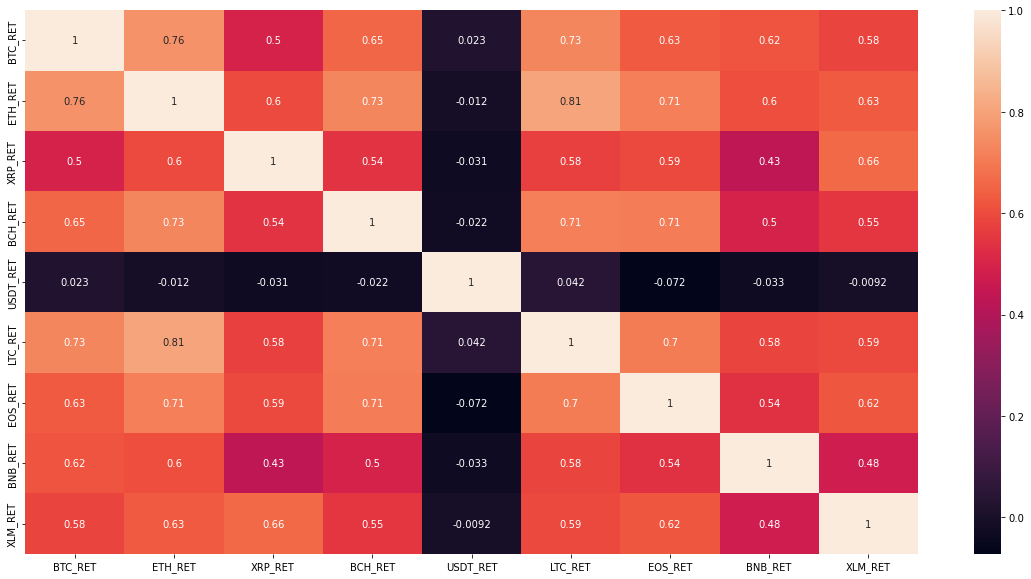

From the analysis and the values gotten we can see that although pairs all seen to have very low Cointegration value, but we observed that the Ethereum (ETH) had the best correlation value (81.2%). Thus we will be proceeding with the Bitcoin/Ethereum pair for the next two phases; Price forecasting and developing trade strategy


In [20]:
# Correlation Matrix Heat map

sns.heatmap(corrMatrix, annot=True)
plt.show()

print('From the analysis and the values gotten we can see that although pairs all seen to have very low Cointegration value, but we observed that the Ethereum (ETH) had the best correlation value (81.2%). Thus we will be proceeding with the Bitcoin/Ethereum pair for the next two phases; Price forecasting and developing trade strategy')


# Importing Data From Binance API
0. <a href='#0.-Index'>Back-to-top</a>

In [21]:
apikey='rvSB1qiZjmv110mMh1HVYewHYuJWhiO9X3U0SPXr69H0swYjSGK0MhOhAdDx5B95'
sect='Gqm2pZAWxYcoyPalCTEIzZEu6GzE8V3N678MSPSZBz70FBorfSmBvf5s1EnOhzxR'

In [22]:
!pip install python-binance pandas mplfinance 

In [23]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager 



# Authentication of Binance API Key
0. <a href='#0.-Index'>Back-to-top</a>


In [24]:
client = Client(apikey,sect)
client

# Get Tickers From Binance API
0. <a href='#0.-Index'>Back-to-top</a>

Tickers are a financial instrument used to track the price value of given asset or basket of assets 

In [25]:
tickers = client.get_all_tickers()      
                        

In [26]:
tdf=pd.DataFrame(tickers)


In [27]:
tdf.symbol.unique()

array(['ETHBTC', 'LTCBTC', 'BNBBTC', ..., 'PORTOBUSD', 'STEEMUSDT',
       'ZILEUR'], dtype=object)

In [28]:
tdf.describe()

symbol       price
count     2016        2016
unique    2016        1899
top     ETHBTC  1.00000000
freq         1           6

In [29]:
tdf.sort_values(by='price',ascending=False)      

symbol           price
1145    LTCEUR     99.20000000
454    BTCUSDS   9604.59000000
1451    ETHUAH  95027.00000000
1814  ALICETRY     94.40000000
1453    SOLEUR     94.22000000
...        ...             ...
367    DENTBTC      0.00000004
586   COCOSBTC      0.00000003
356    NPXSBTC      0.00000003
373     HOTBTC      0.00000002
576     WINBTC      0.00000001

[2016 rows x 2 columns]

In [30]:
tdf.sort_values(by='price')

symbol           price
576     WINBTC      0.00000001
373     HOTBTC      0.00000002
356    NPXSBTC      0.00000003
586   COCOSBTC      0.00000003
367    DENTBTC      0.00000004
...        ...             ...
1453    SOLEUR     94.22000000
1814  ALICETRY     94.40000000
1451    ETHUAH  95027.00000000
454    BTCUSDS   9604.59000000
1145    LTCEUR     99.20000000

[2016 rows x 2 columns]

# Get Historical Data
0. <a href='#0.-Index'>Back-to-top</a>


In [31]:
client.get_historical_klines??
tckr='BNB-BTC'
hdt=client.get_historical_klines('ETHBTC',Client.KLINE_INTERVAL_1DAY,'1 Jan 2011')
df_hdt=pd.DataFrame(hdt)
df_hdt.columns=['Open Time','Open','High','Low','Close','Volume','Close Time','Quote Asset Volume','No. of Treades','TB Based Volume','TB Quote Volume','Ignore']
df_hdt['Open Time']=pd.to_datetime(df_hdt['Open Time']/1000,unit='s')
df_hdt['Close Time']=pd.to_datetime(df_hdt['Close Time']/1000,unit='s')
df_hdt.set_index('Open Time',inplace=True)





In [32]:
client.get_historical_klines??


Signature:
client.get_historical_klines(
    symbol,
    interval,
    start_str,
    end_str=None,
    limit=500,
    klines_type: binance.enums.HistoricalKlinesType = <HistoricalKlinesType.SPOT: 1>,
)
Source:   
    def get_historical_klines(self, symbol, interval, start_str, end_str=None, limit=500,
                              klines_type: HistoricalKlinesType = HistoricalKlinesType.SPOT):
        """Get Historical Klines from Binance

        :param symbol: Name of symbol pair e.g BNBBTC
        :type symbol: str
        :param interval: Binance Kline interval
        :type interval: str
        :param start_str: Start date string in UTC format or timestamp in milliseconds
        :type start_str: str|int
        :param end_str: optional - end date string in UTC format or timestamp in milliseconds (default will fetch everything up to now)
        :type end_str: str|int
        :param limit: Default 500; max 1000.
        :type limit: int
        :param klines_type: Historical klines type: SPOT or FUTURES
        :type klines_type: HistoricalKlinesType

        :return: list of OHLCV values

        """
        return self._historical_klines(symbol, interval, start_str, end_str=end_str, limit=limit, klines_type=klines_type)
File:      c:\users\admin\anaconda3\anaconda\lib\site-packages\binance\client.py
Type:      method

In [33]:
tckr='BNB-BTC'

In [34]:

hdt=client.get_historical_klines('ETHBTC',Client.KLINE_INTERVAL_1DAY,'1 Jan 2011')


In [35]:
df_hdt=pd.DataFrame(hdt)
df_hdt

0           1           2           3           4   \
0     1499990400000  0.08000000  0.09103300  0.08000000  0.09099300   
1     1500076800000  0.09099300  0.09369900  0.08712700  0.08763500   
2     1500163200000  0.08750800  0.08763500  0.07559100  0.08224100   
3     1500249600000  0.08236800  0.08839400  0.08169900  0.08753700   
4     1500336000000  0.08783100  0.10906800  0.08477700  0.10773200   
...             ...         ...         ...         ...         ...   
1740  1650326400000  0.07489100  0.07531600  0.07449100  0.07475900   
1741  1650412800000  0.07476000  0.07506500  0.07413600  0.07438600   
1742  1650499200000  0.07438500  0.07444100  0.07331000  0.07370600   
1743  1650585600000  0.07370700  0.07519400  0.07366200  0.07460000   
1744  1650672000000  0.07460100  0.07492100  0.07417900  0.07478500   

                  5              6              7       8               9   \
0      1942.05700000  1500076799999   170.23852396    1994   1076.40500000   
1      4013.06600000  1500163199999   363.03178785    4623   2250.31800000   
2      8904.15800000  1500249599999   722.21248196    8137   5557.57500000   
3      6650.93300000  1500335999999   568.24653804    7639   3859.48500000   
4      7245.74100000  1500422399999   674.49785037    8121   4202.05500000   
...              ...            ...            ...     ...             ...   
1740  67687.08120000  1650412799999  5067.54771195  106954  33707.11480000   
1741  70877.03640000  1650499199999  5287.53367482  127312  34312.30210000   
1742  91867.89270000  1650585599999  6792.24811997  142273  46514.04020000   
1743  74168.89200000  1650671999999  5521.63024669  136935  39379.67800000   
1744  16050.73070000  1650758399999  1197.97742615   36107   8200.42630000   

                 10              11  
0       94.82527222  22262.26697743  
1      203.54149755  22275.36801826  
2      450.34388688  22295.47295841  
3      329.66875309  22165.74281157  
4      393.11140275  22505.62469176  
...             ...             ...  
1740  2523.53588829               0  
1741  2560.08754253               0  
1742  3439.27699022               0  
1743  2931.56011044               0  
1744   612.14031387               0  

[1745 rows x 12 columns]

In [36]:
df_hdt.columns=['Open Time','Open','High','Low','Close','Volume','Close Time','Quote Asset Volume','No. of Treades','TB Based Volume','TB Quote Volume','Ignore']
df_hdt.columns

Index(['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time',
       'Quote Asset Volume', 'No. of Treades', 'TB Based Volume',
       'TB Quote Volume', 'Ignore'],
      dtype='object')

In [37]:
df_hdt.shape

(1745, 12)

In [38]:
df_hdt.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
No. of Treades         int64
TB Based Volume       object
TB Quote Volume       object
Ignore                object
dtype: object

In [39]:
df_hdt['Open Time']=pd.to_datetime(df_hdt['Open Time']/1000,unit='s')
df_hdt['Close Time']=pd.to_datetime(df_hdt['Close Time']/1000,unit='s')

In [40]:
df_hdt.shape

(1745, 12)

In [41]:
df_hdt.head()

Open Time        Open        High         Low       Close         Volume  \
0 2017-07-14  0.08000000  0.09103300  0.08000000  0.09099300  1942.05700000   
1 2017-07-15  0.09099300  0.09369900  0.08712700  0.08763500  4013.06600000   
2 2017-07-16  0.08750800  0.08763500  0.07559100  0.08224100  8904.15800000   
3 2017-07-17  0.08236800  0.08839400  0.08169900  0.08753700  6650.93300000   
4 2017-07-18  0.08783100  0.10906800  0.08477700  0.10773200  7245.74100000   

                     Close Time Quote Asset Volume  No. of Treades  \
0 2017-07-14 23:59:59.999000064       170.23852396            1994   
1 2017-07-15 23:59:59.999000064       363.03178785            4623   
2 2017-07-16 23:59:59.999000064       722.21248196            8137   
3 2017-07-17 23:59:59.999000064       568.24653804            7639   
4 2017-07-18 23:59:59.999000064       674.49785037            8121   

  TB Based Volume TB Quote Volume          Ignore  
0   1076.40500000     94.82527222  22262.26697743  
1   2250.31800000    203.54149755  22275.36801826  
2   5557.57500000    450.34388688  22295.47295841  
3   3859.48500000    329.66875309  22165.74281157  
4   4202.05500000    393.11140275  22505.62469176

In [42]:
df_hdt.set_index('Open Time',inplace=True)
df_hdt

Open        High         Low       Close          Volume  \
Open Time                                                                    
2017-07-14  0.08000000  0.09103300  0.08000000  0.09099300   1942.05700000   
2017-07-15  0.09099300  0.09369900  0.08712700  0.08763500   4013.06600000   
2017-07-16  0.08750800  0.08763500  0.07559100  0.08224100   8904.15800000   
2017-07-17  0.08236800  0.08839400  0.08169900  0.08753700   6650.93300000   
2017-07-18  0.08783100  0.10906800  0.08477700  0.10773200   7245.74100000   
...                ...         ...         ...         ...             ...   
2022-04-19  0.07489100  0.07531600  0.07449100  0.07475900  67687.08120000   
2022-04-20  0.07476000  0.07506500  0.07413600  0.07438600  70877.03640000   
2022-04-21  0.07438500  0.07444100  0.07331000  0.07370600  91867.89270000   
2022-04-22  0.07370700  0.07519400  0.07366200  0.07460000  74168.89200000   
2022-04-23  0.07460100  0.07492100  0.07417900  0.07478500  16050.73070000   

                              Close Time Quote Asset Volume  No. of Treades  \
Open Time                                                                     
2017-07-14 2017-07-14 23:59:59.999000064       170.23852396            1994   
2017-07-15 2017-07-15 23:59:59.999000064       363.03178785            4623   
2017-07-16 2017-07-16 23:59:59.999000064       722.21248196            8137   
2017-07-17 2017-07-17 23:59:59.999000064       568.24653804            7639   
2017-07-18 2017-07-18 23:59:59.999000064       674.49785037            8121   
...                                  ...                ...             ...   
2022-04-19 2022-04-19 23:59:59.999000064      5067.54771195          106954   
2022-04-20 2022-04-20 23:59:59.999000064      5287.53367482          127312   
2022-04-21 2022-04-21 23:59:59.999000064      6792.24811997          142273   
2022-04-22 2022-04-22 23:59:59.999000064      5521.63024669          136935   
2022-04-23 2022-04-23 23:59:59.999000064      1197.97742615           36107   

           TB Based Volume TB Quote Volume          Ignore  
Open Time                                                   
2017-07-14   1076.40500000     94.82527222  22262.26697743  
2017-07-15   2250.31800000    203.54149755  22275.36801826  
2017-07-16   5557.57500000    450.34388688  22295.47295841  
2017-07-17   3859.48500000    329.66875309  22165.74281157  
2017-07-18   4202.05500000    393.11140275  22505.62469176  
...                    ...             ...             ...  
2022-04-19  33707.11480000   2523.53588829               0  
2022-04-20  34312.30210000   2560.08754253               0  
2022-04-21  46514.04020000   3439.27699022               0  
2022-04-22  39379.67800000   2931.56011044               0  
2022-04-23   8200.42630000    612.14031387               0  

[1745 rows x 11 columns]

In [43]:
df_hdt.dtypes

Open                          object
High                          object
Low                           object
Close                         object
Volume                        object
Close Time            datetime64[ns]
Quote Asset Volume            object
No. of Treades                 int64
TB Based Volume               object
TB Quote Volume               object
Ignore                        object
dtype: object

In [44]:
df_hdt=df_hdt.apply(pd.to_numeric,errors='coerce').fillna(0)

In [45]:
df_hdt.dtypes

Open                  float64
High                  float64
Low                   float64
Close                 float64
Volume                float64
Close Time              int64
Quote Asset Volume    float64
No. of Treades          int64
TB Based Volume       float64
TB Quote Volume       float64
Ignore                float64
dtype: object

# Export df to csv


In [46]:
df_hdt.to_csv(r'C:\Users\Admin\OneDrive\Desktop\cryptocsv.csv')

# 5. Visualizations

# Open and Close Graph
0. <a href='#0.-Index'>Back-to-top</a>

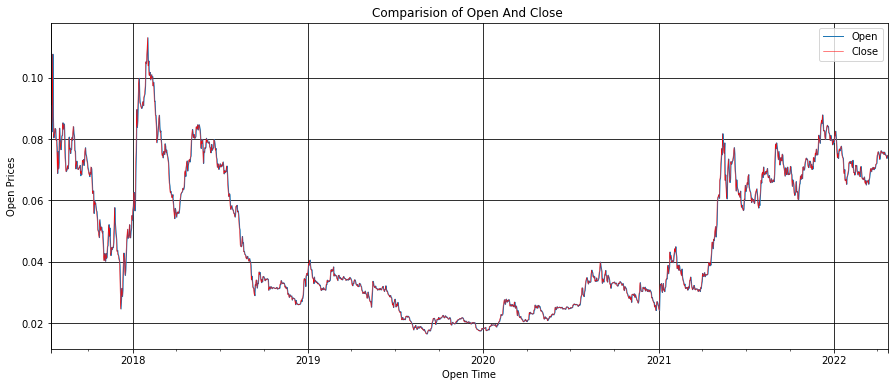

In [47]:
df_hdt['Open'].plot(figsize=(15,6),linewidth=1)
df_hdt['Close'].plot(color=('r'),linewidth=0.5)
plt.title('Comparision of Open And Close ')
plt.ylabel('Open Prices')
plt.xlabel('Open Time')
plt.legend()
plt.grid(True,color='k')
plt.show()
## plt not showing different color

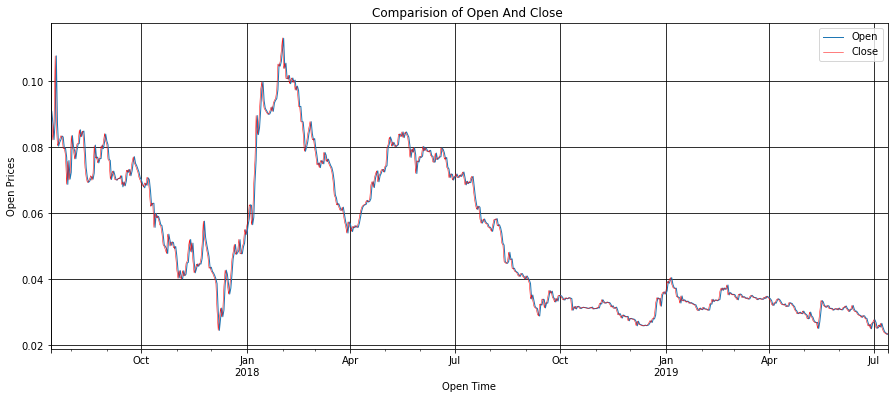

In [48]:
df_hdt['Open'].iloc[0:730].plot(figsize=(15,6),linewidth=1)
df_hdt['Close'].iloc[0:730].plot(color=('r'),linewidth=0.5)
plt.title('Comparision of Open And Close ')
plt.ylabel('Open Prices')
plt.xlabel('Open Time')
plt.legend()
plt.grid(True,color='k')
plt.show()
## plt not showing different color

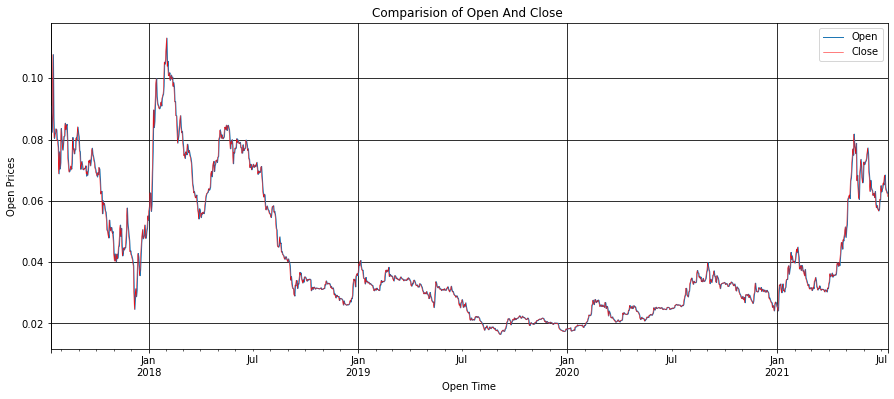

In [49]:
df_hdt['Open'].iloc[0:1460].plot(figsize=(15,6),linewidth=1)
df_hdt['Close'].iloc[0:1460].plot(color=('r'),linewidth=0.5)
plt.title('Comparision of Open And Close ')
plt.ylabel('Open Prices')
plt.xlabel('Open Time')
plt.legend()
plt.grid(True,color='k')
plt.show()
## plt not showing different color

# Closing Price Plot
0. <a href='#0.-Index'>Back-to-top</a>

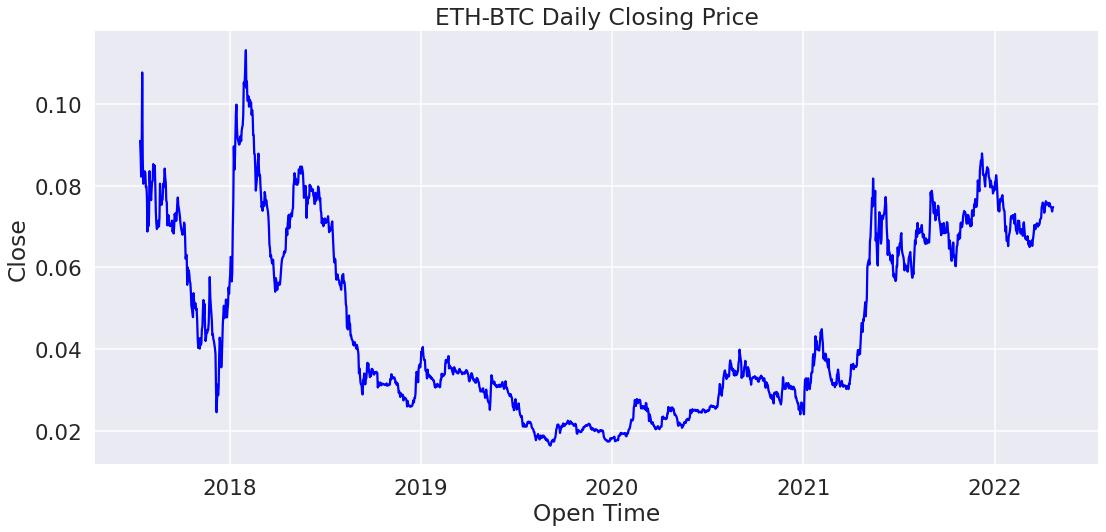

Conclusion : From graph we can conclude that there is no Trend & Seasonality 


In [50]:
# CHANGE CONTEXT TO poster TO INCREASE FONT SIZES
sns.set_context("talk", font_scale=1.3)

# PLOT OUT BNBBTC'S CLOSING PRICES SINCE 2014
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(18,8))
    sns.lineplot(x=df_hdt.index, y=df_hdt.Close, color='blue')
    ax.set_title('ETH-BTC Daily Closing Price')    
plt.show()

print('Conclusion : From graph we can conclude that there is no Trend & Seasonality ')

# Volume Plot
0. <a href='#0.-Index'>Back-to-top</a>

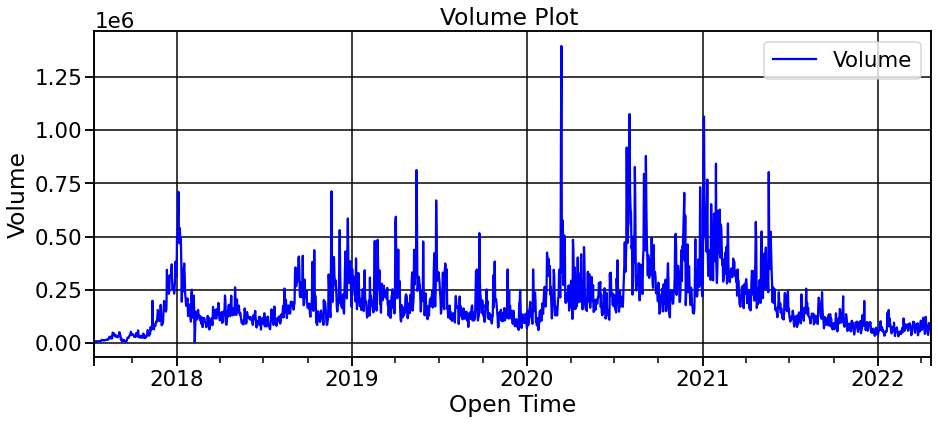

 Conclusion:In March 2020 there was highest no of traders treading in ETH-BTC and after that there was significant decay in no. of treaders 


In [51]:
df_hdt['Volume'].plot(color=('b'),figsize=(15,6))        
#df_hdt['Volume'].iloc[1000:2000].plot(color=('b'),figsize=(15,6))  
# iloc[1000:2000] lock obs to plot graph

plt.title('Volume Plot ')
plt.ylabel('Volume')
plt.xlabel('Open Time')
plt.legend()
plt.grid(True,color='k')
plt.show()

print(' Conclusion:In March 2020 there was highest no of traders treading in ETH-BTC and after that there was significant decay in no. of treaders ')

# Moving AVG
0. <a href='#0.-Index'>Back-to-top</a>

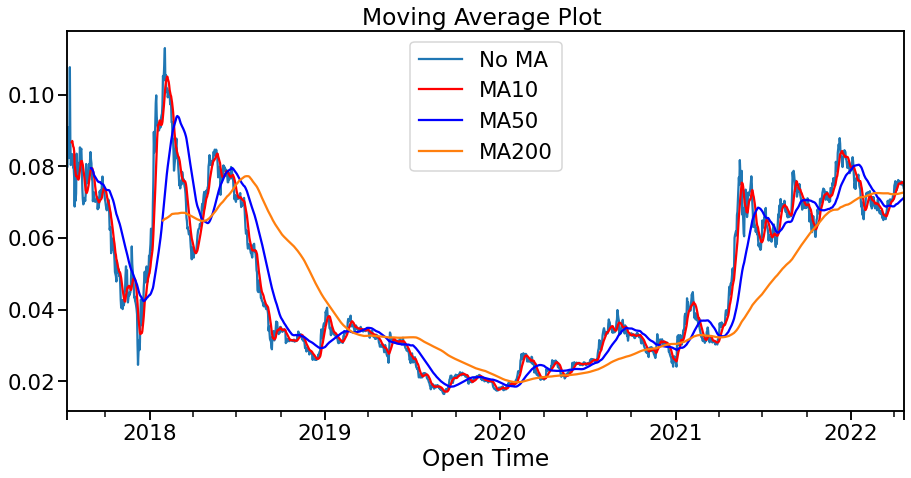

when MA is too largr it not capable to capturing some spike and dips and when MA is small its again there is again noisy observation problem so there is compromise and we need to looking for some other methods like 
 AR, 
 ARMA, 
 ARIMA, 
 ACF, 
 EWMA


In [52]:
df_hdt['Open'].plot(label='No MA',figsize=(15,7))
plt.title('Moving Average Plot ')

# 10 days Moving Averages
MA50=df_hdt['Open'].rolling(10).mean()     # creat column of 10 day MA
MA50.plot(label='MA10',color='r')

# 50 days Moving Averages
MA50=df_hdt['Open'].rolling(50).mean()     # creat column of 50 day MA
MA50.plot(label='MA50',color='b')

# 200 days Moving Averages
MA200=df_hdt['Open'].rolling(200).mean()    # creat column of 200 day MA
MA200.plot(label='MA200')

plt.legend()
plt.show()
print('when MA is too largr it not capable to capturing some spike and dips and when MA is small its again there is again noisy observation problem so there is compromise and we need to looking for some other methods like \n AR, \n ARMA, \n ARIMA, \n ACF, \n EWMA')

# Statistical Analysis

# 6. Forecasting By LSTM
0. <a href='#0.-Index'>Back-to-top</a>

### Univariate Long Short - Term Memory (LSTM)


There's a class of Neural Networks called Recurrent Neural Networks (RNN) that can "predict the future". RNN works well with time series data, such as stock prices, and can even process sentences, documents, audio samples as inputs. Another application of RNN is in autonomic driving systems, where they're used to anticipate vehicle trajectories and help avoid accidents.


Recurrent Neural Network Unfold

At each time step t, the recurrent neuron receives input 
 as well as its own output from the previous time step 
. Since the output of a Recurrent Neuron is a function of all the inputs from the previous time steps, it has a form of memory and able to preserve some information through time.

However, due to some transformations that the data goes through when traversing down RNN, some information is lost at each time step, and for a long sequence, the RNN's state contains virtually no information from the first inputs.

__Long Short-Term Memory (LSTM)__ was proposed in 1997 by Sepp Hochreiter and Jurgen Schmidhuber. The key part of LSTM is that the network can learn what's important and needs to be stored in the long-term state, and what can be ignored. LSTM looks very similar to a regular RNN cell, but its state is split into 2 vectors:

 ht- for short term state
 ct- for long term state
 
LSTM is a black box, and can be used like a basic Recurrent Neural Network (RNN) cell. However, it tends to perform much better, helps training converge faster, and also detect long-term dependencies in the data.

LSTM uses an optimized implementation when running on a GPU, that's why it's highly recommended to run this second part of the notebook on Google Colab.

First, I'm going to use the same lookback window n_past as the previous Neural Networks (30), and then depending on the result, I'll try to fine tune that value later.

The first LSTM model would be very simple with only 1 hidden LSTM layer of 20 units. I am using the standard adam optimizer here, and would later experiment with other optimizers if needed.


# Forecasting of Close Values by LSTM 

0. <a href='#0.-Index'>Back-to-top</a>

In [53]:
close_data = df_hdt['Close'].values
close_data = close_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(close_data))

close_train = close_data[:split]
close_test = close_data[split:]

date_train = df_hdt.index[:split]
date_test = df_hdt.index[split:]

print(len(close_train))
print(len(close_test))

1396
349


In [54]:
look_back = 30

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

In [55]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 25
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/25
69/69 [==============================] - 2s 8ms/step - loss: 8.7865e-04
Epoch 2/25
69/69 [==============================] - 1s 8ms/step - loss: 3.6806e-04
Epoch 3/25
69/69 [==============================] - 1s 8ms/step - loss: 3.3055e-04
Epoch 4/25
69/69 [==============================] - 1s 9ms/step - loss: 3.0969e-04
Epoch 5/25
69/69 [==============================] - 1s 8ms/step - loss: 2.6045e-04
Epoch 6/25
69/69 [==============================] - 1s 8ms/step - loss: 1.6717e-04
Epoch 7/25
69/69 [==============================] - 1s 8ms/step - loss: 5.7293e-05
Epoch 8/25
69/69 [==============================] - 1s 8ms/step - loss: 7.3773e-05
Epoch 9/25
69/69 [==============================] - 1s 12ms/step - loss: 4.8966e-05
Epoch 10/25
69/69 [==============================] - 1s 13ms/step - loss: 4.5637e-05
Epoch 11/25
69/69 [==============================] - 1s 12ms/step - loss: 3.6659e-05
Epoch 12/25
69/69 [==============================] - 1s 9ms/step - loss: 5.2061e-0

In [56]:
import plotly.graph_objects as go

In [57]:
prediction = model.predict_generator(test_generator)

close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = "Validation of, predictions of ETH-BTC's Close price By LSTM",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

print('Our Model is good fit')

Our Model is good fit


In [58]:
close_data = close_data.reshape((-1))

def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = df_hdt.index.values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 30
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)

In [59]:
trace_1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
)
trace_2 = go.Scatter(
    x = forecast_dates,
    y = forecast ,
    mode = 'lines',
    name = 'Prediction'
)
trace_3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = "Closing price plot Forecast for next 30 days by LSTM",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace_1,trace_3, trace_2], layout=layout)
fig.show()

print('Conclusion: Graph shows forecasted close price index for next 60 days ')

Conclusion: Graph shows forecasted close price index for next 60 days 


# Volume Forecasts by LSTM



In [60]:
volm_data = df_hdt['Volume'].values
volm_data = volm_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(volm_data))

volm_train = volm_data[:split]
volm_test = volm_data[split:]

date_train = df_hdt.index[:split]
date_test = df_hdt.index[split:]

print(len(volm_train))
print(len(volm_test))



1396
349


In [61]:
look_back = 30

train_generator = TimeseriesGenerator(volm_train, volm_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(volm_test, volm_test, length=look_back, batch_size=14)

In [62]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(20,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 25
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/25
69/69 [==============================] - 2s 9ms/step - loss: 83830513664.0000
Epoch 2/25
69/69 [==============================] - 1s 10ms/step - loss: 59971571712.0000
Epoch 3/25
69/69 [==============================] - 1s 10ms/step - loss: 67087605760.0000
Epoch 4/25
69/69 [==============================] - 1s 12ms/step - loss: 43311800320.0000
Epoch 5/25
69/69 [==============================] - 1s 11ms/step - loss: 54191149056.0000
Epoch 6/25
69/69 [==============================] - 1s 12ms/step - loss: 57446285312.0000
Epoch 7/25
69/69 [==============================] - 1s 11ms/step - loss: 30729512960.0000
Epoch 8/25
69/69 [==============================] - 1s 11ms/step - loss: 28395585536.0000
Epoch 9/25
69/69 [==============================] - 1s 12ms/step - loss: 20337186816.0000
Epoch 10/25
69/69 [==============================] - 1s 11ms/step - loss: 18250956800.0000
Epoch 11/25
69/69 [==============================] - 1s 11ms/step - loss: 23023503360.0000
Epoch 12/

In [63]:
prediction = model.predict_generator(test_generator)

volm_train = volm_train.reshape((-1))
volm_test = volm_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = volm_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = volm_test,
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = "Validation of scalled test data of ETH-BTC's volume by LSTM",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Volume"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

In [64]:
volm_data = volm_data.reshape((-1))

def predict(num_prediction, model):
    prediction_list = volm_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = df_hdt.index.values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 30
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)

In [65]:
trace_1 = go.Scatter(
    x = date_train,
    y = volm_train,
    mode = 'lines',
    name = 'Data'
)
trace_2 = go.Scatter(
    x = forecast_dates,
    y = forecast ,
    mode = 'lines',
    name = 'Prediction'
)
trace_3 = go.Scatter(
    x = date_test,
    y = volm_test,
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = "Forecast of volume of ETH-BTC for next 30 Days",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "volume forecast"}
)
fig = go.Figure(data=[trace_1,trace_3, trace_2], layout=layout)
fig.show()


In [66]:
# 

# 11. Decomposition of Close Prices
0. <a href='#0.-Index'>Back-to-top</a>

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [68]:
dec=seasonal_decompose(df_hdt.Close,model='additive',period=1)

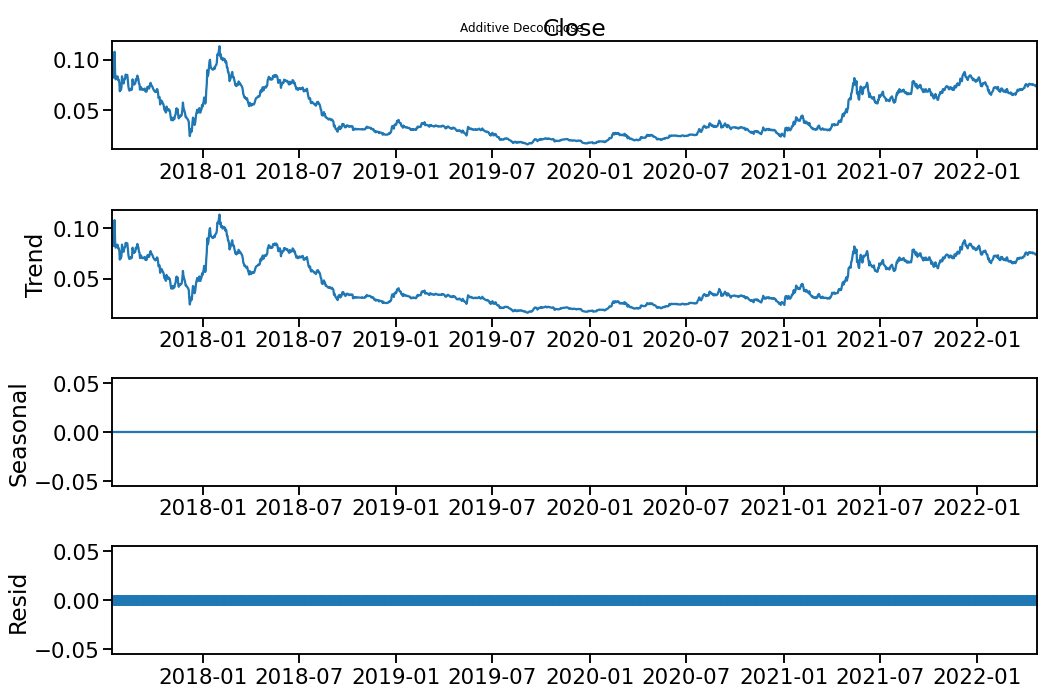

Conclusion : There is no Trend present 
 There is no Seasonality present 


In [69]:
plt.rcParams.update({'figure.figsize':(15,10)})
dec.plot().suptitle('\nAdditive Decompose',fontsize=12)
plt.show()
print('Conclusion : There is no Trend present \n There is no Seasonality present ')

In [70]:
adddec=seasonal_decompose(df_hdt.Close,model='multiplicative',period=1)

Text(0.5, 0.98, '\nMultiplicative Decompose')

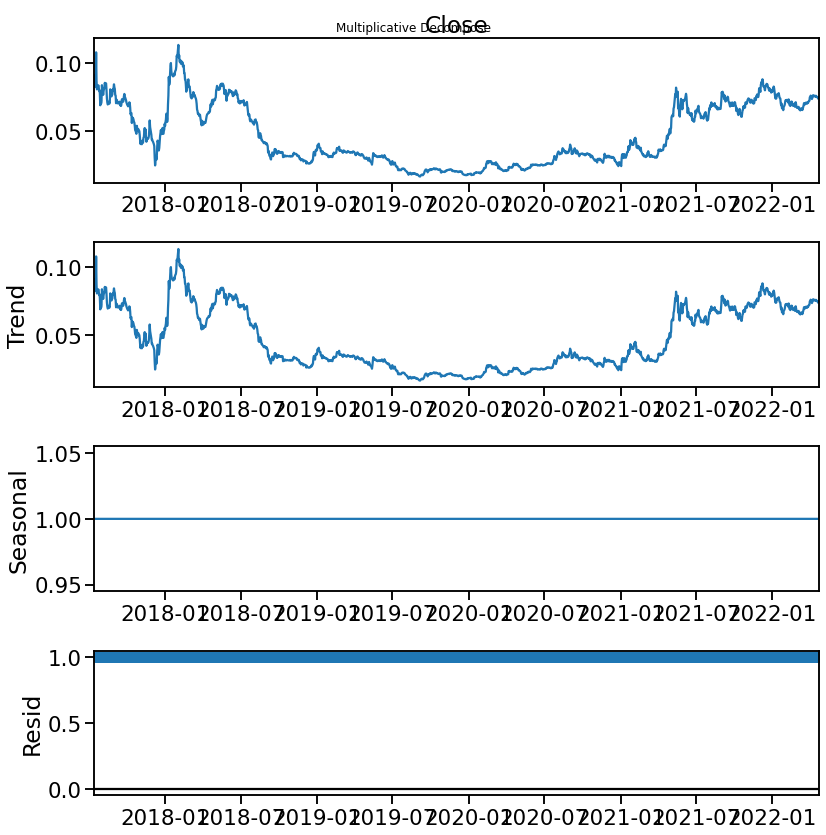

In [71]:
plt.rcParams.update({'figure.figsize':(12,12)})
adddec.plot().suptitle('\nMultiplicative Decompose',fontsize=12)

# Stationarity
•	A time series is said to be stationary if it does not show seasonal or trend effects on an aggregate level
•	This can be observed by analyzing the seasonal decomposition of the time series attribute to be forecast 
•	So, to check if data is stationary or not, we used the Augmented Dickey-Fuller (ADF) test. It is the most popular statistical method to find if the series is stationary or not. It is also called as Unit Root Test.


In [72]:
# Stationarity check for Close Values
adfuller_results = adfuller(df_hdt.Close.dropna())

print(f'ADF Statistic: {adfuller_results[0]}')
print(f'p-value: {adfuller_results[1]}')
print('Critical Values:')
for key, value in adfuller_results[4].items():
    print(f'{key}: {value:.4f}')

ADF Statistic: -2.5319498726084544
p-value: 0.10789281601686157
Critical Values:
1%: -3.4342
5%: -2.8632
10%: -2.5677


Using a significant level alpha of 0.05, p-value for Close Prices are significantly larger than alpha, which means there's enough evidence to accept the Null Hypothesis.

H0: Process is not stationary

V/s

H1: Process is stationary

Here __p-value is too Large than alpha__ Hence __accept H0__ and conclude that __process is not stationary__.

# 12. Types of Volatility and How They are Measured
0. <a href='#0.-Index'>Back-to-top</a>

(Source: https://www.investopedia.com/terms/v/vix.asp)

Volatility attempts to measure the magnitude of price movements that a financial instrument experiences over a certain period of time. The more dramatic the price swings are in that instrument, the higher the level of volatility, and vice versa.
“Volatility does not measure the direction of price changes, merely their dispersion. This is because when calculating standard deviation (or variance), all differences are squared, so that negative and positive differences are combined into one quantity. Two instruments with different volatilities may have the same expected return, but the instrument with higher volatility will have larger swings in values over a given period of time.” (Source: Wikipedia)
Volatility can either be historical or implied; both are usually expressed in percentage terms.
	Historical Volatility (HV) or Realized Volatility is the actual volatility demonstrated by the underlying over a period of time, such as the past month or year. Realized Volatility is commonly calculated as the standard deviation of price returns, which is the dollar change in price as a percentage of previous day's price.
	
	Implied volatility (IV), on the other hand, is the level of volatility of the underlying that is implied by the current option price.
The standard deviation will be different for log returns computed over longer or shorter intervals. For this specific project, the volatility would be for a certain fixed interval window (INTERVAL_WINDOW) is the standard deviation of log returns, or the square root of the sum of squares of log returns:

$σ_interval=√(Σ_t r_(t-1,t)^2 )$

And then to scale the daily volatility by a certain frequency (weekly, monthly, yearly), we can multiply the daily volatility by the square root of that frequency in terms of day divided by the interval minus 1 (INTERVAL_WINDOW - 1). 

For example:

$σ_daily=√(Σ_t r_(t-1,t)^2 ) × √(1/(intⅇrval-1))$

$σ_annualized=√(Σ_t r_(t-1,t)^2 ) × √(365/(intⅇrval-1))$

$σ_monthly=√(Σ_t r_(t-1,t)^2 ) × √(30/(intⅇrval-1))$

$σ_weekly=√(Σ_t r_(t-1,t)^2 ) × √(7/(intⅇrval-1))$


# 13. Returns
0. <a href='#0.-Index'>Back-to-top</a>

In [73]:
# CALCULATE PRICE RETURNS AS DAILY PERCENTAGE CHANGE USING pct_change()
df_hdt['returns'] = 100 * df_hdt.Close.pct_change().dropna()


In [74]:
returns=(df_hdt['Close']/df_hdt['Close'].shift(2)).dropna()
returns

Open Time
2017-07-16    0.903817
2017-07-17    0.998882
2017-07-18    1.309955
2017-07-19    0.992186
2017-07-20    0.747308
                ...   
2022-04-19    0.992815
2022-04-20    0.993257
2022-04-21    0.985915
2022-04-22    1.002877
2022-04-23    1.014639
Name: Close, Length: 1743, dtype: float64

### log-return
For practicality purposes, it's generally preferable to use the log returns especially in mathematic modeling, because it helps eliminate non-stationary properties of time series data, and makes it more stable:
LOG RETURNS FORMULA:


There's another advantage to log returns, which is that they're additive across time: 


In [75]:
df_hdt['log_returns']=np.log(df_hdt['Close']/df_hdt['Close'].shift(1)).dropna()
df_hdt

Open      High       Low     Close      Volume  \
Open Time                                                        
2017-07-14  0.080000  0.091033  0.080000  0.090993   1942.0570   
2017-07-15  0.090993  0.093699  0.087127  0.087635   4013.0660   
2017-07-16  0.087508  0.087635  0.075591  0.082241   8904.1580   
2017-07-17  0.082368  0.088394  0.081699  0.087537   6650.9330   
2017-07-18  0.087831  0.109068  0.084777  0.107732   7245.7410   
...              ...       ...       ...       ...         ...   
2022-04-19  0.074891  0.075316  0.074491  0.074759  67687.0812   
2022-04-20  0.074760  0.075065  0.074136  0.074386  70877.0364   
2022-04-21  0.074385  0.074441  0.073310  0.073706  91867.8927   
2022-04-22  0.073707  0.075194  0.073662  0.074600  74168.8920   
2022-04-23  0.074601  0.074921  0.074179  0.074785  16050.7307   

                     Close Time  Quote Asset Volume  No. of Treades  \
Open Time                                                             
2017-07-14  1500076799999000064          170.238524            1994   
2017-07-15  1500163199999000064          363.031788            4623   
2017-07-16  1500249599999000064          722.212482            8137   
2017-07-17  1500335999999000064          568.246538            7639   
2017-07-18  1500422399999000064          674.497850            8121   
...                         ...                 ...             ...   
2022-04-19  1650412799999000064         5067.547712          106954   
2022-04-20  1650499199999000064         5287.533675          127312   
2022-04-21  1650585599999000064         6792.248120          142273   
2022-04-22  1650671999999000064         5521.630247          136935   
2022-04-23  1650758399999000064         1197.977426           36107   

            TB Based Volume  TB Quote Volume        Ignore    returns  \
Open Time                                                               
2017-07-14        1076.4050        94.825272  22262.266977        NaN   
2017-07-15        2250.3180       203.541498  22275.368018  -3.690394   
2017-07-16        5557.5750       450.343887  22295.472958  -6.155075   
2017-07-17        3859.4850       329.668753  22165.742812   6.439610   
2017-07-18        4202.0550       393.111403  22505.624692  23.070245   
...                     ...              ...           ...        ...   
2022-04-19       33707.1148      2523.535888      0.000000  -0.176256   
2022-04-20       34312.3021      2560.087543      0.000000  -0.498937   
2022-04-21       46514.0402      3439.276990      0.000000  -0.914151   
2022-04-22       39379.6780      2931.560110      0.000000   1.212927   
2022-04-23        8200.4263       612.140314      0.000000   0.247989   

            log_returns  
Open Time                
2017-07-14          NaN  
2017-07-15    -0.037602  
2017-07-16    -0.063527  
2017-07-17     0.062408  
2017-07-18     0.207585  
...                 ...  
2022-04-19    -0.001764  
2022-04-20    -0.005002  
2022-04-21    -0.009184  
2022-04-22     0.012056  
2022-04-23     0.002477  

[1745 rows x 13 columns]

In [76]:
# DROPPING THE 1ST ROW OF DATA 
# BECAUSE I SHIFTED IT FORWARD TO CALCULATE RETURNS/LOG RETURNS
df_hdt.dropna(inplace=True)
df_hdt

Open      High       Low     Close      Volume  \
Open Time                                                        
2017-07-15  0.090993  0.093699  0.087127  0.087635   4013.0660   
2017-07-16  0.087508  0.087635  0.075591  0.082241   8904.1580   
2017-07-17  0.082368  0.088394  0.081699  0.087537   6650.9330   
2017-07-18  0.087831  0.109068  0.084777  0.107732   7245.7410   
2017-07-19  0.107732  0.108732  0.084290  0.086853   7384.9760   
...              ...       ...       ...       ...         ...   
2022-04-19  0.074891  0.075316  0.074491  0.074759  67687.0812   
2022-04-20  0.074760  0.075065  0.074136  0.074386  70877.0364   
2022-04-21  0.074385  0.074441  0.073310  0.073706  91867.8927   
2022-04-22  0.073707  0.075194  0.073662  0.074600  74168.8920   
2022-04-23  0.074601  0.074921  0.074179  0.074785  16050.7307   

                     Close Time  Quote Asset Volume  No. of Treades  \
Open Time                                                             
2017-07-15  1500163199999000064          363.031788            4623   
2017-07-16  1500249599999000064          722.212482            8137   
2017-07-17  1500335999999000064          568.246538            7639   
2017-07-18  1500422399999000064          674.497850            8121   
2017-07-19  1500508799999000064          723.009116            8314   
...                         ...                 ...             ...   
2022-04-19  1650412799999000064         5067.547712          106954   
2022-04-20  1650499199999000064         5287.533675          127312   
2022-04-21  1650585599999000064         6792.248120          142273   
2022-04-22  1650671999999000064         5521.630247          136935   
2022-04-23  1650758399999000064         1197.977426           36107   

            TB Based Volume  TB Quote Volume        Ignore    returns  \
Open Time                                                               
2017-07-15        2250.3180       203.541498  22275.368018  -3.690394   
2017-07-16        5557.5750       450.343887  22295.472958  -6.155075   
2017-07-17        3859.4850       329.668753  22165.742812   6.439610   
2017-07-18        4202.0550       393.111403  22505.624692  23.070245   
2017-07-19        4794.2620       468.260238  22694.832801 -19.380500   
...                     ...              ...           ...        ...   
2022-04-19       33707.1148      2523.535888      0.000000  -0.176256   
2022-04-20       34312.3021      2560.087543      0.000000  -0.498937   
2022-04-21       46514.0402      3439.276990      0.000000  -0.914151   
2022-04-22       39379.6780      2931.560110      0.000000   1.212927   
2022-04-23        8200.4263       612.140314      0.000000   0.247989   

            log_returns  
Open Time                
2017-07-15    -0.037602  
2017-07-16    -0.063527  
2017-07-17     0.062408  
2017-07-18     0.207585  
2017-07-19    -0.215430  
...                 ...  
2022-04-19    -0.001764  
2022-04-20    -0.005002  
2022-04-21    -0.009184  
2022-04-22     0.012056  
2022-04-23     0.002477  

[1744 rows x 13 columns]

# 14. PLOT DISTRIBUTION PLOTS OF RETURNS & LOG RETURNS
##  AND VISUALLY COMPARE THEM WITH THE STANDARD NORMAL DISTRIBUTION
0. <a href='#0.-Index'>Back-to-top</a>

In [77]:
from scipy.stats import norm

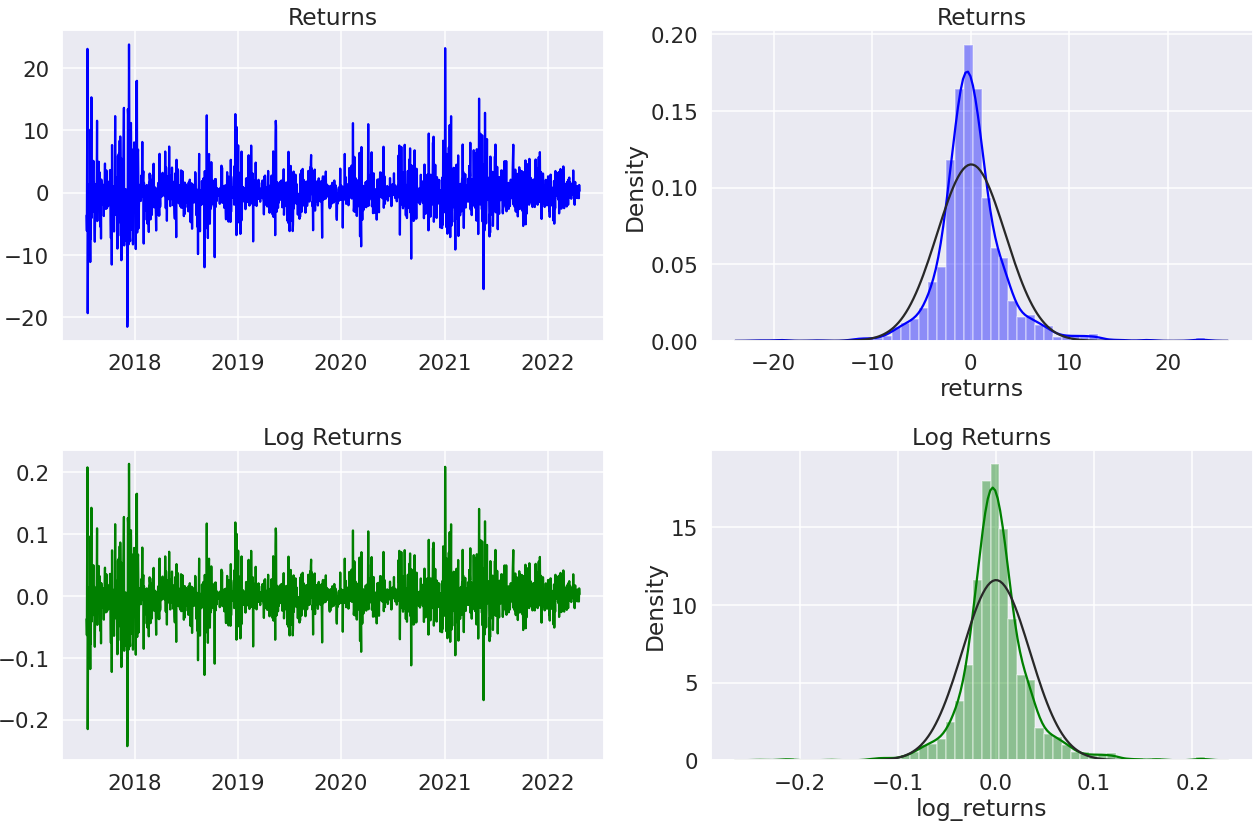

Both Returns & Log Returns show some : slight positive skewness, positive kurtosis (leptokurtic) - higher peak with thicker tails than the standard normal distribution.


In [78]:

with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(df_hdt.returns, color='blue')
    axes[0][0].set_title('Returns')

    sns.distplot(df_hdt.returns, norm_hist=True, fit=norm, color='blue',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Returns')

    axes[1][0].plot(df_hdt.log_returns, color='green')
    axes[1][0].set_title('Log Returns')

    sns.distplot(df_hdt.log_returns, norm_hist=True, fit=norm, color='green',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Log Returns')
    plt.tight_layout()
    
fig.show();
plt.show()   

print('Both Returns & Log Returns show some : slight positive skewness, positive kurtosis (leptokurtic) - higher peak with thicker tails than the standard normal distribution.')


In [79]:
# returns.plot(kind='kde',figsize=(12,5),)

In [80]:
df_hdt.returns.describe()

count    1744.000000
mean        0.048142
std         3.468076
min       -21.572877
25%        -1.594944
50%        -0.202786
75%         1.350336
max        23.778502
Name: returns, dtype: float64

In [81]:
df_hdt.log_returns.describe()

count    1744.000000
mean       -0.000112
std         0.034404
min        -0.243000
25%        -0.016078
50%        -0.002030
75%         0.013413
max         0.213324
Name: log_returns, dtype: float64

(Source: https://www.investopedia.com/articles/investing/102715/computing-historical-volatility-excel.asp)

The standard deviation will be different for log returns computed over longer or shorter intervals. For this specific project, the volatility would be for a certain fixed interval window (INTERVAL_WINDOW) is the standard deviation of log returns, or the square root of the sum of squares of log returns:

    

And then to scale the daily volatility by a certain frequency (weekly, monthly, yearly), we can multiply the daily volatility by the square root of that frequency in terms of day divided by the interval minus 1 (INTERVAL_WINDOW - 1). For example:

 



####  CREATE A FUNCTION THAT CALCULATE REALIZED VOLATILITY FROM SAILY LOG RETURNS

In [82]:

def realized_volatility_daily(series_log_return):
    """
    Get the daily realized volatility which is calculated as the square root
    of sum of squares of log returns within a specific window interval 
    """
    n = len(series_log_return)
    return np.sqrt(np.sum(series_log_return**2)/(n - 1))

# 15. Interval Window Selection
0. <a href='#0.-Index'>Back-to-top</a>

For this specific project I'll use an interval window of 30 days (equivalent to roughly 1 month of trading for cryptocurrencies). The goal here is to forecast the average realized volatility of the next n_future 7 days using all previous available datapoint with GARCH models (expanding window forecasting), and using a number of immediate past/historical datapoints (n_past) with Neural Networks (sliding window forecasting).

In [83]:
intervals = [7, 30, 60, 180, 365]
vols_df = {}

# ITERATE OVER intervals LIST
for i in intervals:
    # GET DAILY LOG RETURNS USING THAT INTERVAL
    vols = df_hdt.log_returns.rolling(window=i)\
                         .apply(realized_volatility_daily).values

    vols_df[i] = vols

# CONVERT vols_df FROM DICTIONARY TO PANDAS DATAFRAME
vols_df = pd.DataFrame(vols_df, columns=intervals, index=df_hdt.index)
vols_df

7         30        60        180       365
Open Time                                                   
2017-07-15       NaN       NaN       NaN       NaN       NaN
2017-07-16       NaN       NaN       NaN       NaN       NaN
2017-07-17       NaN       NaN       NaN       NaN       NaN
2017-07-18       NaN       NaN       NaN       NaN       NaN
2017-07-19       NaN       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...       ...
2022-04-19  0.006708  0.011022  0.013766  0.018899  0.029296
2022-04-20  0.006888  0.010642  0.013740  0.018900  0.029120
2022-04-21  0.007809  0.010727  0.013736  0.018695  0.028959
2022-04-22  0.008480  0.010798  0.013670  0.018689  0.028811
2022-04-23  0.007428  0.010806  0.013649  0.018689  0.028811

[1744 rows x 5 columns]

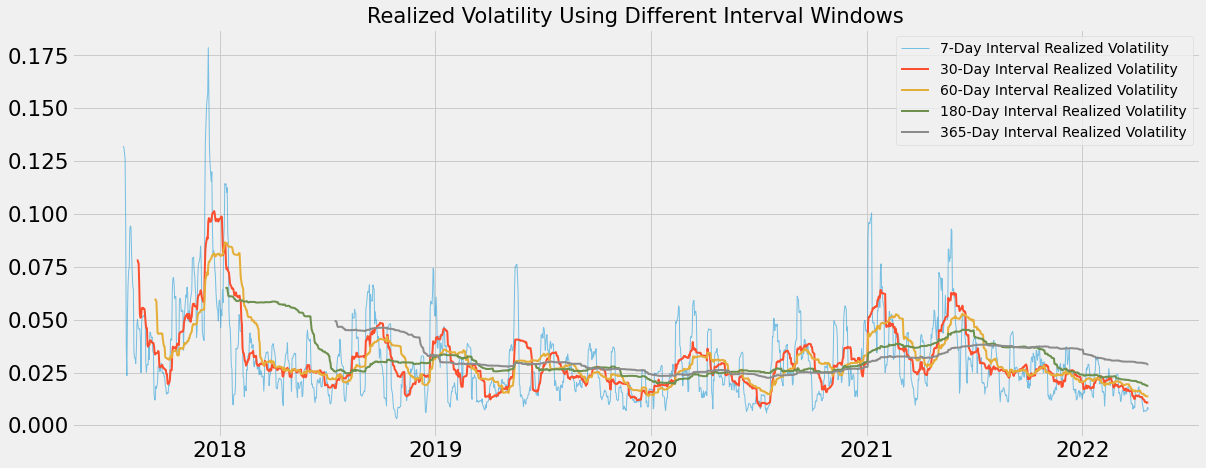

The reason we selected 30 days is because 7 days seems too noisy to observe meaningful patterns, while longer intervals seem to smooth the volatility down significantly and tend to revert back to the mean. Using interval window of 30 days would also help avoid wasting too many datapoints at the beginning of the dataset. Time-series forecasting models are the models that are capable to predict future values based on previously observed values. Target future data in this case is obtained by shifting the current volatility backward by the number of n_future lags. For example, respected to last week's Monday, this week's Monday is the future; therefore I just need to shift the volatility this week back by 7 days, and use it as the desired future output for last week's, which I would then use for Neural Networks training and model performance evaluation.


In [84]:
# CHANGING MATPLOTLIB STYLE
plt.style.use(['fivethirtyeight'])

fig, ax = plt.subplots(figsize=(18,7))

for i in intervals:
    if i == 7:
        alpha = 0.5
        lw = 1
    else:
        alpha = 1.0
        lw = 2
    ax.plot(vols_df[i], label=f'{i}-Day Interval Realized Volatility', 
            alpha=alpha, lw=lw)

ax.set_title('Realized Volatility Using Different Interval Windows', fontsize=21)

plt.legend(loc='best', prop={'size': 14})
# plt.savefig(os.path.join(directory_to_img, 'diff_intervals.png'), 
           # dpi=300, bbox_inches='tight')
plt.show();

print("The reason we selected 30 days is because 7 days seems too noisy to observe meaningful patterns, while longer intervals seem to smooth the volatility down significantly and tend to revert back to the mean. Using interval window of 30 days would also help avoid wasting too many datapoints at the beginning of the dataset. Time-series forecasting models are the models that are capable to predict future values based on previously observed values. Target future data in this case is obtained by shifting the current volatility backward by the number of n_future lags. For example, respected to last week's Monday, this week's Monday is the future; therefore I just need to shift the volatility this week back by 7 days, and use it as the desired future output for last week's, which I would then use for Neural Networks training and model performance evaluation.")

In [85]:
INTERVAL_WINDOW = 30
n_future = 7

# GET BACKWARD LOOKING REALIZED VOLATILITY
df_hdt['vol_current'] = df_hdt.log_returns.rolling(window=INTERVAL_WINDOW)\
                                   .apply(realized_volatility_daily)

# GET FORWARD LOOKING REALIZED VOLATILITY 
df_hdt['vol_future'] = df_hdt.log_returns.shift(-n_future)\
                                 .rolling(window=INTERVAL_WINDOW)\
                                 .apply(realized_volatility_daily)

In [86]:
df_hdt.describe()

Open         High          Low        Close        Volume  \
count  1744.000000  1744.000000  1744.000000  1744.000000  1.744000e+03   
mean      0.046383     0.047503     0.045210     0.046373  1.936145e+05   
std       0.022526     0.023131     0.021886     0.022511  1.415809e+05   
min       0.016415     0.016560     0.016150     0.016415  3.008810e+03   
25%       0.027699     0.028457     0.026935     0.027696  1.021178e+05   
50%       0.035328     0.036102     0.034501     0.035328  1.577369e+05   
75%       0.068981     0.070496     0.067362     0.068972  2.483269e+05   
max       0.113075     0.123799     0.109343     0.113185  1.396957e+06   

         Close Time  Quote Asset Volume  No. of Treades  TB Based Volume  \
count  1.744000e+03         1744.000000    1.744000e+03      1744.000000   
mean   1.575461e+18         7742.002105    1.925460e+05     97117.519844   
std    4.351050e+16         5792.318124    1.310249e+05     70746.071457   
min    1.500163e+18          288.409077    4.623000e+03      1478.180000   
25%    1.537812e+18         4105.912515    1.127912e+05     50656.815775   
50%    1.575461e+18         6472.636008    1.586185e+05     79282.497500   
75%    1.613110e+18         9525.100811    2.312652e+05    126442.429750   
max    1.650758e+18        56836.342035    1.201493e+06    701279.783000   

       TB Quote Volume         Ignore      returns  log_returns  vol_current  \
count      1744.000000    1744.000000  1744.000000  1744.000000  1715.000000   
mean       3878.063857   11542.333473     0.048142    -0.000112     0.030719   
std        2849.673535   48653.331135     3.468076     0.034404     0.015153   
min         147.688668       0.000000   -21.572877    -0.243000     0.008901   
25%        2013.650455       0.000000    -1.594944    -0.016078     0.021423   
50%        3303.031390       0.000000    -0.202786    -0.002030     0.026635   
75%        4810.391491       0.000000     1.350336     0.013413     0.035192   
max       28345.303271  498596.725953    23.778502     0.213324     0.101370   

        vol_future  
count  1708.000000  
mean      0.030564  
std       0.014971  
min       0.008901  
25%       0.021390  
50%       0.026620  
75%       0.034989  
max       0.101370

In [87]:
df_hdt.dropna(inplace=True)

In [88]:
#droping clmn
# df = df.drop(['Dividends', 'Stock Splits'], axis=1)

# 16. Exploratory Data Analysis
0. <a href='#0.-Index'>Back-to-top</a>

First I would just plot out my desired target outputs vol_future with respect to the current volatility vol_current. The first plot shows all the datapoints I have available that covers 7 years, but then the second plot is only zooming in the most recent 365 days.

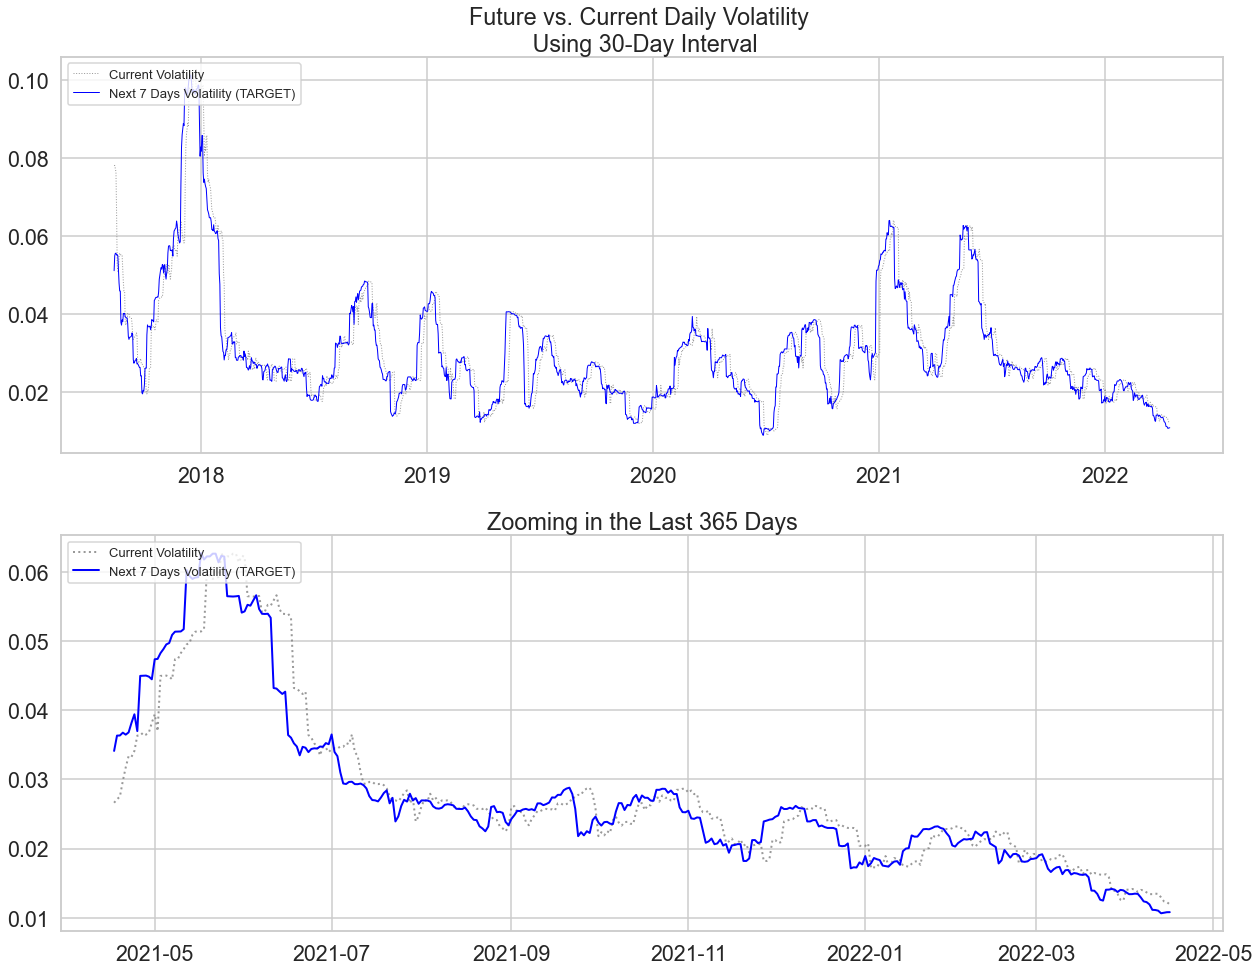

In [89]:
n_zoom = 365
sns.set_context("talk",
                font_scale=1.3)
# plt.style.use(['seaborn'])

# VISUALIZE REALIZED CURRENT VS. FUTURE VOLATILITY
with sns.axes_style("whitegrid"):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,14))

    ax1.plot(df_hdt.vol_current, alpha=.8, lw=1, color='gray', ls=':',
            label='Current Volatility')
    ax1.plot(df_hdt.vol_future, lw=1, color='blue',
            label=f'Next {n_future} Days Volatility (TARGET)')

    ax2.plot(df_hdt.vol_current[-n_zoom:], alpha=.8, lw=2, color='gray', ls=':',
            label='Current Volatility')
    ax2.plot(df_hdt.vol_future[-n_zoom:], lw=2, color='blue',
            label=f'Next {n_future} Days Volatility (TARGET)')

    ax1.title.set_text(f'Future vs. Current Daily Volatility \n Using {INTERVAL_WINDOW}-Day Interval')
    ax2.title.set_text(f'Zooming in the Last {n_zoom} Days')

    ax1.legend(loc='upper left', prop={'size': 13}, frameon=True)
    ax2.legend(loc='upper left', prop={'size': 13}, frameon=True)
    plt.tight_layout()
   # plt.savefig(os.path.join(directory_to_img, 'daily_vol.jpg'), 
               # dpi=300, bbox_inches='tight')
    plt.show();

# 17. Daily Volatility Grouped by Month
0. <a href='#0.-Index'>Back-to-top</a>

In [90]:
df_hdt

Open      High       Low     Close      Volume  \
Open Time                                                        
2017-08-13  0.080182  0.080459  0.068007  0.073824  20955.9150   
2017-08-14  0.073850  0.079911  0.068535  0.070899  28508.6900   
2017-08-15  0.070899  0.075200  0.066161  0.069395  28889.1650   
2017-08-16  0.069395  0.076669  0.068310  0.069743  22035.2690   
2017-08-17  0.069735  0.072254  0.068077  0.070479  24002.4310   
...              ...       ...       ...       ...         ...   
2022-04-12  0.075379  0.076000  0.074971  0.075545  91115.3037   
2022-04-13  0.075546  0.076350  0.074917  0.075789  82612.9303   
2022-04-14  0.075789  0.075940  0.074870  0.075657  70006.6192   
2022-04-15  0.075658  0.075775  0.074769  0.074984  52006.0891   
2022-04-16  0.074984  0.075890  0.074904  0.075762  37649.6991   

                     Close Time  Quote Asset Volume  No. of Treades  \
Open Time                                                             
2017-08-13  1502668799999000064         1533.758406           20875   
2017-08-14  1502755199999000064         2068.810796           29214   
2017-08-15  1502841599999000064         2022.912924           22507   
2017-08-16  1502927999999000064         1572.478417           21235   
2017-08-17  1503014399999000064         1686.629152           21902   
...                         ...                 ...             ...   
2022-04-12  1649807999999000064         6876.850214          152289   
2022-04-13  1649894399999000064         6253.871680          137361   
2022-04-14  1649980799999000064         5277.187151          101869   
2022-04-15  1650067199999000064         3912.928297           76665   
2022-04-16  1650153599999000064         2834.120089           59436   

            TB Based Volume  TB Quote Volume        Ignore   returns  \
Open Time                                                              
2017-08-13       10336.5100       755.859959  40432.136696 -7.907638   
2017-08-14       12371.9130       895.368736  46793.271653 -3.962126   
2017-08-15       12518.1310       876.202488  45076.387977 -2.121328   
2017-08-16        9693.4390       691.486197  46333.435379  0.501477   
2017-08-17       11539.0920       810.812566  50579.872288  1.055303   
...                     ...              ...           ...       ...   
2022-04-12       45772.3935      3454.472049      0.000000  0.220220   
2022-04-13       41342.4860      3129.664738      0.000000  0.322986   
2022-04-14       35404.8675      2668.971074      0.000000 -0.174168   
2022-04-15       25190.7843      1895.426802      0.000000 -0.889541   
2022-04-16       19572.4027      1473.547616      0.000000  1.037555   

            log_returns  vol_current  vol_future  
Open Time                                         
2017-08-13    -0.082378     0.078095    0.051131  
2017-08-14    -0.040428     0.078144    0.054961  
2017-08-15    -0.021442     0.077351    0.055598  
2017-08-16     0.005002     0.076483    0.055595  
2017-08-17     0.010498     0.066087    0.055176  
...                 ...          ...         ...  
2022-04-12     0.002200     0.013444    0.011022  
2022-04-13     0.003225     0.012941    0.010642  
2022-04-14    -0.001743     0.012363    0.010727  
2022-04-15    -0.008935     0.012261    0.010798  
2022-04-16     0.010322     0.011926    0.010806  

[1708 rows x 15 columns]

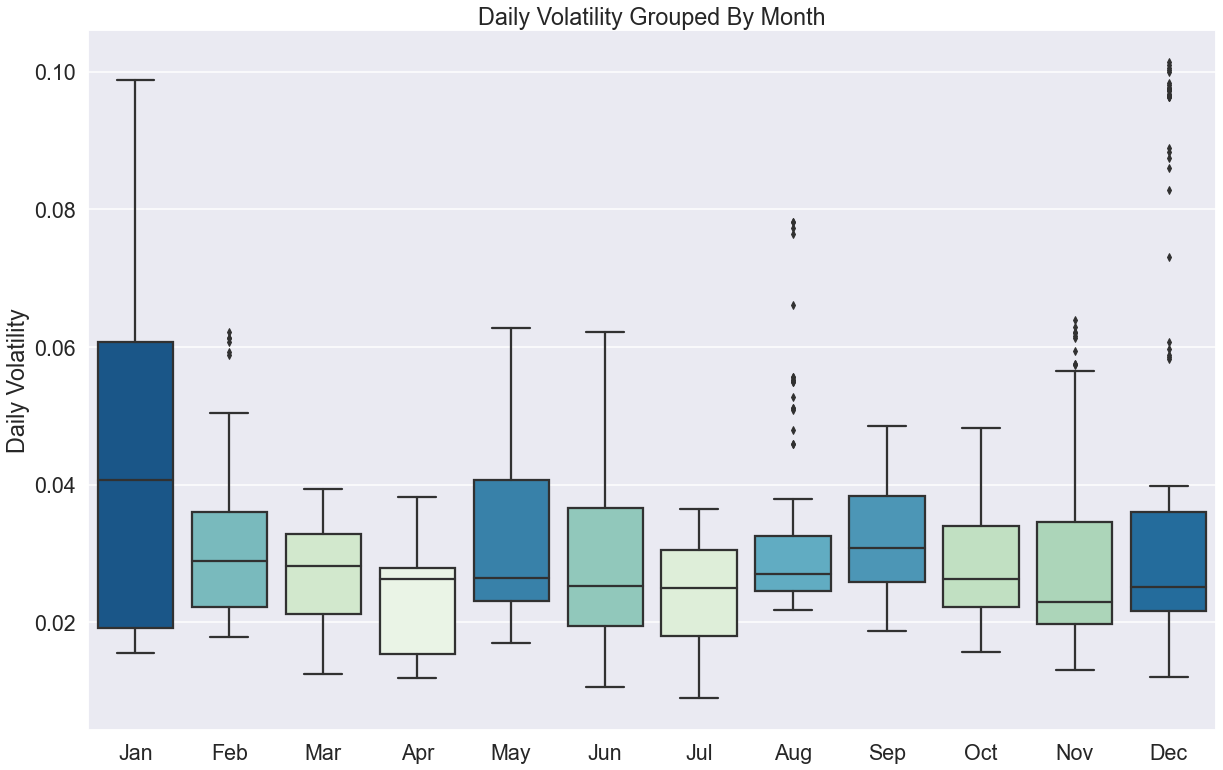

In [91]:
# PRESORT MONTHS IN CHRONOLOGICAL ORDER 
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 
                  'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']

# GROUP vol_current BY MONTH AND TAKE THE MEAN
data = df_hdt.groupby(by=[df_hdt.index.month_name()]).vol_current.mean()

# ABBREVIATE MONTH NAME
data.index = [x[:3] for x in data.index]

# SELECT PALETTE
pal = sns.color_palette("GnBu", len(data))

# SORT MONTH BY AVERAGE vol_current
rank = data.argsort().argsort().reindex(ordered_months)

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(18,12))
    
    sns.boxplot(x=[x[:3] for x in df_hdt.index.month_name()], 
                y=df_hdt.vol_current, 
                palette=np.array(pal)[rank],
                order=ordered_months)
    ax.set(xlabel='', 
           ylabel='Daily Volatility', 
           title='Daily Volatility Grouped By Month')
   # plt.savefig(os.path.join(directory_to_img, "vol_by_month.png"), 
       #         dpi=300, bbox_inches='tight')
    plt.show()

In [92]:
df_hdt.vol_current.sort_values(ascending=False)[:10]

Open Time
2017-12-22    0.101370
2017-12-21    0.100956
2017-12-20    0.100565
2017-12-19    0.100289
2017-12-23    0.099984
2018-01-03    0.098806
2018-01-04    0.098584
2017-12-18    0.098381
2017-12-13    0.098042
2018-01-02    0.098000
Name: vol_current, dtype: float64

It can be observed that:

volatility has consistently reached some of its higher points in the in the months of June/Feb historically

Feb and March have the most amount of large outliers



#### Daily Volatility Grouped by Year

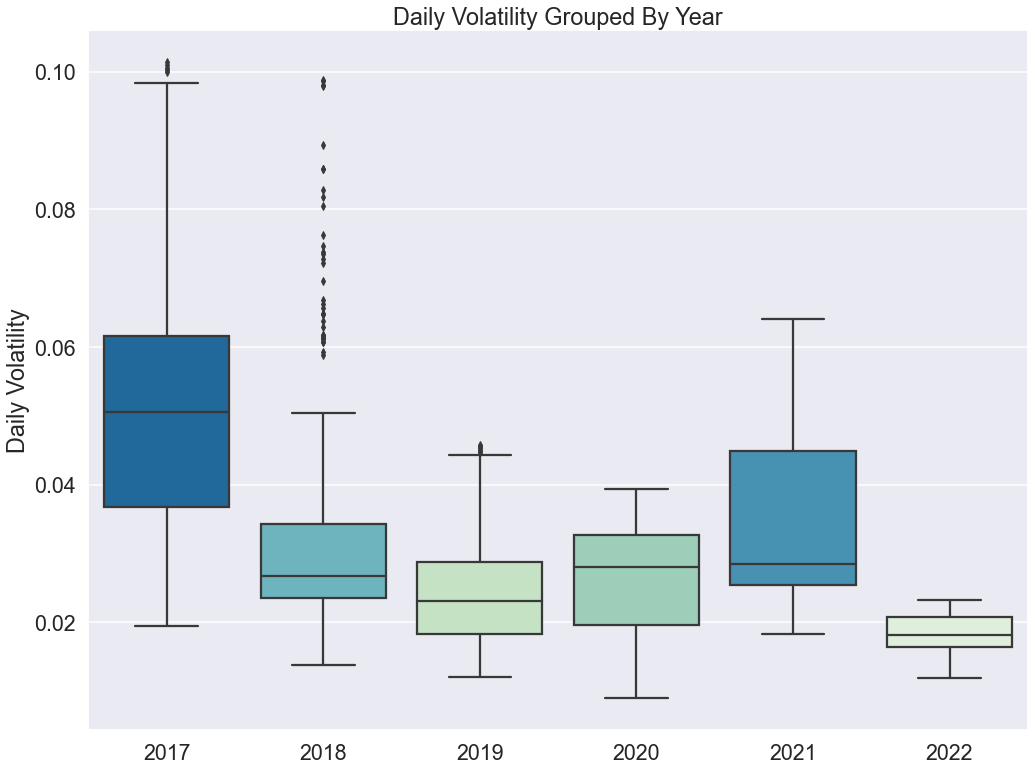

In [93]:
# GROUP vol_current BY YEAR AND TAKE THE MEAN
data = df_hdt.groupby(by=[df_hdt.index.year]).vol_current.mean()

# SELECT PALETTE
pal = sns.color_palette("GnBu", len(data))

# SORT MONTH BY AVERAGE vol_current
rank = data.argsort().argsort()

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(15,12))
    
    sns.boxplot(x=df_hdt.index.year, 
                y=df_hdt.vol_current, 
                palette=np.array(pal)[rank])
    ax.set(xlabel='', 
           ylabel='Daily Volatility', 
           title='Daily Volatility Grouped By Year')
    # plt.savefig(os.path.join(directory_to_img, "vol_by_year.png"), 
               # dpi=300, bbox_inches='tight')
    plt.show()

Cryptocurrencies have gone through some huge structural changes in the last few years that would've affected volatility directly, such as:

Crypto Options became available on Deribit in 2016
Bitcoin Futures was offered on CME in 2017
and then CME Bitcoin Options in 2020
These events have allowed people to trade crypto volatility more efficiently, and therefore data pre-2016 are likely structurally different, and probably followed different patterns compared to data after 2016.

We can these big events being reflected in the plot above - Bitcoin's first record peak in 2017 (around USD 19,800 towards the end of December). And the outliers in 2020 corresponded with its over 200% surge in 2020 (Bitcoin started at USD 7,200 at the beginning of 2020). It reached USD 20,000 on most exchanges on 12/15/2020, and then proceeded to hit USD 30,000 just 17 days later, which is no small feat. To put things in perspective, it took the Dow Jones close to 3 years to make the same move. And then, on 01/07/2021 it broke USD 40,000. As of the time this report is written, BTC-USD is traded at high USD 49,700.

It can be observed that 2021's daily volatiliy overall has also been on the higher side.

# 18. Daily Volatility Distribution
0. <a href='#0.-Index'>Back-to-top</a>

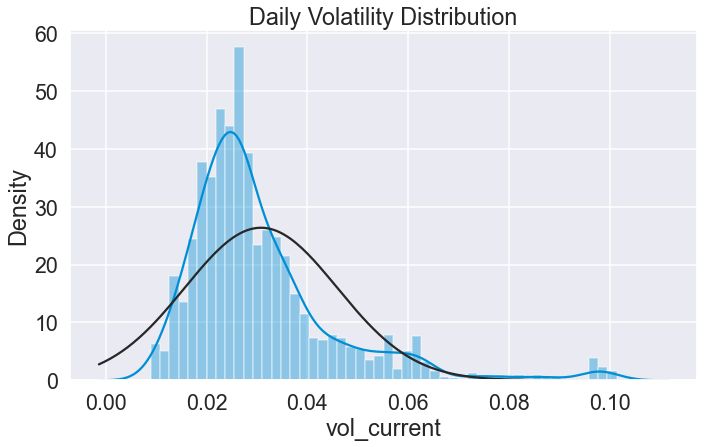

In [94]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.distplot(df_hdt.vol_current, norm_hist=True, fit=norm,
                bins=50, ax=ax)
    plt.title('Daily Volatility Distribution')
#    plt.savefig(os.path.join(directory_to_img, "vol_dist.png"), 
 #               dpi=300, bbox_inches='tight')
    plt.show();

The distribution of daily realized volatility is positively skewed, with a small number of larger values spreaded thinly on the right.


A positively skewed  distribution would have smaller median compared to mean, and mode smaller than median (mode < median < mean).

# 19. returns/log_returns Decomposition
0. <a href='#0.-Index'>Back-to-top</a>

In [95]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


In [96]:
dec=seasonal_decompose(df_hdt.log_returns,model='additive',period=1)

Text(0.5, 0.98, '\nAdditive Decompose')

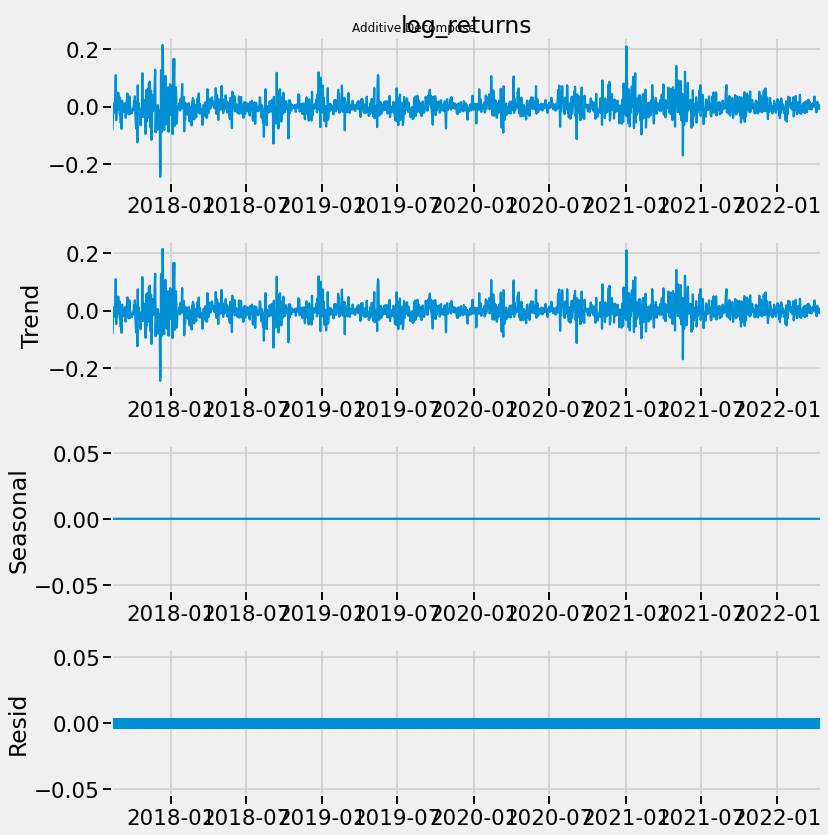

In [97]:
plt.rcParams.update({'figure.figsize':(12,12)})
dec.plot().suptitle('\nAdditive Decompose',fontsize=12)


# 20. Returns/Log Returns Stationarity Checking
0. <a href='#0.-Index'>Back-to-top</a>

In [98]:
from statsmodels.tsa.stattools import adfuller

In [99]:
# LOG RETURNS
adfuller_results = adfuller(df_hdt.log_returns.dropna())

print(f'ADF Statistic: {adfuller_results[0]}')
print(f'p-value: {adfuller_results[1]}')
print('Critical Values:')
for key, value in adfuller_results[4].items():
    print(f'{key}: {value:.4f}')

ADF Statistic: -7.427713835277008
p-value: 6.482365808907008e-11
Critical Values:
1%: -3.4342
5%: -2.8633
10%: -2.5677


In [100]:
# RETURNS
adfuller_results = adfuller(df_hdt.returns.dropna())

print(f'ADF Statistic: {adfuller_results[0]}')
print(f'p-value: {adfuller_results[1]}')
print('Critical Values:')
for key, value in adfuller_results[4].items():
    print(f'{key}: {value:.4f}')

ADF Statistic: -7.300161078298971
p-value: 1.3451663961193865e-10
Critical Values:
1%: -3.4342
5%: -2.8633
10%: -2.5677


Using a significant level alpha of 0.05, p-value for both Returns and Log Returns are significantly smaller than alpha, which means there's enough evidence to reject the Null Hypothesis.

H0: Process is not stationary
    
V/s

H1: Process is stationary
    
Here p-value too small than alpha Hence reject H0 and conclude that process is stationary.

--> Returns and Log returns are both not dependent on time/trend

# 21. Train-Validation-Test Splits
0. <a href='#0.-Index'>Back-to-top</a>


In [101]:
df_hdt.shape

(1708, 15)



There're a total of 1650 usable datapoints in this dataset which covers a period of almost 4.5 years from January-2017 until today (end of january 2022). Since cryptocurrencies are not traded on a regulated exchange, the Bitcoin market is open 24/7, 1 year covers a whole 365 trading days instead of 252 days a year like with other stocks and commodities.

I would split the dataset into 3 parts as follows:

the most recent 30 usable datapoints would be used for Final Model Testing - approx. 1.81%
1 full year (365 days) for Validation and Model Tuning during training - approx. 22.12%
and the remaining for Training - approx.76.07%


In [102]:
# PRE-DETERMINE DESIRED TEST & VALIDATION SIZES
test_size = 30
val_size = 365

# CONVERT TO INDICES
split_time_1 = len(df_hdt) - (val_size + test_size)
split_time_2 = len(df_hdt) - test_size

# GET CORRESPONDING DATETIME INDICES FOR EACH SET
train_idx = df_hdt.index[:split_time_1]
val_idx = df_hdt.index[split_time_1:split_time_2]
test_idx = df_hdt.index[split_time_2:]

In [103]:
val_idx 

DatetimeIndex(['2021-03-18', '2021-03-19', '2021-03-20', '2021-03-21',
               '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25',
               '2021-03-26', '2021-03-27',
               ...
               '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11',
               '2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15',
               '2022-03-16', '2022-03-17'],
              dtype='datetime64[ns]', name='Open Time', length=365, freq=None)

In [104]:
print(f'TRAINING \tFrom: {train_idx[0]} \tto: {train_idx[-1]} \t{len(train_idx)} days')
print(f'VALIDATION \tFrom: {val_idx[0]} \tto: {val_idx[-1]} \t{len(val_idx)} days')
print(f'TEST \t\tFrom: {test_idx[0]} \tto: {test_idx[-1]} \t{len(test_idx)} days')


TRAINING 	From: 2017-08-13 00:00:00 	to: 2021-03-17 00:00:00 	1313 days
VALIDATION 	From: 2021-03-18 00:00:00 	to: 2022-03-17 00:00:00 	365 days
TEST 		From: 2022-03-18 00:00:00 	to: 2022-04-16 00:00:00 	30 days


The target here would be vol_future which represents the daily realized volatility of the next n_future days from today (average daily volatility from t + n_future - INTERVAL_WINDOW to time step t + n_future).

For example, using an n_future value of 7 and an INTERVAL_WINDOW of 30, the value that I want to predict at time step t would be the average daily realized volatility from time step t-22 to time step t+7.

# Inputs

In [105]:
# SPLIT FORWARD VOLATILITY INTO 3 PARTS 
# (this would be the target)
y_train = df_hdt.vol_future[train_idx]
y_val = df_hdt.vol_future[val_idx]
y_test = df_hdt.vol_future[test_idx]

In [106]:
# SPLIT CURRENT DAILY REALIZED VOLATILITY INTO 3 PARTS 
# (this would be the input for baseline, random walk, and NN models)
x_train = df_hdt.vol_current[train_idx]
x_val = df_hdt.vol_current[val_idx]
x_test = df_hdt.vol_current[test_idx]

In [107]:
# SPLIT RETURNS INTO 3 PARTS
# (this would be the input for GARCH models)
r_train = df_hdt.returns[train_idx]
r_val = df_hdt.returns[val_idx]
r_test = df_hdt.returns[test_idx]

In [108]:
# SPLIT LOG RETURNS INTO 3 PARTS
# (mostly for visualization)
lr_train = df_hdt.log_returns[train_idx]
lr_val = df_hdt.log_returns[val_idx]
lr_test = df_hdt.log_returns[test_idx]

In [109]:
y_train.describe()

count    1313.000000
mean        0.031475
std         0.015744
min         0.008901
25%         0.021837
50%         0.027699
75%         0.036242
max         0.101370
Name: vol_future, dtype: float64

In [110]:
x_train.describe()

count    1313.000000
mean        0.031693
std         0.015991
min         0.008901
25%         0.021837
50%         0.027767
75%         0.036434
max         0.101370
Name: vol_current, dtype: float64

# Modeling
0. <a href='#0.-Index'>Back-to-top</a>

## Performance Metrics
Usually with financial time series, if we just shift through the historic data trying different methods, parameters and timescales, it's almost certain to find to some strategy with in-sample profitability at some point. However the whole purpose of "forecasting" is to predict the future based on currently available information, and a model that performs best on training data might not be the best when it comes to out-of-sample generalization (or overfitting). Avoiding/Minimizing overfitting is even more important in the constantly evolving financial markets where the stake is high.

The 2 main metrics I'd be using are __RMSPE (Root Mean Squared Percentage Error)__ and __RMSE (Root Mean Square Errors)__ with RMSPE prioritized. Timescaling is very important in the calculation of volatility due to the level of freedom in frequency/interval window selection. Therefore I think RMSPE would help capture degree of errors compared to desired target values better than other metrics. Also RMSPE would punish large errors more than regular MAPE (Mean Absolute Percentage Error), which is what I want to do here.

RMSE and RMSPE would be tracked across different models' performance on validation set forecasting to indicate their abilities to generalize on out-of-sample data.

In [111]:
# DEFINE ROOT MEAN SQUARED PERCENTAGE ERROR FUNCTION
def RMSPE(y_true, y_pred):
    """
    Compute Root Mean Squared Percentage Error between 2 arrays
    """
    output = np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))
    return output

In [112]:
# DEFINE ROOT MEAN SQUARED ERROR FUNCTION
def RMSE(y_true, y_pred):
    """
    Compute Root Mean Squared Error between 2 arrays
    """
    output = np.sqrt(MSE(y_true, y_pred))
    return output

In [113]:


# DEFINE ROOT MEAN SQUARED ERROR FUNCTION
def RMSE(y_true, y_pred):
    """
    Compute Root Mean Squared Error between 2 arrays
    """
    output = np.sqrt(np.subtract(y_true, y_pred).mean())
    return output

In [114]:
# INITIATE A DATAFRAME FOR MODEL PERFORMANCE TRACKING & COMPARISON 
perf_df = pd.DataFrame(columns=['Model', 'Validation RMSPE', 'Validation RMSE'])


In [115]:
# A FUNCTION THAT LOGS MODEL NAME, RMSE AND RMPSE INTO perf_df
# FOR EASY COMPARISON LATER
def log_perf(y_true, y_pred, model_name):
    perf_df.loc[len(perf_df.index)] = [model_name, 
                                       RMSPE(y_true, y_pred), 
                                       RMSE(y_true, y_pred)]
    return perf_df

In [116]:
# PLOTTING MODEL PREDICTIONS VS. TARGET VALUES
def viz_model(y_true, y_pred, model_name):
    sns.set_context("paper", font_scale=1.7)
    plt.rcParams["axes.grid"] = False

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(18,7))
        plt.plot(x_val_scaled, color='gray',  ls=':',
                label=f"Scaled Current Daily Volatility")
        
        plt.plot(y_true, color='blue', lw=2, 
                label=f"Target Volatility")
        plt.plot(y_pred, color='orange', lw=2.5,
                label=f'Forecasted Volatility')
        
        # plt.plot(lr_val, color='gray', alpha=0.4,
        #         label='Daily Log Returns')

        plt.title(f'{model_name} \non Validation Data')
        plt.legend(loc='best', frameon=True)

# 22. Fitting of ARIMA Model
0. <a href='#0.-Index'>Back-to-top</a>


Autoregressive integrated moving average ( ARIMA) is a statistical regression model, which can be utilized in time series forecasting applications, such as finance. ARIMA makes predictions while considering the lagged values of a time series. Lags of the stationarized series in the forecasting equation are called "autoregressive" terms, lags of the forecast errors are called "moving average" terms, and a time series which needs to be differenced to be made stationary is said to be an "integrated" version of a stationary series. Random-walk and random-trend models, autoregressive models, and exponential smoothing models are all special cases of ARIMA models.
A nonseasonal ARIMA model is classified as an "ARIMA(p,d,q)" model, where:
•	p is the number of autoregressive terms,
•	d is the number of nonseasonal differences needed for stationarity, and
•	q is the number of lagged forecast errors in the prediction equation.


In terms of y, the general forecasting equation is:
ŷt   =   μ + ϕ1 yt-1 +…+ ϕp yt-p - θ1et-1 -…- θqet-q
Here the moving average parameters (θ’s) are defined so that their signs are negative in the equation


In [117]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [118]:
import pmdarima as pmd

In [119]:
autoarima_model=pmd.auto_arima(lr_train,start_p=1,start_q=1,test='adf',trace=True)
autoarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-5123.463, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-5115.481, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-5125.130, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-5125.387, Time=0.90 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-5116.900, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-5123.452, Time=0.42 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-5121.692, Time=0.54 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-5126.876, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-5124.950, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-5124.944, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-5126.638, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-5123.198, Time=0.53 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 3.974 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1313
Model:               SARIMAX(0, 0, 1)   Log Likelihood                2565.438
Date:                Sat, 23 Apr 2022   AIC                          -5126.876
Time:                        14:37:08   BIC                          -5116.516
Sample:                             0   HQIC                         -5122.991
                               - 1313                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0934      0.015      6.288      0.000       0.064       0.123
sigma2         0.0012   2.35e-05     50.004      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2203.24
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [120]:
autoarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1313
Model:               SARIMAX(0, 0, 1)   Log Likelihood                2565.438
Date:                Sat, 23 Apr 2022   AIC                          -5126.876
Time:                        14:37:08   BIC                          -5116.516
Sample:                             0   HQIC                         -5122.991
                               - 1313                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0934      0.015      6.288      0.000       0.064       0.123
sigma2         0.0012   2.35e-05     50.004      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2203.24
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

__so here our Best model:  ARIMA(0,0,1)(0,0,0)[0]__
__In our fitted SARIMA Model d=P=D=Q=0 so it is MA(1) model__ 

__but we dont consider this model because our best fitted model is chanching everytime due to incoming data and Heteroskedasticity__

### Heteroskedasticity(H) : 0.45


H0 : Homoskedasticity is present present (residuals are equally scattered)
    v/s
H1 :  Heteroskedasticity is present present (residuals are not equally scattered)
    
    Prob(H) (two-sided) : 0.00 < Alpha (0.05)
        
        Hence we __Reject H0__ and conclude that __significant Heteroskedasticity is present (0.45)__
        

The approach is that the series should be stationary other than the change in variance meaning it does not consider TREND and Seasonal component other than the Heteroskedasticity.

Therefore ARCH(p) model will be udsed to predict future time steps.

But here q also Significant so we go for the GARCH(p,q) model

p : The no. of lag variances to include in the GARCH model
    
    
q : The no. of lag residual errors to include in the garch model

In [121]:
#log_perf(y_val_scaled, ARIMA_preds, 'ARIMA')

# Data Preprocessing
0. <a href='#0.-Index'>Back-to-top</a>



# 1. Feature Normalization


Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
We have performed min-max scaling for Normalization which scales the attributes to the
 range (-1,1).
 
 
As I am going to build various types of models based on different algorithms using different types of inputs, it would be better to normalize the volatilities to standardize the predictions generated by different models. After experimenting with different Scalers, I decided to use MinMaxScaler as it yielded best results overall.


In [122]:
from sklearn.preprocessing import MinMaxScaler

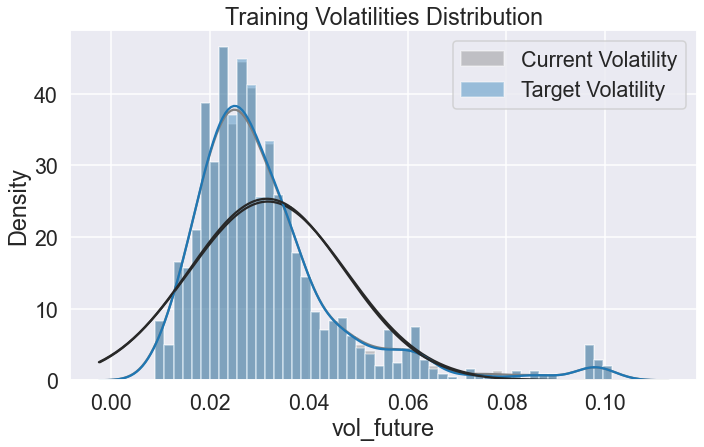

In [123]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.distplot(x_train, norm_hist=True, fit=norm, 
                 color='gray', 
                 bins=50, ax=ax, label='Current Volatility')
    sns.distplot(y_train, norm_hist=True, fit=norm,
                 color='tab:blue', 
                 bins=50, ax=ax, label='Target Volatility')
    plt.title('Training Volatilities Distribution')
    plt.legend()
 #   plt.savefig(os.path.join(directory_to_img, "vol_dist.png"), 
 #               dpi=300, bbox_inches='tight')
    plt.show();

In [124]:
def transform_volatility_to_scaler(scaler, tf_series):
    '''
    Transform a series to a fitted scaler
    '''
    idx = tf_series.index
    output = pd.Series(scaler.transform(tf_series.values.reshape(-1,1))[:,0],
                       index=idx)
    return output

In [125]:
# INITIATE SCALER
scaler_vol = MinMaxScaler()

# FIT SCALER TO CURRENT VOLATILITY IN TRAINING SET
scaler_vol = scaler_vol.fit(x_train.values.reshape(-1,1))

In [126]:
# TRANSFORM TRAINING CURRENT & FUTURE VOLATILITIES 
x_train_scaled = transform_volatility_to_scaler(scaler_vol, x_train)   # x_train: volatility current
y_train_scaled = transform_volatility_to_scaler(scaler_vol, y_train)   # y_train: volatility future

# TRANSFORMING VALIDATION CURRENT & FUTURE VOLATILITIES
x_val_scaled = transform_volatility_to_scaler(scaler_vol, x_val)
y_val_scaled = transform_volatility_to_scaler(scaler_vol, y_val)

# TRANSFORMING TEST CURRENT & FUTURE VOLATILITIES
x_test_scaled = transform_volatility_to_scaler(scaler_vol, x_test)
y_test_scaled = transform_volatility_to_scaler(scaler_vol, y_test)

In [127]:
x_train.head()

Open Time
2017-08-13    0.078095
2017-08-14    0.078144
2017-08-15    0.077351
2017-08-16    0.076483
2017-08-17    0.066087
Name: vol_current, dtype: float64

In [128]:
y_train.head(10)

Open Time
2017-08-13    0.051131
2017-08-14    0.054961
2017-08-15    0.055598
2017-08-16    0.055595
2017-08-17    0.055176
2017-08-18    0.055257
2017-08-19    0.054956
2017-08-20    0.051158
2017-08-21    0.047952
2017-08-22    0.045944
Name: vol_future, dtype: float64

In [129]:
x_train_scaled.head(10)

Open Time
2017-08-13    0.748292
2017-08-14    0.748818
2017-08-15    0.740242
2017-08-16    0.730862
2017-08-17    0.618439
2017-08-18    0.473268
2017-08-19    0.453953
2017-08-20    0.456692
2017-08-21    0.498109
2017-08-22    0.505003
dtype: float64

In [130]:
y_train_scaled.head(35)

Open Time
2017-08-13    0.456692
2017-08-14    0.498109
2017-08-15    0.505003
2017-08-16    0.504967
2017-08-17    0.500435
2017-08-18    0.501316
2017-08-19    0.498055
2017-08-20    0.456983
2017-08-21    0.422318
2017-08-22    0.400599
2017-08-23    0.400241
2017-08-24    0.313339
2017-08-25    0.305661
2017-08-26    0.320363
2017-08-27    0.315541
2017-08-28    0.338024
2017-08-29    0.337477
2017-08-30    0.338411
2017-08-31    0.328219
2017-09-01    0.326890
2017-09-02    0.325738
2017-09-03    0.325589
2017-09-04    0.309505
2017-09-05    0.274251
2017-09-06    0.266079
2017-09-07    0.271748
2017-09-08    0.272250
2017-09-09    0.273297
2017-09-10    0.274994
2017-09-11    0.284013
2017-09-12    0.279415
2017-09-13    0.209755
2017-09-14    0.199761
2017-09-15    0.202839
2017-09-16    0.207583
dtype: float64

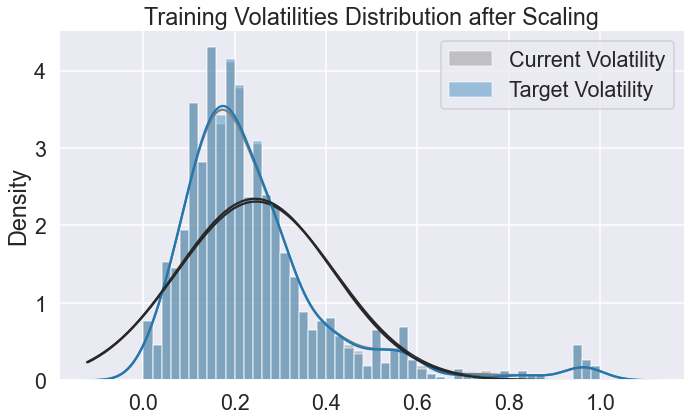

In [131]:
# PLOTTING VOLATILITIES AFTER SCALING
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.distplot(x_train_scaled, norm_hist=True, fit=norm, 
                 color='gray', 
                 bins=50, ax=ax, label='Current Volatility')
    sns.distplot(y_train_scaled, norm_hist=True, fit=norm,
                 color='tab:blue', 
                 bins=50, ax=ax, label='Target Volatility')
    plt.title('Training Volatilities Distribution after Scaling')
    plt.legend()

    plt.show();


# 2. Train-Validation-Test Visualization
0. <a href='#0.-Index'>Back-to-top</a>

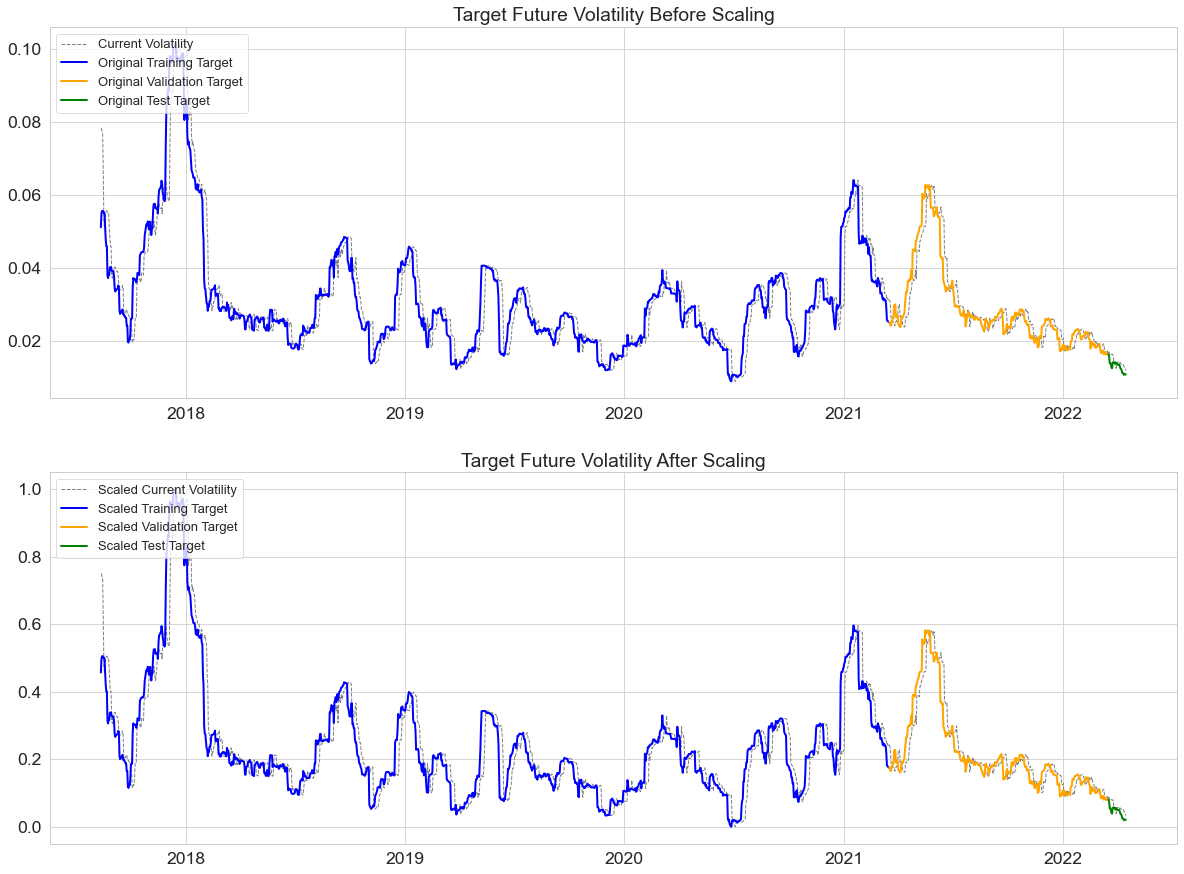

In [132]:
sns.set_context("paper", font_scale=2)

# VISUALIZE TRAIN/VALIDATION/TEST vol_future BEFORE & AFTER TRAINING
with sns.axes_style("whitegrid"):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,14))

    ax1.plot(df_hdt.vol_current, lw=1, color='gray', ls='--',
                label='Current Volatility')
    
    ax1.plot(y_train, color='blue', label='Original Training Target', lw=2)
    ax1.plot(y_val, color='orange', label='Original Validation Target', lw=2)
    ax1.plot(y_test, color='green', label='Original Test Target', lw=2)

    ax1.title.set_text('Target Future Volatility Before Scaling')

    ax2.plot(transform_volatility_to_scaler(scaler_vol, df_hdt.vol_current), 
                lw=1, color='gray', ls='--',
                label='Scaled Current Volatility')
    ax2.plot(y_train_scaled, color='blue', label='Scaled Training Target', lw=2)
    ax2.plot(y_val_scaled, color='orange', label='Scaled Validation Target', lw=2)
    ax2.plot(y_test_scaled, color='green', label='Scaled Test Target', lw=2)

    ax2.title.set_text('Target Future Volatility After Scaling')

    ax1.legend(loc='upper left', prop={'size': 13}, frameon=True)
    ax2.legend(loc='upper left', prop={'size': 13}, frameon=True)
#    plt.savefig(os.path.join(directory_to_img, 'train_val_test_org_scled.png'), 
#                dpi=300, bbox_inches='tight')
    plt.show();

One of the most obvious difference between the 2 plots is the y-axis. After scaling, volatilities raise out of  the range of [0,1.0] instead of [0, 0.10] as before.

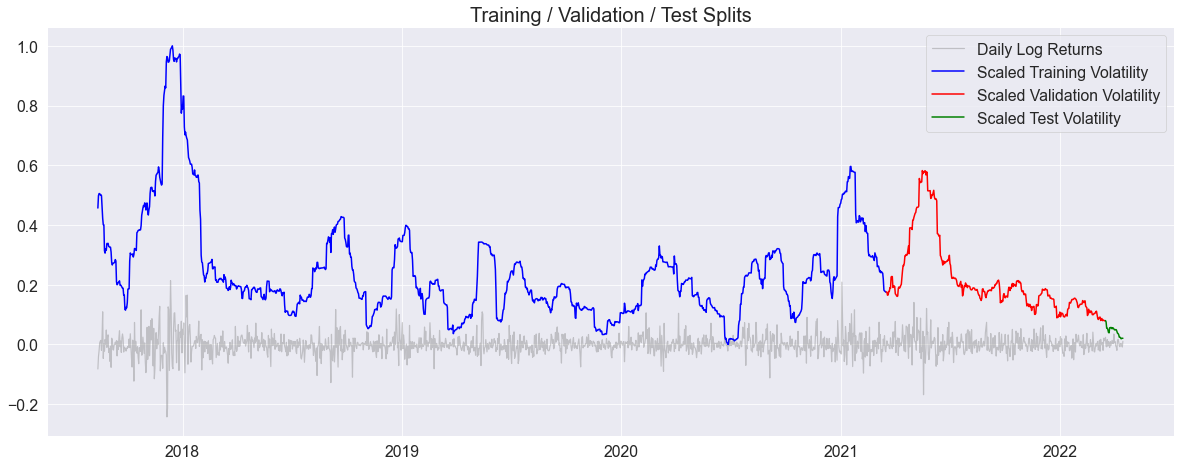

In [133]:
sns.set_context("paper", font_scale=1.8)
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(18,7))

    plt.plot(df_hdt.log_returns, color='gray', label='Daily Log Returns', alpha=0.4)

    plt.plot(y_train_scaled, color='blue', 
             label='Scaled Training Volatility', lw=1.5)
    plt.plot(y_val_scaled, color='red', 
             label='Scaled Validation Volatility', lw=1.5)
    plt.plot(y_test_scaled, color='green', 
             label='Scaled Test Volatility', lw=1.5)

    plt.plot()
    plt.title('Training / Validation / Test Splits', fontsize=20)
    plt.legend(frameon=True)
#    plt.savefig(os.path.join(directory_to_img, 'train_val_test.png'), 
#                dpi=300, bbox_inches='tight')
    plt.show();

# Baseline Models
0. <a href='#0.-Index'>Back-to-top</a>



# 1. Mean Baseline

A baseline in forecast performance provides a point of comparison. It is a point of reference for all other modelling techniques on your problem. If a model achieves performance at or below the baseline, the technique should be fixed or abandoned.

One of the essential characteristics of Volatility is it's mean-revert over the long term. Therfore my first baseline model this would be a very simple one that only outputs the average current realized volatility of the whole training set as predictions everything.

<a href='#Inputs'>Inputs</a>

In [134]:
# SPLIT CURRENT DAILY REALIZED VOLATILITY INTO 3 PARTS 
# (this would be the input for baseline, random walk, and NN models)
x_train = df_hdt.vol_current[train_idx]
x_val = df_hdt.vol_current[val_idx]
x_test = df_hdt.vol_current[test_idx]

In [135]:
# CALCULATE THE MEAN OF SCALED TRAINING DATA
mean_train_vol = x_train_scaled.mean()
mean_train_vol

0.24648880208913826

In [136]:
# CREATE SERIES OF PREDICTIONS FOR BASELINE MODEL ON VALIDATION SET
baseline_preds = np.ones(len(val_idx)) * mean_train_vol
baseline_preds = pd.Series(baseline_preds, index=lr_val.index)
baseline_preds


Open Time
2021-03-18    0.246489
2021-03-19    0.246489
2021-03-20    0.246489
2021-03-21    0.246489
2021-03-22    0.246489
                ...   
2022-03-13    0.246489
2022-03-14    0.246489
2022-03-15    0.246489
2022-03-16    0.246489
2022-03-17    0.246489
Length: 365, dtype: float64

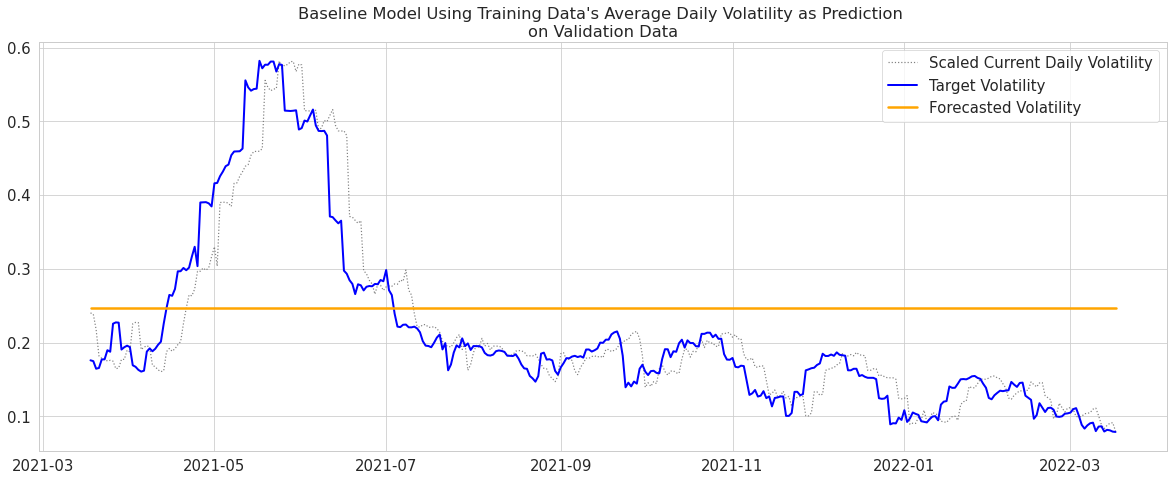

In [137]:
viz_model(y_val_scaled, baseline_preds, 
          f"Baseline Model Using Training Data's Average Daily Volatility as Prediction")

plt.show();

In [138]:
log_perf(y_val_scaled, baseline_preds, 'Mean Baseline')

Model  Validation RMSPE  Validation RMSE
0  Mean Baseline          0.755965              NaN

In [139]:
df_hdt.tail()

Open      High       Low     Close      Volume  \
Open Time                                                        
2022-04-12  0.075379  0.076000  0.074971  0.075545  91115.3037   
2022-04-13  0.075546  0.076350  0.074917  0.075789  82612.9303   
2022-04-14  0.075789  0.075940  0.074870  0.075657  70006.6192   
2022-04-15  0.075658  0.075775  0.074769  0.074984  52006.0891   
2022-04-16  0.074984  0.075890  0.074904  0.075762  37649.6991   

                     Close Time  Quote Asset Volume  No. of Treades  \
Open Time                                                             
2022-04-12  1649807999999000064         6876.850214          152289   
2022-04-13  1649894399999000064         6253.871680          137361   
2022-04-14  1649980799999000064         5277.187151          101869   
2022-04-15  1650067199999000064         3912.928297           76665   
2022-04-16  1650153599999000064         2834.120089           59436   

            TB Based Volume  TB Quote Volume  Ignore   returns  log_returns  \
Open Time                                                                     
2022-04-12       45772.3935      3454.472049     0.0  0.220220     0.002200   
2022-04-13       41342.4860      3129.664738     0.0  0.322986     0.003225   
2022-04-14       35404.8675      2668.971074     0.0 -0.174168    -0.001743   
2022-04-15       25190.7843      1895.426802     0.0 -0.889541    -0.008935   
2022-04-16       19572.4027      1473.547616     0.0  1.037555     0.010322   

            vol_current  vol_future  
Open Time                            
2022-04-12     0.013444    0.011022  
2022-04-13     0.012941    0.010642  
2022-04-14     0.012363    0.010727  
2022-04-15     0.012261    0.010798  
2022-04-16     0.011926    0.010806

# 2. Random Walk Naive Forecasting
0. <a href='#0.-Index'>Back-to-top</a>

A commonly known fact about volatility is that it tends to be autocorrelated, and clusters in the short-term. This property can be used to implement a naive model that just "predicts" future volatility by using whatever the daily volatility was at the immediate previous time step.

In this case, I'll use the average daily volatility of the most recent INTERVAL_WINDOW as predictions for the next 7 days, which is essentially using vol_current at time step t and prediction for vol_future at time step t.

One of the simplest and yet most important models in time series forecasting is the random walk model. This model assumes that in each period the variable takes a random step away from its previous value, and the steps are independently and identically distributed in size (“i.i.d.”). This is equivalent to saying that the first difference of the variable is a series to which the mean model should be applied.

In other words, it predicts that all future values will equal the last observed value. This doesn’t really mean you expect them to all be the same, but just that you think they are equally likely to be higher or lower, and you are staying on the fence as far as point predictions are concerned.
Because of this, this method is usually known as __naive method__.


In [140]:
# USING THE PREVIOUS n_future DAY'S VOLATILITY
random_walk_preds = x_val_scaled

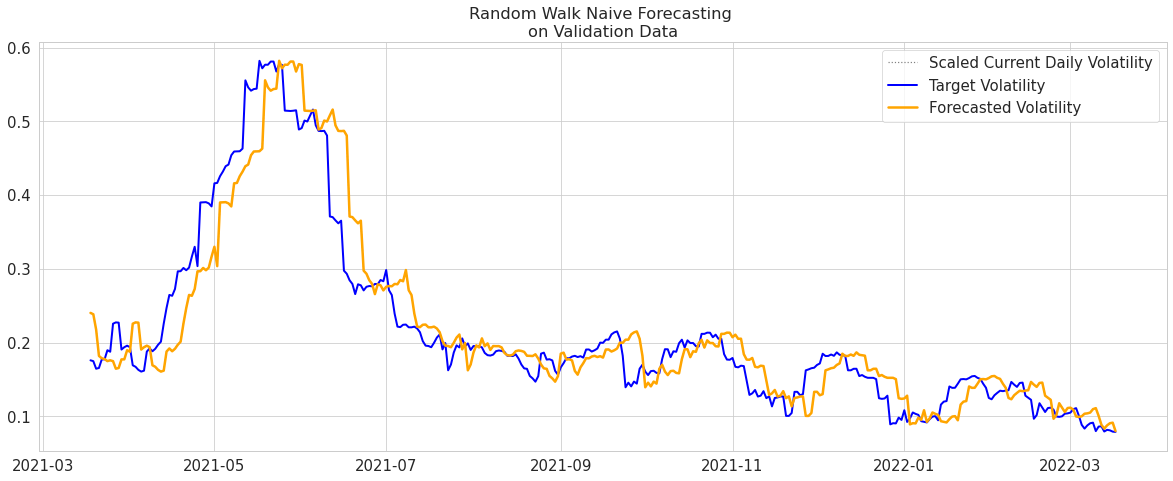

In [141]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, random_walk_preds, 'Random Walk Naive Forecasting')
#plt.savefig(os.path.join(directory_to_img, 'naive.jpg'), 
    #        dpi=300, bbox_inches='tight')
plt.show();

In [142]:

# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, random_walk_preds, 'Random Walk Naive Forecasting')

Model  Validation RMSPE  Validation RMSE
0                  Mean Baseline          0.755965              NaN
1  Random Walk Naive Forecasting          0.192098              NaN

So the both error mertrics have gone down by a decent amount. Naive forecasting in time series is sometimes surprisingly difficult to outperform.

# GARCH Models
0. <a href='#0.-Index'>Back-to-top</a>

(Reference: http://users.metu.edu.tr/ozancan/ARCHGARCHTutorial.html)

GARCH stands for __Generalized Autoregressive Conditional Heteroskedasticity__, which is an extension of the ARCH model __(Autoregressive Conditional Heteroskedasticity)__.

GARCH includes lag variance terms with lag residual errors from a mean process, and is the traditional econometric approach to volatility prediction of financial time series.

Mathematically, GARCH can be represented as follows:


$\sigma_t^2=\omega+\sum_{i=1}^{q}{\alpha_i\epsilon_{t-i}^2}+\sum_{j=1}^{p}{\beta_j\sigma_{t-j}^2}$

in which $σ_t^2$  is variance at time step t and $ϵ_(t-ⅈ)^2$ is the model residuals at time step t-1

Generalized autoregressive conditional heteroskedasticity (GARCH) models aim to model the conditional volatility of a time series. Let rt be the dependent variable, for example the returns of a stock in time t. We can model this series as:

$r_t=μ+σ_tϵ_t$

Here mu is the expected value of $r_t$, $σ_t$ is the standard deviation of $r_t$ in time t, and $ϵ_t$ is an error term for time t.

## 1. Basic GARCH
0. <a href='#0.-Index'>Back-to-top</a>

In [143]:
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

In [144]:
tckr='ETH-BTC'

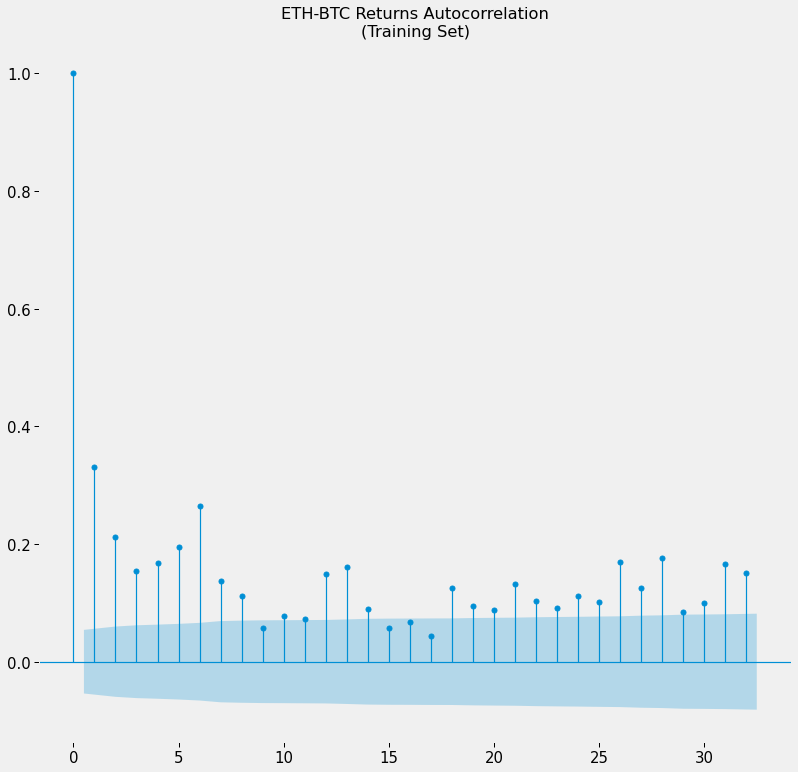

In [145]:
# VISUALIZE AUTOCORRELATION OF SQUARED RETURNS

plot_acf(r_train**2,title=f'{tckr.upper()} Returns Autocorrelation\n(Training Set)');

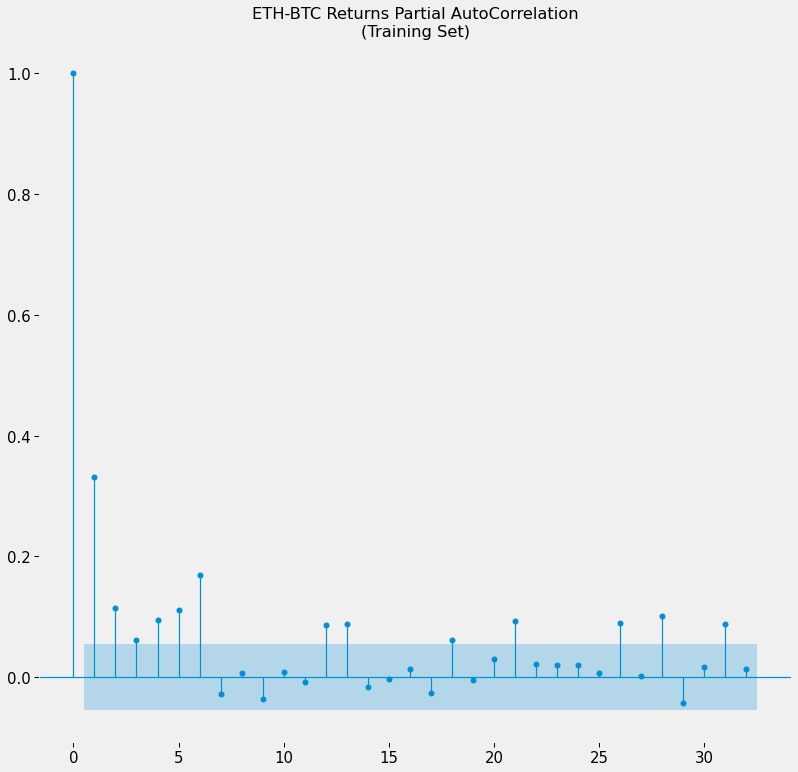

In [146]:
# VISUALIZE PARTIAL AUTOCORRELATION OF SQUARED RETURNS
plot_pacf(r_train**2, 
          title=f'{tckr.upper()} Returns Partial AutoCorrelation\n(Training Set)');



GARCH models are trained on percent returns. 

(One of the reasons I decided to normalize the volatilities across the board is because I am still not 100% sure which timescale GARCH conditional volatility is calculated in (likely daily)

In [147]:
from arch import arch_model

# GARCH(1,2)
0. <a href='#0.-Index'>Back-to-top</a>

In [148]:
# SET SEED FOR REPRODUCIBILITY


gm_1 = arch_model(r_train, p=1, q=2)
result_1 = gm_1.fit(disp='off')
print()
print(result_1.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3314.51
Distribution:                  Normal   AIC:                           6639.03
Method:            Maximum Likelihood   BIC:                           6664.93
                                        No. Observations:                 1313
Date:                Sat, Apr 23 2022   Df Residuals:                     1312
Time:                        14:37:13   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0578  7.749e-02     -0.746      0.456 [ -0.210


Using a significance level of 0.05, none of the coefficients seems to be statistically significant (because their p-values P > |t| are all greater than 0.05). Therefore, I'll reduce the values of p and q to 1 to see if that helps.

# GARCH(2,1)
0. <a href='#0.-Index'>Back-to-top</a>

In [149]:
gm_1 = arch_model(r_train, vol='GARCH', p=2, q=1)
result_1 = gm_1.fit(disp='off')
print()
print(result_1.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3316.10
Distribution:                  Normal   AIC:                           6642.19
Method:            Maximum Likelihood   BIC:                           6668.10
                                        No. Observations:                 1313
Date:                Sat, Apr 23 2022   Df Residuals:                     1312
Time:                        14:37:13   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0586  7.706e-02     -0.760      0.447 [ -0.210

# GARCH(1,1)
0. <a href='#0.-Index'>Back-to-top</a>

GARCH(1,1) only contains first-order lagged terms and the mathematic equation for it is:

$\sigma_t^2=\omega+\alpha\epsilon_{\left(t-1\right)}^2+\beta\sigma_{\left(t-1\right)}^2$

where α, β and ω sum up to 1, and ω is the long-term variance.
GARCH is generally regarded as an insightful improvement on naively assuming future volatility will be like the past, but also considered widely overrated as predictor by some experts in the field of volatility. GARCH models capture the essential characteristics of volatility: volatility tomorrow will be close to what it is today (clustering), and volatility in the long term will probably mean revert (meaning it'd be close to whatever the historical long-term average has been)


In [150]:
gm_1 = arch_model(r_train, vol='GARCH', p=1, q=1)
result_1 = gm_1.fit(disp='off')
print()
print(result_1.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3316.10
Distribution:                  Normal   AIC:                           6640.19
Method:            Maximum Likelihood   BIC:                           6660.92
                                        No. Observations:                 1313
Date:                Sat, Apr 23 2022   Df Residuals:                     1312
Time:                        14:37:13   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0586  7.710e-02     -0.760      0.447 [ -0.210

All coefficients look statistically significant now.

After being fitted to the training data (percent returns), the GARCH model forecast contains an estimated conditional volatility attribute for the training portion of the time series. I am going to fit - transform the scaler to the training data's conditional volatility arrays, and then plot it out to compare it with the realized volatility calculated above (also scaled) x_train_scaled.

In [151]:
def scale_tf_cond_vol(model_result):
    '''
    Scale & Transform Conditional Volatility 
    Estimated by GARCH Models
    '''
    # OBTAIN ESTIMATED CONDITIONAL VOLATILITY FROM MODEL RESULT
    cond_vol = model_result.conditional_volatility

    # INITIATE SCALER
    scaler = MinMaxScaler()

    # FIT SCALER TO MODEL'S ESTIMATED CONDITIONAL VOLATILITY
    scaler = scaler.fit(cond_vol.values.reshape(-1,1))

    scaled_cond_vol = transform_volatility_to_scaler(scaler, cond_vol)
    return scaler, scaled_cond_vol

In [152]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_garch, scaled_cond_vol = scale_tf_cond_vol(result_1)


In [153]:
# VISUALIZE MODEL'S ESTIMATED CONDITIONAL VOLATILITY 
# WITH SCALED vol_current CALCULATED ABOVE
def viz_cond_vol(cond_vol_series, model_name):
    with sns.axes_style("darkgrid"):
        fig, ax = plt.subplots(figsize=(18,7))

        ax.plot(x_train_scaled, color='blue', lw=2,
                label=f'Scaled {INTERVAL_WINDOW}-Day Interval Daily Realized Volatility')
        ax.plot(cond_vol_series, color='orange', lw=2,
                label=f'Scaled {model_name} Estimated Conditional Volatility')
        ax.set_title('Scalled Training Set')
        plt.legend()
        plt.show();

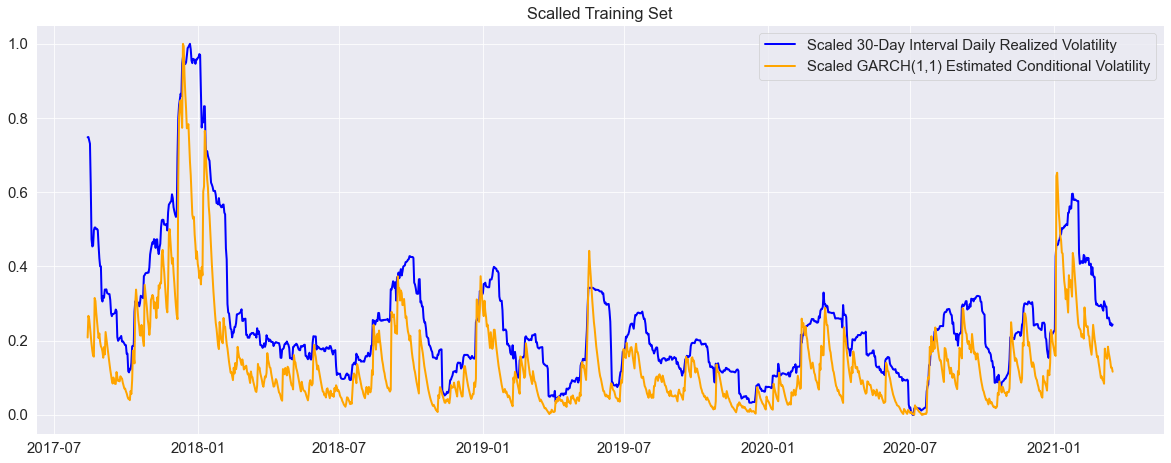

In [154]:
viz_cond_vol(scaled_cond_vol, 'GARCH(1,1)')

## Analytical-based Forecasting
0. <a href='#0.-Index'>Back-to-top</a>

(Source: https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_forecasting.html)

I am implementing rolling one-step forecasting here by refitting the model to ALL the datapoints available up to a certain time step before generating prediction for the next n_future days. For example, to make prediction on vol_future at time step t, I would fit the model to all the returns available up to time step t and then obtain the average forecasted volatility for a horizon of n_future = 7.

btc_vol_viz%20-%20expanding_page-0001.jpg

The volatility forecasts from the GARCH models using percent returns as input are on a totally different scale compared to the volatilities calculated from log returns. Therefore I am going to normalize the forecasted volatility based on the model's conditional_volatility output from the training data, and only comparing the scaled versions of volatilities on the Validation set.

In [155]:
# ONE STEP EXPANDING WINDOW FORECAST
# INITIALIZING rolling_forecast
rolling_forecasts = []
idx = df_hdt.index

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df_hdt.returns[:idx]
    
    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, vol='GARCH', p=1, q=1,
                       dist='normal')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False).variance.values
    # GET THE SQRT OF AVERAGE n_future DAYS VARIANCE
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

gm_1_preds = pd.Series(rolling_forecasts, index=val_idx)

In [156]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
gm_1_preds_scaled = transform_volatility_to_scaler(scaler_garch, gm_1_preds)

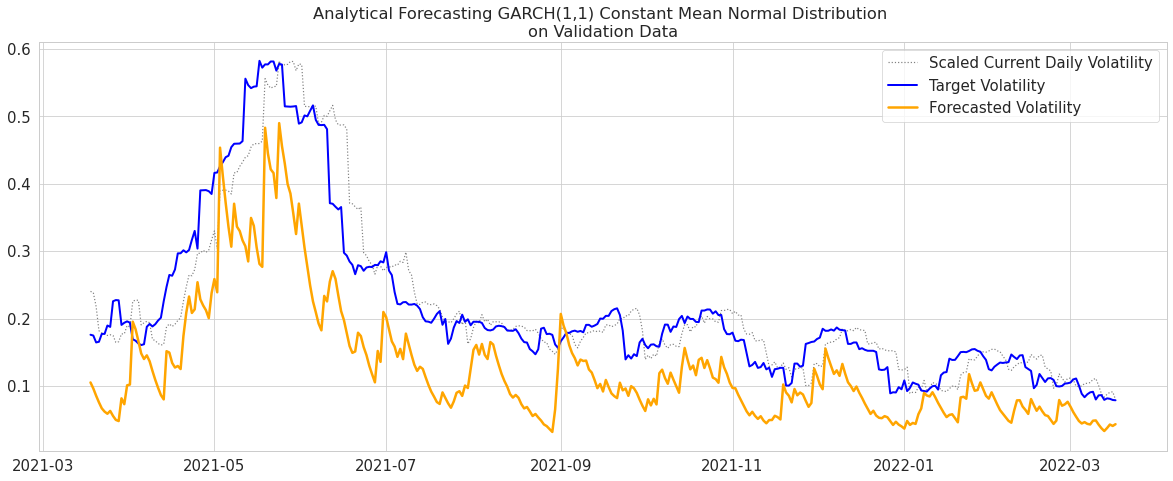

In [157]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, gm_1_preds_scaled, 
          'Analytical Forecasting GARCH(1,1) Constant Mean Normal Distribution')

So 7-day horizon forecasting into the future is still lagging behind compared to target values. Similar to the training volatilities comparison above, GARCH's forecasted volatility appears to be lower side (after normalization).

In [158]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, gm_1_preds_scaled, 
         'GARCH(1,1), Constant Mean, Normal Dist')

Model  Validation RMSPE  Validation RMSE
0                           Mean Baseline          0.755965              NaN
1           Random Walk Naive Forecasting          0.192098              NaN
2  GARCH(1,1), Constant Mean, Normal Dist          0.451188          0.29451

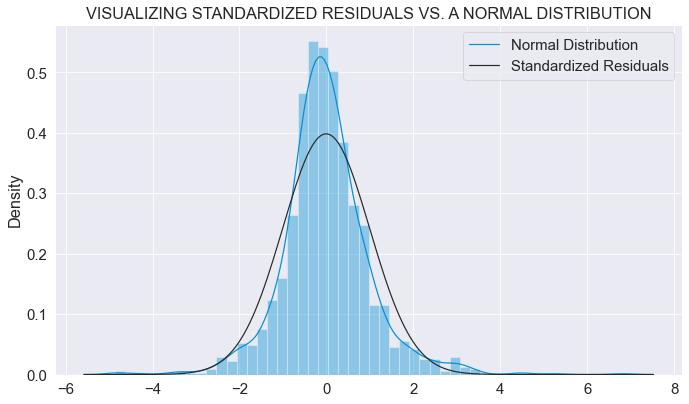

In [159]:
# INSPECTING THE RESIDUALS
gm_resid = result_1.resid
gm_std = result_1.conditional_volatility

# STANDARDIZING RESIDUALS
gm_std_resid = gm_resid / gm_std

# VISUALIZING STANDARDIZED RESIDUALS VS. A NORMAL DISTRIBUTION
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,6))
    sns.distplot(gm_std_resid, norm_hist=True, fit=norm, bins=50)
    plt.legend(('Normal Distribution', 'Standardized Residuals'))
    plt.title('VISUALIZING STANDARDIZED RESIDUALS VS. A NORMAL DISTRIBUTION')
    plt.show();

(Reference: https://goldinlocks.github.io/ARCH_GARCH-Volatility-Forecasting/)

By default, basic GARCH is based on some assumptions that the residuals and the mean return are both normally distributed. However, more often than not, financial time series data does not follow a normal distribution, and it's more likely to observe extreme positive and negative values that are far away from the mean.

Fortunately, there're certain parameters that can be specified in the arch_model library to make it more representative of real financial data:

'dist' can be set to t for Student's T or skewt for skewed Student's T distribution (Student's T distribution is also symmetric and bell-shaped like normal distribution; however it has higher peak and fatter tails allowing more values lying further away from the mean).
Looking at the plot above of the standardized residuals, I think I can try skewed Student's T for the next fit.



# 2. GARCH Model with Asymmetric Shocks Responses
0. <a href='#0.-Index'>Back-to-top</a>


The basic GARCH model assumes positive and negative news have similar impact on volatility. However, in reality the market tends to "take the stairs up and the elevator down". In other words, the impact is usually asymmetric, and negative impacts tends to affect the volatility more than positive ones.

There's another member in the GARCH family that accounts for assymmetry of shocks reponses called __GJR-GARCH (Glosten-Jagannathan-Runkle GARCH).__

Additional inputs can be used to construct other models. In this case, by setting o to 1, which means the model would include one lag of an asymmetric shock which transforms a GARCH model into a GJR-GARCH model with variance dynamics.

 GJR-GARCH(p, q, r) is defined as follows:
$y_t=\mu_t+e_t$ ,

$e_t=\sigma_t\varepsilon_t$ ,

$\sigma_t^2=\alpha_0+\sum_{i=1}^{p}{\alpha_ie_{t-i}^2}+\sum_{j=1}^{q}{\beta_j\sigma_{t-j}^2}+\sum_{k=1}^{r}{\gamma_ke_{t-k}^2}I_{t-k}\ ,\ \ $  ,  
   	
where $γ_k$ are leverage coefficients and I_t is indicator function. Observe that for  γ_k>0 negative innovations e_t give additional value to volatility $σ_t^2$ thus we achieve adjustment for asymmetric impact on volatility as discussed at the beginning of the article. For $γ_k=0$ we get GARCH(m = p, n = q) model and for $γ_k<0$ we get exotic result where upward swings in return or price have stronger impact on volatility than the downward moves. Need to mention that in most implementations of GJR-GARCH we will find GJR-GARCH(p,q) where leverage order o is automatically considered equal to order p. Parameter’s constraints are again very similar as for GARCH, 

we have

$\alpha_0=0,$

$\alpha_i\geq0,$

$\beta_j\geq0,$

$\alpha_i+\gamma_k\geq0,$

$\sum_{i=1}^{p}\alpha_i+\sum_{j=1}^{q}\beta_j+\frac{1}{2}\sum_{k=1}^{r}\gamma_k<1\cdot\ $


In [160]:
# SET SEED FOR REPRODUCIBILITY
#np.random.seed(seed)

gjr_gm = arch_model(r_train, p=1, q=1, o=1, 
                    vol='GARCH', dist='skewt')
result_2 = gjr_gm.fit(disp='off')
print(result_2.summary())

                         Constant Mean - GJR-GARCH Model Results                         
Dep. Variable:                           returns   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             GJR-GARCH   Log-Likelihood:               -3199.09
Distribution:      Standardized Skew Student's t   AIC:                           6412.17
Method:                       Maximum Likelihood   BIC:                           6448.43
                                                   No. Observations:                 1313
Date:                           Sat, Apr 23 2022   Df Residuals:                     1312
Time:                                   14:37:30   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------

In [161]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_gjr, scaled_gjr_cond_vol = scale_tf_cond_vol(result_2)


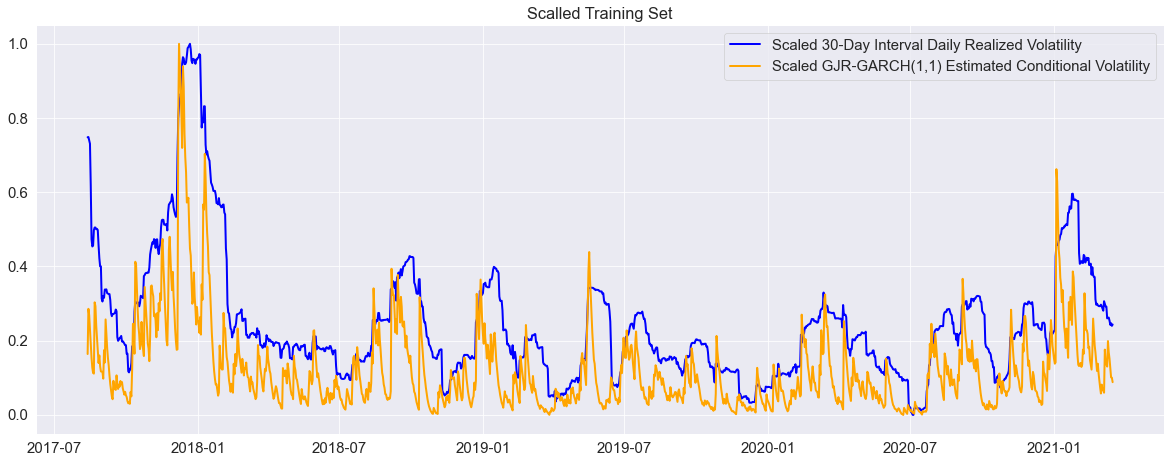

In [162]:
viz_cond_vol(scaled_gjr_cond_vol, 'GJR-GARCH(1,1)')


In [163]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df_hdt.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, q=1, o=1, 
                       vol='GARCH', dist='skewt')
    model_fit = model.fit(disp='off')

    
    # MAKE PREDICTION n_future DAYS OUT
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False).variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

    
gjr_1_preds = pd.DataFrame(rolling_forecasts, index=val_idx)

In [164]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
gjr_1_preds_scaled = transform_volatility_to_scaler(scaler_gjr, gjr_1_preds)

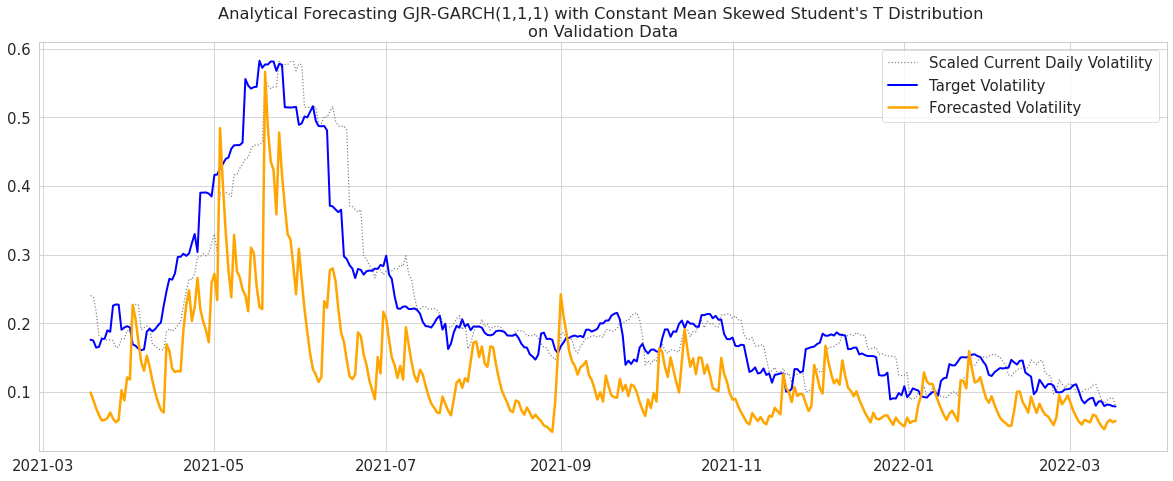

In [165]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, gjr_1_preds_scaled, 
          "Analytical Forecasting GJR-GARCH(1,1,1) with Constant Mean Skewed Student's T Distribution")



In [166]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, gjr_1_preds_scaled, 
         "Analytical GJR-GARCH(1,1,1), Constant Mean, skewt Dist")

Model  Validation RMSPE  \
0                                      Mean Baseline          0.755965   
1                      Random Walk Naive Forecasting          0.192098   
2             GARCH(1,1), Constant Mean, Normal Dist          0.451188   
3  Analytical GJR-GARCH(1,1,1), Constant Mean, sk...          0.433131   

   Validation RMSE  
0              NaN  
1              NaN  
2         0.294510  
3         0.293602

Compared to GARCH(1,1) with Normal Distribution setting, GJR-GARCH with Skewed Student's T forecasts have moved up quite a bit and shortened the gap between target values and model's predictions. This is also reflected in an improvement in both Validation RMSPE and RMSE.

Unfortunately I still haven't been able to get close to Naive Forecasting.

# 3. TARCH
0. <a href='#0.-Index'>Back-to-top</a>


(Reference: https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_modeling.html#Specifying-Common-Models)

There's another member in the GARCH family called TARCH, which is short for Threshold Autoregressive Conditional Heteroskedasticity (and also known as ZARCH). TARCH models the volatility using absolute values (instead of squares). This model is specified using power=1.0 since the default power, 2.0, corresponds to variance processes that evolve in squares. In addition, asymmetric impact is also incorporated into the GARCH framework by using a dummy variable

The volatility process in a TARCH(1,1) model is given by:

$\sigma_t=\omega+\alpha\left|\epsilon_{t-1}\right|+\gamma\left|\epsilon_{t-1}\right|I_{\left[\epsilon_{t-1}<0\right]}+\beta\sigma_{t-1}$

In [167]:
# SET SEED FOR REPRODUCIBILITY
#np.random.seed(seed)

t_gm = arch_model(r_train, p=1, o=1, q=1, power=1.0,
                  dist='skewt')
result_3 = t_gm.fit(disp='off')
print(result_3.summary())

                        Constant Mean - TARCH/ZARCH Model Results                        
Dep. Variable:                           returns   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           TARCH/ZARCH   Log-Likelihood:               -3197.19
Distribution:      Standardized Skew Student's t   AIC:                           6408.37
Method:                       Maximum Likelihood   BIC:                           6444.63
                                                   No. Observations:                 1313
Date:                           Sat, Apr 23 2022   Df Residuals:                     1312
Time:                                   14:38:34   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
--------------------------------------------

Log-likelihood and AIC/BIC are quite similar to the GJR-GARCH model. Next I'll inspect the estimated conditional volatility compared to the scaled vol_current.

In [168]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_tarch, scaled_tarch_cond_vol = scale_tf_cond_vol(result_3)

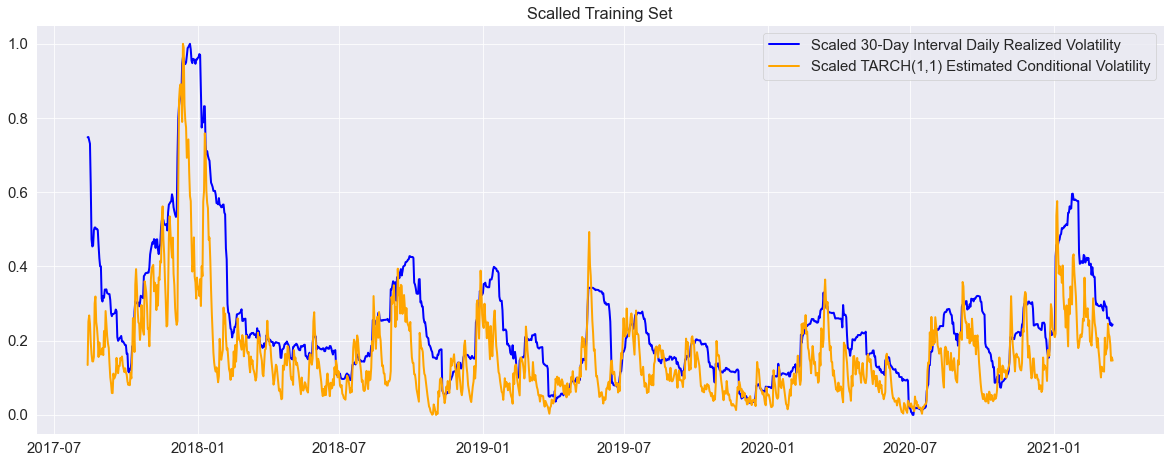

In [169]:
viz_cond_vol(scaled_tarch_cond_vol, 'TARCH(1,1)')

# Simulation-based Forecasting for TARCH(1,1)
0. <a href='#0.-Index'>Back-to-top</a>


Simulation-based forecasts use the model random number generator to simulate draws of the standardized residuals, et+h. These are used to generate a pre-specified number of paths of the variances which are then averaged to produce the forecasts. In models like GARCH which evolve in the squares of the residuals, there are few advantages to simulation-based forecasting. These methods are more valuable when producing multi-step forecasts from models that do not have closed form multi-step forecasts such as EGARCH models.
Assume there are B simulated paths. A single simulated path is generated using:

$\sigma_{t+h,b}^2=\omega+\alpha\epsilon_{t+h-1,b}^2+\beta\sigma_{t+h-1,b}^2$

$\epsilon_{t+h,b}=e_{t+h,b\ }\sqrt{\sigma_{t+h,b}^2}$

 
where the simulated shocks are $et+1,b,et+2,b,…,et+h,b , et+1,b,et+2,b,…,et+h,b$ where b is included to indicate that the simulations are independent across paths. Note that the first residual, ϵt, is in-sample and so is not simulated.


In [170]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df_hdt.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, o=1, q=1, power=1.0,
                       dist='skewt')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    # USING SIMULATION METHOD
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False,
                             method='simulation').variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

t_sm_preds = pd.DataFrame(rolling_forecasts, index=val_idx)

In [171]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
t_sm_preds_scaled = transform_volatility_to_scaler(scaler_tarch, t_sm_preds)


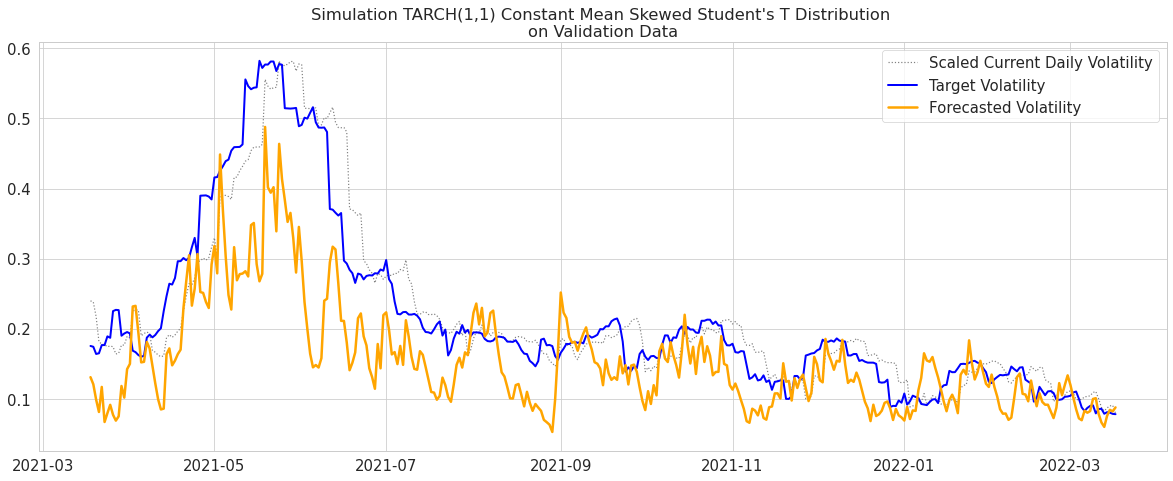

In [172]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, t_sm_preds_scaled, 
          "Simulation TARCH(1,1) Constant Mean Skewed Student's T Distribution")



In [173]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, t_sm_preds_scaled, 
         "Simulation TARCH(1,1), Constant Mean, skewt Distribution")


Model  Validation RMSPE  \
0                                      Mean Baseline          0.755965   
1                      Random Walk Naive Forecasting          0.192098   
2             GARCH(1,1), Constant Mean, Normal Dist          0.451188   
3  Analytical GJR-GARCH(1,1,1), Constant Mean, sk...          0.433131   
4  Simulation TARCH(1,1), Constant Mean, skewt Di...          0.326059   

   Validation RMSE  
0              NaN  
1              NaN  
2         0.294510  
3         0.293602  
4         0.242419

## Bootstrap-based Forecasting for TARCH(1,1)
0. <a href='#0.-Index'>Back-to-top</a>

(Reference: https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_forecasting.html#TARCH)

TARCH models do not have closed-form (analytical) forecasts for horizons larger than 1, and so simulation or bootstrapping is required.

Bootstrap-based forecasts are nearly identical to simulation-based forecasts except that the values used to simulate the process are computed from historical data rather than using the assumed distribution of the residuals. Forecasts produced using this method also return an ARCH Model Forecast Simulation containing information about the simulated paths.

In other words

Bootstrap-based forecasts are virtually identical to simulation-based forecasts except that the standardized residuals are generated by the model. These standardized residuals are generated using the observed data and the estimated parameters as
 
The generation scheme is identical to the simulation-based method except that the simulated shocks are drawn (i.i.d., with replacement) from $e ̂_1,e ̂_2,⋯ ,e ̂_t$ . so that only data available at time t are used to simulate the paths.


In [174]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df_hdt.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, o=1, q=1, power=1.0,
                       dist='skewt')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    # USING BOOTSTRAP METHOD
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False,
                             method='bootstrap').variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

t_bs_preds = pd.DataFrame(rolling_forecasts, index=val_idx)



TARCH one-step forecasting seems to produce some convergence issues. I still want to look at the results though.

In [175]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
t_bs_preds_scaled = transform_volatility_to_scaler(scaler_tarch, t_bs_preds)


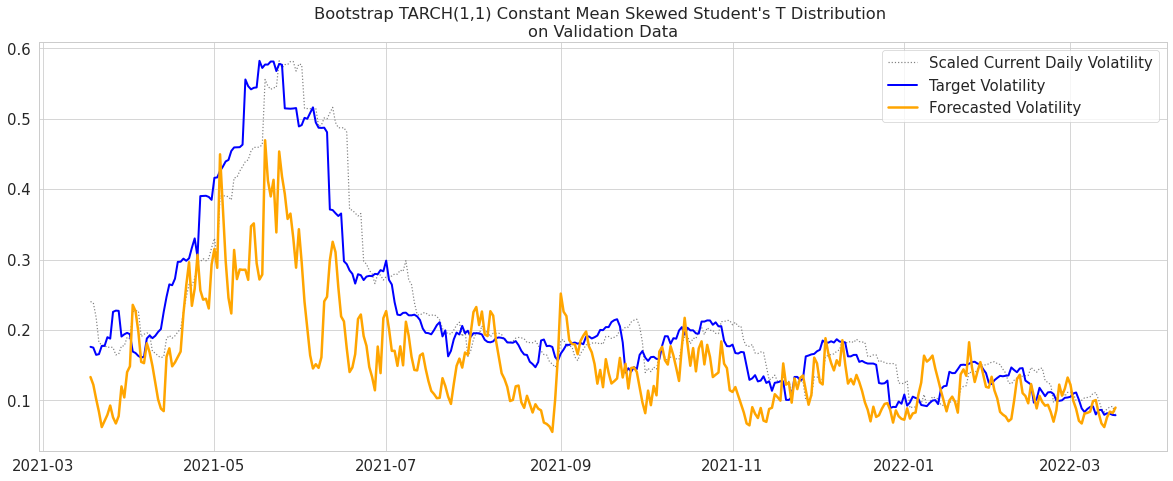

In [176]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, t_bs_preds_scaled, 
          "Bootstrap TARCH(1,1) Constant Mean Skewed Student's T Distribution")



The forecasted volatility does seem to catch up with the target better than all other models did. This is promising...

In [177]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, t_bs_preds_scaled, 
         "Bootstrap TARCH(1,1), Constant Mean, skewt Dist")

Model  Validation RMSPE  \
0                                      Mean Baseline          0.755965   
1                      Random Walk Naive Forecasting          0.192098   
2             GARCH(1,1), Constant Mean, Normal Dist          0.451188   
3  Analytical GJR-GARCH(1,1,1), Constant Mean, sk...          0.433131   
4  Simulation TARCH(1,1), Constant Mean, skewt Di...          0.326059   
5    Bootstrap TARCH(1,1), Constant Mean, skewt Dist          0.328950   

   Validation RMSE  
0              NaN  
1              NaN  
2         0.294510  
3         0.293602  
4         0.242419  
5         0.243787

Bootstrap TARCH(1,1) has managed to achieve a lower Validation RMSPE than Naive Forecasting!!! Even RMSE is only a bit higher, but so far this has been the best model among all GARCH family members that I've found.

Among the 2 forecasting methods, bootstrap seems to perform better on TARCH(1,1). It's probably because bootstrap uses historical data in to compute rather than using the assumed distribution of the residuals.

# Hyperparameter Tuning for TARCH
0. <a href='#0.-Index'>Back-to-top</a>

Next, I'll create a range of values for p, q and o from 0 to 3 (inclusive), and then record each's model's performance on unseen data using RMSPE. Since p cannot take a value of 0, I'll eliminate that from the list of permutations.

In [178]:
import itertools

In [179]:
pqo_s = [p for p in itertools.product(range(3), repeat=3)]
# ELIMINATE PERMUTATIONS WITH p = 0
pqo_s = list(filter(lambda x: x[0] != 0, pqo_s))
# RMSPE ON VALIDATION SET
rmspe_s = []
# LOG LIKELIHOOD
LLH_s = []
# BIC
bic_s = []

for p, q, o in pqo_s:
    # SET SEED FOR REPRODUCIBILITY
    # np.random.seed(seed)

    # FITTING TARCH(p,q,o) MODEL
    t_gm_pqo = arch_model(r_train, p=p, q=q, o=o, power=1.0,
                          dist='skewt')
    t_gm_pqo_fit = t_gm_pqo.fit(disp='off')

    # SCALING CONDITIONAL VOLATILITY OUTPUTS
    sclr = MinMaxScaler()
    cond_vol_arr = t_gm_pqo_fit.conditional_volatility.values.reshape(-1,1)

    # FITTING SCALER TO MODEL'S CONDITIONAL VOLATILITY
    sclr = sclr.fit(cond_vol_arr)

    # INITIALIZING rolling_forecasts VALUES LIST
    rolling_forecasts = []

    # ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
    for i in range(len(r_val)):
        # GET THE DATA AT ALL PREVIOUS TIME STEPS
        idx = val_idx[i]
        train = df_hdt.returns[:idx].dropna()

        # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
        model = arch_model(train, p=p, q=q, o=o, power=1.0,
                          dist='skewt')
        model_fit = model.fit(disp='off')

        # MAKE PREDICTION
        vaR = model_fit.forecast(horizon=n_future, 
                                 reindex=False,
                                 method='bootstrap').variance.values
        pred = np.sqrt(np.mean(vaR))

        # APPEND TO rolling_forecasts LIST
        rolling_forecasts.append(pred)

    # CONVERT PREDICTIONS
    y_preds = pd.Series(rolling_forecasts, index=val_idx)

    # TRANSFORM PREDICTIONS USING FITTED SCALER FOR SPECIFIC p/q/o SET
    y_preds_scaled = transform_volatility_to_scaler(sclr, y_preds)
    
    # APPENDING PERFORMANCE METRICS TO LISTS
    LLH_s.append(t_gm_pqo_fit.loglikelihood)
    bic_s.append(t_gm_pqo_fit.bic)
    rmspe_s.append(RMSPE(y_val_scaled, y_preds_scaled))

In [180]:
# GET THE VALUES OF p/q/o THAT YIELDS LOWEST VALIDATION RMSPE
print(f'Lowest RMSPE is {np.min(rmspe_s)} using TARCH{pqo_s[np.argmin(rmspe_s)]}')


Lowest RMSPE is 0.32700647909816144 using TARCH(1, 2, 1)


In [181]:
best_pqo = pqo_s[np.argmin(rmspe_s)]  

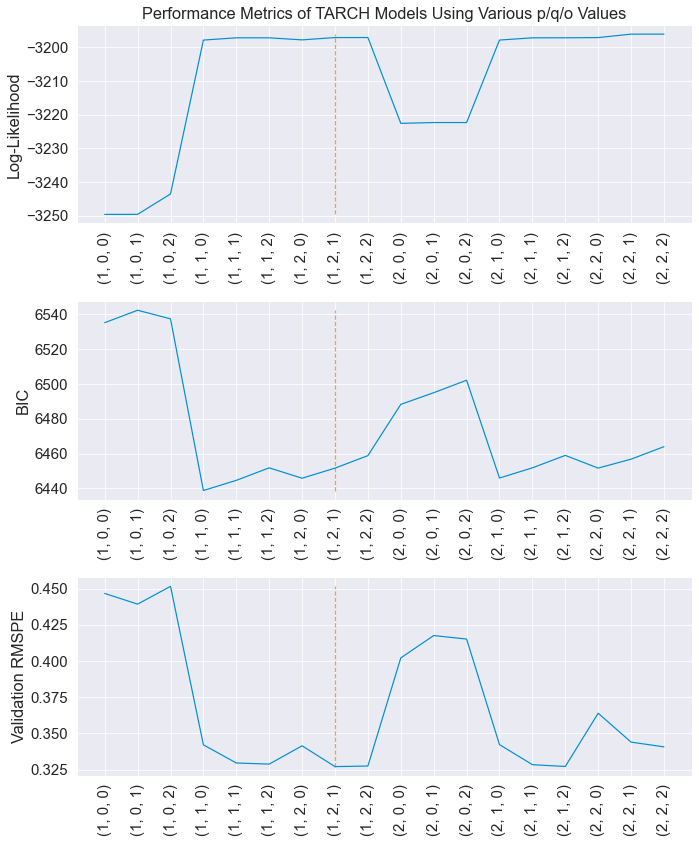

In [182]:
with sns.axes_style("darkgrid"):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,12))
    xlabels = [str(v) for v in pqo_s]

    ax1.plot(xlabels, LLH_s)
    ax1.set_xticklabels(xlabels, rotation=90)
    ax1.vlines(x=str(best_pqo), 
               ls='--', color='orange',
               ymin=np.min(LLH_s), ymax=np.max(LLH_s))
    ax1.set_ylabel('Log-Likelihood')

    ax2.plot(xlabels, bic_s)
    ax2.set_xticklabels(xlabels, rotation=90)
    ax2.vlines(x=str(best_pqo), 
               ls='--', color='orange',
               ymin=np.min(bic_s), ymax=np.max(bic_s))
    ax2.set_ylabel('BIC')

    ax3.plot(xlabels, rmspe_s)
    ax3.set_xticklabels(xlabels, rotation=90)
    ax3.vlines(x=str(best_pqo), 
               ls='--', color='orange',
               ymin=np.min(rmspe_s), ymax=np.max(rmspe_s))
    ax3.set_ylabel('Validation RMSPE')

    ax1.set_title('Performance Metrics of TARCH Models Using Various p/q/o Values')
    plt.tight_layout()
    plt.show();    

So it seems (2,1,2) yields lowest RMPSE on validation set among all the variants I've tried. I'm going to create another TARCH model with this paramaters to see how the results would look like.

# Final GARCH Model-TARCH(p,q,o)
0. <a href='#0.-Index'>Back-to-top</a>

I will train another sets of TARCH model using the p/q/o values found from tuning above.

In [183]:
# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed=0)

t_120 = arch_model(r_train, p=best_pqo[0], q=best_pqo[1], o=best_pqo[2], power=1.0,
                  dist='skewt')
result_4 = t_120.fit(disp='off')
print(result_4.summary())

                        Constant Mean - TARCH/ZARCH Model Results                        
Dep. Variable:                           returns   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           TARCH/ZARCH   Log-Likelihood:               -3197.11
Distribution:      Standardized Skew Student's t   AIC:                           6410.21
Method:                       Maximum Likelihood   BIC:                           6451.65
                                                   No. Observations:                 1313
Date:                           Sat, Apr 23 2022   Df Residuals:                     1312
Time:                                   15:04:23   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
--------------------------------------------

In [184]:
# GET VOLATILITY SCALER & SCALED CONDITIONAL VOLATILITY FROM MODEL RESULT
scaler_tarch_120, scaled_tarch_120_cond_vol = scale_tf_cond_vol(result_4)


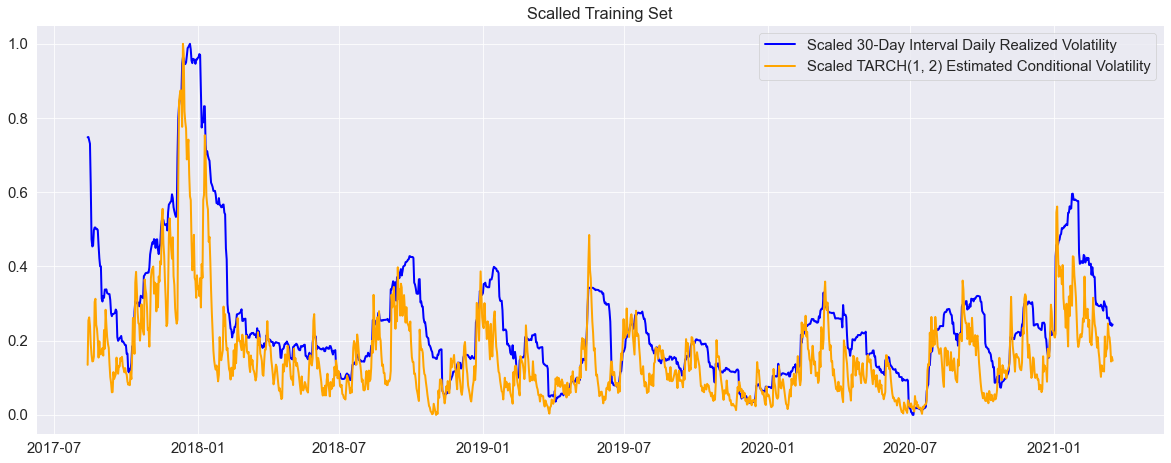

In [185]:
viz_cond_vol(scaled_tarch_120_cond_vol, f'TARCH{best_pqo[:2]}')

In [186]:
# ROLLING WINDOW FORECAST
# INITIALIZING rolling_forecasts VALUES LIST
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df_hdt.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=best_pqo[0], q=best_pqo[1], o=best_pqo[2], power=1.0,
                       dist='skewt')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    # USING BOOTSTRAP METHOD
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False,
                             method='bootstrap').variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

t_bs_120_preds = pd.DataFrame(rolling_forecasts, index=val_idx)


In [187]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
t_120_preds_scaled = transform_volatility_to_scaler(scaler_tarch_120, t_bs_120_preds)


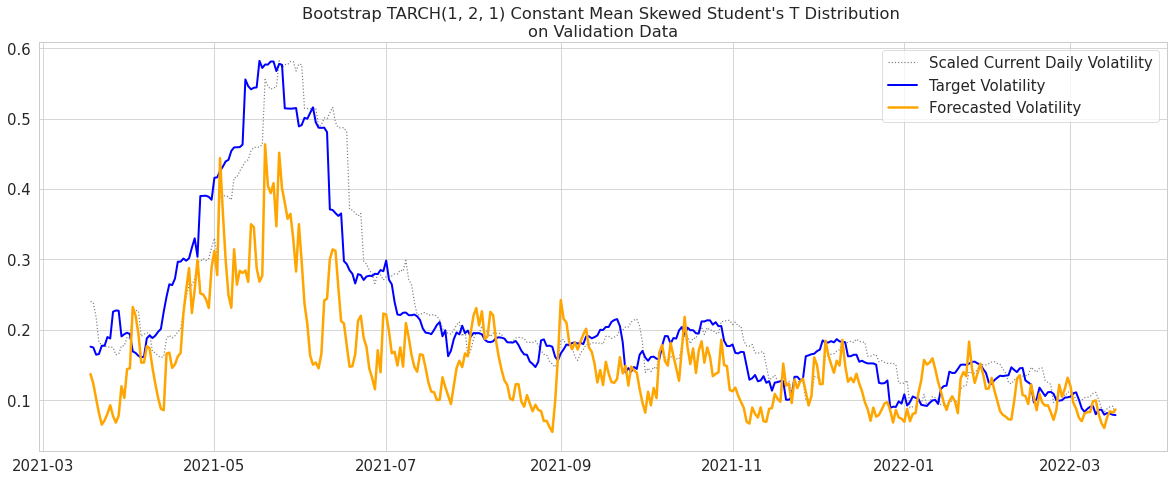

In [188]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, t_120_preds_scaled, 
          f"Bootstrap TARCH{best_pqo} Constant Mean Skewed Student's T Distribution")

#Bootstrap TARCH{best_pqo} Constant Mean Skewed Student's T Distribution
plt.show();


In [189]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, t_120_preds_scaled, 
         f"Bootstrap TARCH{best_pqo}, Constant Mean, skewt Dist")

Model  Validation RMSPE  \
0                                      Mean Baseline          0.755965   
1                      Random Walk Naive Forecasting          0.192098   
2             GARCH(1,1), Constant Mean, Normal Dist          0.451188   
3  Analytical GJR-GARCH(1,1,1), Constant Mean, sk...          0.433131   
4  Simulation TARCH(1,1), Constant Mean, skewt Di...          0.326059   
5    Bootstrap TARCH(1,1), Constant Mean, skewt Dist          0.328950   
6  Bootstrap TARCH(1, 2, 1), Constant Mean, skewt...          0.327662   

   Validation RMSE  
0              NaN  
1              NaN  
2         0.294510  
3         0.293602  
4         0.242419  
5         0.243787  
6         0.245623

# Neural Networks
0. <a href='#0.-Index'>Back-to-top</a>

While GARCH remains the gold standard for volatility prediction within traditional financial institutions, there has been an increasing numbers of professionals and researchers turning to Machine Learning, especially Neural Networks, to gain insights into the financial markets in recent years.

(Reference: Positional Option Trading - Euan Sinclair)

Traders' theory of the market being inherently efficient 

__(Efficient Market Hypothesis or EHM)__ states that share prices reflects all information and consistently outperforming the overall market is impossible. The more efficient a market is, the more random and unpredictable the returns will be, and thus a perfectly efficient market will be completely unpredictable.

There are other arguments against EMH, and ones of the most prominent one is based on __Behavioral Finance:__ compared to the human history of 200,000 years, the market has not been around for that long. For example, equity options have only been traded in liquid, transparent market since the __CBOE opened in 1973__; and the average lifetime of an S&P500 company is approx. 20 years. It means that some psychological tendencies of human beings have 200,000 years of evidence behind them, and that a lot of the movements of the markets that were driven by participants' behaviors will likely repeat itself at a later point. Therefore the market system cannot be totally random, it must have some patterns. Those patterns are extremely difficult to exploit due to the multitude of factors that interact and drive the market.

__The CBOE Volatility Index, or VIX,__ is a real-time market index representing the market’s expectations for volatility over the coming 30 days. Investors use the VIX to measure the level of risk, fear, or stress in the market when making investment decisions. Traders can also trade the VIX using a variety of options and exchange-traded products, or use VIX values to price derivatives. It'd be interesting to see how Neural Networks perform compared to the traditional GARCH models.

In [190]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import backend as K
from decimal import Decimal

For Neural Networks, instead of feeding all available datapoints into the network at once, we will use a sliding lookback window to extract uniform input arrays and target outputs. we will just using a stride value of 1 to make sure we get all the inputs and output combinations available since 2500 datapoints is not really a whole lot to spare.

### This is a demonstration of sliding window:

In [191]:
# CONVERT AN SERIES TO MATRIX DATASET
def windowed_dataset(x_series, y_series, lookback_window):
    dataX, dataY = [], []
    for i in range((lookback_window-1), len(x_series)):
        start_idx = x_series.index[i-lookback_window+1]
        end_idx = x_series.index[i]
        a = x_series[start_idx:end_idx].values
        dataX.append(a)
        dataY.append(y_series[end_idx])

    return np.array(dataX), np.array(dataY)

In [192]:
def rmspe(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays
    that can be used as metrics for NN during training
    '''
    loss = K.sqrt(K.mean(K.square((y_true - y_pred) / y_true)))

    return loss

This means that to generate future predictions for a time step t, I will need to traverse back in time and collect the last n_past datapoints (from time step t - n_past + 1 to t inclusively). That's why the shape of the inputs into these Neural Networks need to be [batch_size, n_past, 1].

In [193]:
from datetime import timedelta

In [194]:
def forecast(model, range_idx):
    start_idx = range_idx[0] - timedelta(n_past - 1)
    end_idx = range_idx[-1]
    mat_X, _ = windowed_dataset(df_hdt.vol_current[start_idx:end_idx], 
                                df_hdt.vol_future[range_idx], n_past)
    preds = pd.Series(model.predict(mat_X)[:, 0],
                      index=range_idx)

    return preds

In [195]:
def scale(scaler, y_series):
    scaled = pd.Series(scaler.transform(y_series.values.reshape(-1,1))[:, 0],
                       index=y_series.index)
    return scaled

In [196]:
def viz_train_val_metrics(model_hist):
    with sns.axes_style("white"):
        fig, ax = plt.subplots(figsize=(15,6))

        # PLOT MSE - LEFT Y-AXIS
        # TRAINING
        ln11 = ax.plot(range(len(model_hist.history['loss'])), 
                    model_hist.history['loss'], color='lightblue',
                    label='Training MSE', lw=2)
        # VALIDATION
        ln12 = ax.plot(range(len(model_hist.history['loss'])),
                    model_hist.history['val_loss'], color='darkblue',
                    label='Validation MSE', lw=2)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('MSE')

        # PLOT RMSE - RIGHT Y-AXIS
        ax2 = ax.twinx()
        ln21 = ax2.plot(range(len(model_hist.history['loss'])), 
                    model_hist.history['rmspe'], color='pink', lw=2,
                    label='Training RMSPE')
        ln22 = ax2.plot(range(len(model_hist.history['loss'])), 
                    model_hist.history['val_rmspe'], color='red', lw=2,
                    label='Validation RMSPE')
        ax2.set_ylabel('RMSPE')

        # COMBINING LALBELS FOR 4 LINES INTO 1 LEGEND
        lns = ln11 + ln12 + ln21 + ln22
        labs = [l.get_label() for l in lns]
        ax.legend(lns, labs, loc='best')

        ax.set_title('Training vs. Validation Learning Curves')
        plt.show();

# Univariate Long Short-Term Memory(LSTM)
0. <a href='#0.-Index'>Back-to-top</a>

There's a class of Neural Networks called Recurrent Neural Networks (RNN) that can "predict the future". RNN works well with time series data, such as stock prices, and can even process sentences, documents, audio samples as inputs. Another application of RNN is in autonomic driving systems, where they're used to anticipate vehicle trajectories and help avoid accidents.


Recurrent Neural Network Unfold

At each time step t, the recurrent neuron receives input 
 as well as its own output from the previous time step 
. Since the output of a Recurrent Neuron is a function of all the inputs from the previous time steps, it has a form of memory and able to preserve some information through time.

However, due to some transformations that the data goes through when traversing down RNN, some information is lost at each time step, and for a long sequence, the RNN's state contains virtually no information from the first inputs.

__Long Short-Term Memory (LSTM)__ was proposed in 1997 by Sepp Hochreiter and Jurgen Schmidhuber. The key part of LSTM is that the network can learn what's important and needs to be stored in the long-term state, and what can be ignored. LSTM looks very similar to a regular RNN cell, but its state is split into 2 vectors:

 ht- for short term state
 ct- for long term state
 
LSTM is a black box, and can be used like a basic Recurrent Neural Network (RNN) cell. However, it tends to perform much better, helps training converge faster, and also detect long-term dependencies in the data.

LSTM uses an optimized implementation when running on a GPU, that's why it's highly recommended to run this second part of the notebook on Google Colab.

First, I'm going to use the same lookback window n_past as the previous Neural Networks (30), and then depending on the result, I'll try to fine tune that value later.

The first LSTM model would be very simple with only 1 hidden LSTM layer of 20 units. I am using the standard adam optimizer here, and would later experiment with other optimizers if needed.

In [197]:
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import backend as K
from decimal import Decimal

In [198]:

vol_data = df_hdt['vol_current'].values
vol_data = vol_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(vol_data))

vol_train = vol_data[:split]
vol_test = vol_data[split:]

date_train = df_hdt.index[:split]
date_test = df_hdt.index[split:]

print(len(vol_train))
print(len(vol_test))



1366
342


In [199]:
look_back = 30

train_generator = TimeseriesGenerator(vol_train, vol_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(vol_test, vol_test, length=look_back, batch_size=14)


In [200]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(20,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 25
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/25
67/67 [==============================] - 2s 10ms/step - loss: 2.1254e-04
Epoch 2/25
67/67 [==============================] - 1s 11ms/step - loss: 8.6861e-05
Epoch 3/25
67/67 [==============================] - 1s 10ms/step - loss: 4.1431e-05
Epoch 4/25
67/67 [==============================] - 1s 10ms/step - loss: 4.2904e-05
Epoch 5/25
67/67 [==============================] - 1s 10ms/step - loss: 3.1803e-05
Epoch 6/25
67/67 [==============================] - 1s 10ms/step - loss: 2.5635e-05
Epoch 7/25
67/67 [==============================] - 1s 10ms/step - loss: 3.2382e-05
Epoch 8/25
67/67 [==============================] - 1s 10ms/step - loss: 2.6997e-05
Epoch 9/25
67/67 [==============================] - 1s 10ms/step - loss: 2.3638e-05
Epoch 10/25
67/67 [==============================] - 1s 11ms/step - loss: 2.1043e-05
Epoch 11/25
67/67 [==============================] - 1s 10ms/step - loss: 2.3192e-05
Epoch 12/25
67/67 [==============================] - 1s 10ms/step - loss: 

In [201]:
prediction = model.predict_generator(test_generator)

vol_train = vol_train.reshape((-1))
vol_test = vol_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = vol_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = vol_test,
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = "Validation of scalled test data of ETH-BTC's volatility by LSTM",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "current volatility"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

In [202]:
vol_data = vol_data.reshape((-1))

def predict(num_prediction, model):
    prediction_list = vol_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = df_hdt.index.values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 30
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)

In [204]:
trace_1 = go.Scatter(
    x = date_train,
    y = vol_train,
    mode = 'lines',
    name = 'Data'
)
trace_2 = go.Scatter(
    x = forecast_dates,
    y = forecast ,
    mode = 'lines',
    name = 'Prediction'
)
trace_3 = go.Scatter(
    x = date_test,
    y = vol_test,
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = "Forecast of ETH-BTC for next 30 Days",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "volatility forecast"}
)
fig = go.Figure(data=[trace_1,trace_3, trace_2], layout=layout)
fig.show()
print("Volatility will be goint to increse for next 30 days Hence its good time to enter in treads ")

Volatility will be goint to increse for next 30 days Hence its good time to enter in treads 


# Summary
0. <a href='#0.-Index'>Back-to-top</a>

__Our project gives live forecasting that is whenever we run the model it well get updated and add new data points upto current time frame. So some conclusions may changes due that.__

So best practice is update conclusions also whenever you run the model.


From Heatmap we select best pair of cryptocurrency ETH-BTC (Base currency-Quote Currency) for further analysis because both are top 2 Cryptocurrencies of Crypto market. 
We fit MA on close price of ETH-BTC 
when MA is too large it not capable to capturing some spike and dips and when MA is small its again there is again noisy observation problem so there is compromise and we need to looking for some other methods like 
 AR, 
 ARMA, 
 ARIMA, 
 ACF, 
 EWMA

We check Stationarity of close price so Our Close prices is not stationary hence instead of Calculating volatility of close price we choose to formulate returns and then volatility of returns for further analysis. 
But before that we forecast Close prices by LSTM and they are slightly decreasing.
we plot volume plot and then forecast it by LSTM so our forecast shows rate of change of decreasing volume is reduced, so its good indicator.
We calculate returns and then log returns For practicality purposes, it's generally preferable to use the log returns especially in mathematic modeling, because it helps eliminate non-stationary properties of time series data, and makes it more stable. There's another advantage to log returns, which is that they're additive across time:
Then we compare the  distribution plots and stationarity plot of Returns and Log Returns and their distribution is normal and stationarity plots are also same.
Then we fit auto ARIMA model to log returns but there is high heteroskedasticity so instead of going to traditional time series model we have to choose time series models for High Volatility such as Baseline models and GARCH model
We fit Baseline models, GARCH model and LSTM machine learning model and compare them based on RMSPE & RMSE so our  LSTM model have lowest RMSPE & RMSE values.
So we forecast volatility by LSTM  model
Our LSTM forecast for Volatility are decreasing in future for next one month.
Overall conclusion is that its good time to tread in BTC Instead of ETH.

Close price forecast by LSTM shows that trend of future close price is decreasing hence Price of Bitcoin is increasing or price of Etherium is decreasing. So we can transfer our Etherium portfolio into Bitcoin.











# References
0. <a href='#0.-Index'>Back-to-top</a>

1.	Géron, A. (2019). In Hands-on machine learning with Scikit-Learn & TensorFlow: concepts, tools, and techniques to build intelligent systems. O'Reilly Media, Inc.
2.	Sinclair, E. (2020). Positional option trading: An advanced guide. John Wiley & Sons.
3.	https://algotrading101.com/learn/yfinance-guide/
4.	https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction/supplement/DM4fi/convolutional-neural-networks-course
5.	https://insights.deribit.com/options-course/
6.	https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_forecasting.html
7.	https://www.investopedia.com/terms/v/vix.asp
8.	https://www.hindawi.com/journals/complexity/2021/6647534/
9.	https://github.com/ritvikmath/Time-Series-Analysis/blob/master/GARCH%20Stock%20Modeling.ipynb
10.	https://github.com/ritvikmath/Time-Series-Analysis/blob/master/GARCH%20Model.ipynb
11.	https://www.kaggle.com/c/optiver-realized-volatility-prediction
12.	https://www.youtube.com/watch?v=NKHQiN-08S8
13.	https://goldinlocks.github.io/ARCH_GARCH-Volatility-Forecasting/
14.	https://towardsdatascience.com/time-series-analysis-on-multivariate-data-in-tensorflow-2f0591088502
15.	https://deepmind.com/blog/article/wavenet-generative-model-raw-audio
16.	https://github.com/philipperemy/keras-tcn
17.	http://users.metu.edu.tr/ozancan/ARCHGARCHTutorial.html
18.	https://towardsdatascience.com/8-commonly-used-pandas-display-options-you-should-know-a832365efa95


0. <a href='#0.-Index'>Back-to-top</a>